In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import seaborn as sns


data = pd.read_csv("nonvoters_data.csv")
df = pd.DataFrame(data)

#CLEANING


df.replace('NA',np.nan,inplace=True)

#Generally speaking, do you think of yourself as a..
df['Q30'].replace(1,"Republican",inplace=True)
df['Q30'].replace(2,"Democrat",inplace=True)
df['Q30'].replace(3,"Independent",inplace=True)

#Would you call yourself a...
df['Q31'].replace(1.0,"Strong Republican",inplace=True)
df['Q31'].replace(2.0,"Not very strong Republican",inplace=True)

#Would you call yourself a...
df['Q32'].replace(1.0,"Strong Democrat",inplace=True)
df['Q32'].replace(2.0,"Not very strong Democrat",inplace=True)

#ASK IF INDEPENDENT, ANOTHER PARTY, HAVE NO PARTY PREFERENCE OR EFUSED IN Q30
#Do you think of yourself as closer to the...
df['Q33'].replace(1.0,"Republican",inplace=True)
df['Q33'].replace(2.0,"Democrat",inplace=True)

Rep = df['Q30'] == "Republican"
Dem = df['Q30'] == "Democrat"
Ind = df['Q30'] == "Independent"

Republican = df[Rep]
Democrat = df[Dem]
Independent = df[Ind]


Party = df.groupby(['Q30'])
StrRep = df.groupby(['Q31'])
StrDem = df.groupby(['Q32'])
#Same thing as Republica, Democrat, and Independent
RepParty = Party.get_group("Republican")
DemParty = Party.get_group("Democrat")
IndParty = Party.get_group("Independent")


NotStrongRep = StrRep.get_group("Not very strong Republican")
StrongRep = StrRep.get_group("Strong Republican")
NotStrongDem = StrDem.get_group("Not very strong Democrat")
StrongDem = StrDem.get_group("Strong Democrat")


df['age_groups'] = pd.cut(x=df['ppage'],bins=[18,25,34,49,64,100],labels=['18-25','26-34','35-49','50-64','65+'])
AgeGroup = df.groupby(['age_groups'])
grp1 = AgeGroup.get_group('18-25')
grp2 = AgeGroup.get_group('26-34')
grp3 = AgeGroup.get_group('35-49')
grp4 = AgeGroup.get_group('50-64')
grp5 = AgeGroup.get_group('65+')

Edu = df.groupby(['educ'])
college = Edu.get_group('College')
HS = Edu.get_group('High school or less')
Somecollege = Edu.get_group('Some college')

Gender = df.groupby(['gender'])
Male = Gender.get_group('Male')
Female = Gender.get_group('Female')

Income = df.groupby(['income_cat'])
Poverty = Income.get_group('Less than $40k')
Lower = Income.get_group('$40-75k')
Middle = Income.get_group('$75-125k')
Upper = Income.get_group('$125k or more')

VoteFreq = df.groupby(['voter_category'])
always = VoteFreq.get_group('always')
sporadic = VoteFreq.get_group('sporadic')
rarely = VoteFreq.get_group('rarely/never')


c:\users\jeffrey\anaconda3\envs\python 38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\jeffrey\anaconda3\envs\python 38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\jeffrey\anaconda3\envs\python 38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
def RDI_ANOVA(x):
    a = []
    b = []
    c = []
    R = Republican[Republican[x]>0]
    D = Democrat[Democrat[x]>0]
    I = Independent[Independent[x]>0]   
    for respondent in range(len(R[x])):
        a.append(R[x].iloc[respondent])
    for respondent in range(len(D[x])):
        b.append(D[x].iloc[respondent])
    for respondent in range(len(I[x])):
        c.append(I[x].iloc[respondent])
    fstat,pval = f_oneway(a,b,c) 
    return fstat,pval



def RDI_Analysis(x,y,z):
    dy=[]
    ry=[]
    iy=[]
    xx=[]
    RDIList=[]
    if y >= 1:
        for item in range(y):
            if z == True:
                dt = (Democrat[x+str(item+1)]).value_counts()
                rt = (Republican[x+str(item+1)]).value_counts()
                it = (Independent[x+str(item+1)]).value_counts()
                dy.append(dt[1]/Democrat[x+str(item+1)].count())
                ry.append(rt[1]/Republican[x+str(item+1)].count())
                iy.append(it[1]/Independent[x+str(item+1)].count())
                xx.append(x+str(item+1))
            if z == 'mean':
                dm = Democrat[Democrat[x+str(item+1)]>0].mean()
                rm = Republican[Republican[x+str(item+1)]>0].mean()
                im = Independent[Independent[x+str(item+1)]>0].mean()
                dm = dm[x+str(item+1)]
                rm = rm[x+str(item+1)]
                im = im[x+str(item+1)]
                dy.append(dm)
                ry.append(rm)
                iy.append(im)
                fstat,pval = RDI_ANOVA(x+str(item+1))
                RDIList.append(x+str(item+1)+": f-stat = "+str(round(fstat,4))+",  p-value = "+str(round(pval,10)))
                xx.append(x+str(item+1))
            if z == 'range':
                dr = Democrat[x].value_counts()
                rr = Republican[x].value_counts()
                ir = Independent[x].value_counts()
                try:
                    dy.append(dr[item+1])
                except KeyError:
                    dr[float(item+1)] = 0
                    dy.append(dr[float(item+1)])               
                try:
                    ry.append(rr[item+1])
                except:
                    rr[float(item+1)] = 0
                    ry.append(rr[float(item+1)])
                try:
                    iy.append(ir[item+1])      
                except:
                    ir[float(item+1)] = 0
                    iy.append(ir[float(item+1)])                
                
                
                   
                xx.append(x+"_"+str(item+1))
    elif y == 0:
        if z == True:
            dt = Democrat[x].value_counts()
            rt = Republican[x].value_counts()
            it = Independent[x].value_counts()
            dy.append(dt[1]/(len(Democrat[x])))
            ry.append(rt[1]/(len(Republican[x])))
            iy.append(it[1]/(len(Independent[x])))
            xx.append(x)
        if z == 'mean':
            dm = Democrat[Democrat[x]>0].mean()
            rm = Republican[Republican[x]>0].mean()
            im = Independent[Independent[x]>0].mean()
            dm = dm[x]
            rm = rm[x]
            im = im[x]
            dy.append(dm)
            ry.append(rm)
            iy.append(im)
            fstat,pval = RDI_ANOVA(x)
            RDIList.append(x+": f-stat = "+str(round(fstat,4))+",  p-value = "+str(round(pval,10)))
            xx.append(x)
    

    labels = xx
    x = np.arange(1,len(xx)+1)
    width = 0.15
        
    fig,ax = plt.subplots(figsize = (15,8))
    rects1 = ax.bar(x - width,dy,color='tab:blue',width=width,label='Democrat')
    rects2 = ax.bar(x, ry,color='tab:red', width=width, label='Republican')
    rects3 = ax.bar(x + width, iy,color='tab:green', width=width, label='Independent')

    
    if z== True:
        ax.set_ylabel('Percentages')
    if z== 'mean':
        ax.set_ylabel('Means')
    ax.set_title('Responses by Party Affiliation')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

        
    def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round(rect.get_height(),2)
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
        
    print(RDIList)    
    plt.show()

    
#RDI_Analysis('Q2_',10,'mean')
#RDI_Analysis('Q3_',6,'mean')
#RDI_Analysis('Q4_',6,'mean')
#RDI_Analysis('Q5',0,'mean')
#RDI_Analysis('Q6',0,'mean')
#RDI_Analysis('Q7',0,'mean')
#RDI_Analysis('Q8_',9,'mean')
#RDI_Analysis('Q9_',4,'mean')
#RDI_Analysis('Q10_',4,'mean')
#RDI_Analysis('Q11_',6,'mean')
#RDI_Analysis('Q19_',10,True)
#RDI_Analysis('Q20',0,'mean')
#RDI_Analysis('Q21',0,True)
#RDI_Analysis('Q22',7,'range')
#RDI_Analysis('Q23',3,'range')
#RDI_Analysis('Q24',4,'range')
#RDI_Analysis('Q25',0,'mean')
#RDI_Analysis('Q26',0,'mean')
#RDI_Analysis('Q27_',6,True)
#RDI_Analysis('Q28_',8,True)
#RDI_Analysis('Q29_',10,True)

In [3]:
def Age_ANOVA(x):
    a = []
    b = []
    c = []
    d = []
    e = []
    teen = grp1[grp1[x]>0]
    twenty = grp2[grp2[x]>0]
    thirty = grp3[grp3[x]>0]
    fifty = grp4[grp4[x]>0]
    sixty = grp5[grp5[x]>0]
    
    for respondent in range(len(teen[x])):
        a.append(teen[x].iloc[respondent])          
    for respondent in range(len(twenty[x])):
        b.append(twenty[x].iloc[respondent])        
    for respondent in range(len(thirty[x])):
        c.append(thirty[x].iloc[respondent])
    for respondent in range(len(fifty[x])):
        d.append(fifty[x].iloc[respondent])
    for respondent in range(len(sixty[x])):
        e.append(sixty[x].iloc[respondent])
    fstat,pval = f_oneway(a,b,c,d,e) 
    return fstat,pval


def Age_Analysis(x,y,z):
    a1y=[]
    b2y=[]
    c3y=[]
    d4y=[]
    e5y=[]
    xx=[]
    AgeList=[]
    if y >= 1:
        for item in range(y):
            if z == True:
                a1t = (grp1[x+str(item+1)]).value_counts()
                b2t = (grp2[x+str(item+1)]).value_counts()
                c3t = (grp3[x+str(item+1)]).value_counts()
                d4t = (grp4[x+str(item+1)]).value_counts()
                e5t = (grp5[x+str(item+1)]).value_counts()
                
                a1y.append(a1t[1]/grp1[x+str(item+1)].count())
                b2y.append(b2t[1]/grp2[x+str(item+1)].count())
                c3y.append(c3t[1]/grp3[x+str(item+1)].count())
                d4y.append(d4t[1]/grp4[x+str(item+1)].count())
                e5y.append(e5t[1]/grp5[x+str(item+1)].count())
                xx.append(x+str(item+1))
            if z == 'mean':
                a1m = grp1[grp1[x+str(item+1)]>0].mean()
                b2m = grp2[grp2[x+str(item+1)]>0].mean()
                c3m = grp3[grp3[x+str(item+1)]>0].mean()
                d4m = grp4[grp4[x+str(item+1)]>0].mean()
                e5m = grp5[grp5[x+str(item+1)]>0].mean()
                
                a1m = a1m[x+str(item+1)]
                b2m = b2m[x+str(item+1)]
                c3m = c3m[x+str(item+1)]
                d4m = d4m[x+str(item+1)]
                e5m = e5m[x+str(item+1)]
                
                a1y.append(a1m)
                b2y.append(b2m)
                c3y.append(c3m)
                d4y.append(d4m)
                e5y.append(e5m)
                fstat,pval = Age_ANOVA(x+str(item+1))
                AgeList.append(x+str(item+1)+": f-stat = "+str(round(fstat,4))+",  p-value = "+str(round(pval,10)))
                
                xx.append(x+str(item+1))
            if z == 'range':
                ar = grp1[x].value_counts()
                br = grp2[x].value_counts()
                cr = grp3[x].value_counts()
                dr = grp4[x].value_counts()
                er = grp5[x].value_counts()
                try:
                    a1y.append(ar[item+1])
                except KeyError:
                    ar[float(item+1)] = 0
                    a1y.append(ar[float(item+1)])               
                try:
                    b2y.append(br[item+1])
                except:
                    br[float(item+1)] = 0
                    b2y.append(br[float(item+1)])
                try:
                    c3y.append(cr[item+1])
                except:
                    cr[float(item+1)] = 0
                    c3y.append(cr[float(item+1)])
                try:
                    d4y.append(dr[item+1])
                except:
                    dr[float(item+1)] = 0
                    d4y.append(dr[float(item+1)])
                try:                   
                    e5y.append(er[item+1])
                except KeyError:
                    er[float(item+1)] = 0
                    e5y.append(er[float(item+1)])
                

                xx.append(x+"_"+str(item+1))
    elif y == 0:
        if z == True:
            at = grp1[x].value_counts()
            bt = grp2[x].value_counts()
            ct = grp3[x].value_counts()
            dt = grp4[x].value_counts()
            et = grp5[x].value_counts()
            
            a1y.append(at[1]/(len(grp1[x])))
            b2y.append(bt[1]/(len(grp2[x])))
            c3y.append(ct[1]/(len(grp3[x])))
            d4y.append(dt[1]/(len(grp4[x])))
            e5y.append(et[1]/(len(grp5[x])))
            
            xx.append(x)
        if z == 'mean':
            am = grp1[grp1[x]>0].mean()
            bm = grp2[grp2[x]>0].mean()
            cm = grp3[grp3[x]>0].mean()
            dm = grp4[grp4[x]>0].mean()
            em = grp5[grp5[x]>0].mean()
            
            am = am[x]
            bm = bm[x]
            cm = cm[x]
            dm = dm[x]
            em = em[x]
            
            a1y.append(am)
            b2y.append(bm)
            c3y.append(cm)
            d4y.append(dm)
            e5y.append(em)
            
            fstat,pval = Age_ANOVA(x)
            AgeList.append(x+": f-stat = "+str(round(fstat,4))+",  p-value = "+str(round(pval,10)))
            xx.append(x)

    labels = xx
    x = np.arange(1,len(xx)+1)
    width = 0.15
        
    fig,ax = plt.subplots(figsize = (15,8))
    rects1 = ax.bar(x - width*2,a1y,width=width,label='18-25')
    rects2 = ax.bar(x - width, b2y, width, label='26-34')
    rects3 = ax.bar(x, c3y, width, label='35-49')
    rects4 = ax.bar(x + width, d4y, width, label='50-64')
    rects5 = ax.bar(x + width*2, e5y, width, label='65+')
    
    if z== True:
        ax.set_ylabel('Percentages')
    if z== 'mean':
        ax.set_ylabel('Means')
    ax.set_title('Responses by Age Groups')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

        
    def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round(rect.get_height(),2)
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    autolabel(rects5)
        
    print(AgeList)
    plt.show()
    



   
#Age_Analysis('Q2_',10,'mean')
#Age_Analysis('Q3_',6,'mean')
#Age_Analysis('Q4_',6,'mean')
#Age_Analysis('Q5',0,'mean')
#Age_Analysis('Q6',0,'mean')
#Age_Analysis('Q7',0,'mean')
#Age_Analysis('Q8_',9,'mean')
#Age_Analysis('Q9_',4,'mean')
#Age_Analysis('Q10_',4,'mean')
#Age_Analysis('Q11_',6,'mean')
#Age_Analysis('Q19_',10,True)
#Age_Analysis('Q20',0,'mean')
#Age_Analysis('Q21',0,True)
#Age_Analysis('Q22',7,'range')
#Age_Analysis('Q23',3,'range')
#Age_Analysis('Q24',4,'range')
#Age_Analysis('Q25',0,'mean')
#Age_Analysis('Q26',0,'mean')
#Age_Analysis('Q27_',6,True)
#Age_Analysis('Q28_',8,True)
#Age_Analysis('Q29_',10,True)


In [4]:
Gender = df.groupby(['gender'])
Male = Gender.get_group('Male')
Female = Gender.get_group('Female')

def Sex_ttest(x):
    a = []
    b = []
    M = Male[Male[x]>0]
    F = Female[Female[x]>0]
    for respondent in range(len(M[x])):
        a.append(Male[x].iloc[respondent])
    for respondent in range(len(F[x])):
        b.append(Female[x].iloc[respondent])

    tstat,pval = ttest_ind(a,b) 
    return tstat,pval



def Sex_Analysis(x,y,z):
    my=[]
    fy=[]
    xx=[]
    SexList=[]
    if y >= 1:
        for item in range(y):
            if z == True:
                mt = (Male[x+str(item+1)]).value_counts()
                ft = (Female[x+str(item+1)]).value_counts()
                my.append(mt[1]/Male[x+str(item+1)].count())
                fy.append(ft[1]/Female[x+str(item+1)].count())
                xx.append(x+str(item+1))
            if z == 'mean':
                mm = Male[Male[x+str(item+1)]>0].mean()
                fm = Female[Female[x+str(item+1)]>0].mean()
                mm = mm[x+str(item+1)]
                fm = fm[x+str(item+1)]
                my.append(mm)
                fy.append(fm)
                tstat,pval = Sex_ttest(x+str(item+1))
                SexList.append(x+str(item+1)+": t-stat = "+str(round(tstat,4))+",  p-value = "+str(round(pval,10)))
                xx.append(x+str(item+1))
            if z == 'range':
                mr = Male[x].value_counts()
                fr = Female[x].value_counts()
                my.append(mr[item+1])
                fy.append(fr[item+1])        
                xx.append(x+"_"+str(item+1))
    elif y == 0:
        if z == True:
            mt = Male[x].value_counts()
            ft = Female[x].value_counts()
            my.append(mt[1]/(len(Male[x])))
            fy.append(ft[1]/(len(Female[x])))
            xx.append(x)
        if z == 'mean':
            mm = Male[Male[x]>0].mean()
            fm = Female[Female[x]>0].mean()
            mm = mm[x]
            fm = fm[x]
            my.append(mm)
            fy.append(fm)
            tstat,pval = Sex_ttest(x)
            SexList.append(x+": t-stat = "+str(round(tstat,4))+",  p-value = "+str(round(pval,10)))
            xx.append(x)
    

    labels = xx
    x = np.arange(1,len(xx)+1)
    width = 0.15
        
    fig,ax = plt.subplots(figsize = (15,8))
    rects1 = ax.bar(x - width,my,color='tab:pink',width=width,label='Male')
    rects2 = ax.bar(x, fy,color='tab:purple', width=width, label='Female')


    if z== True:
        ax.set_ylabel('Percentages')
    if z== 'mean':
        ax.set_ylabel('Means')
    ax.set_title('Responses by Gender')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

        
    def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round(rect.get_height(),2)
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)

        
    print(SexList)    
    plt.show()

#Sex_Analysis('Q2_',10,'mean')
#Sex_Analysis('Q3_',6,'mean')
#Sex_Analysis('Q4_',6,'mean')
#Sex_Analysis('Q5',0,'mean')
#Sex_Analysis('Q6',0,'mean')
#Sex_Analysis('Q7',0,'mean')
#Sex_Analysis('Q8_',9,'mean')
#Sex_Analysis('Q9_',4,'mean')
#Sex_Analysis('Q10_',4,'mean')
#Sex_Analysis('Q11_',6,'mean')
#Sex_Analysis('Q19_',10,True)
#Sex_Analysis('Q20',0,'mean')
#Sex_Analysis('Q21',0,True)
#Sex_Analysis('Q22',7,'range')
#Sex_Analysis('Q23',3,'range')
#Sex_Analysis('Q24',4,'range')
#Sex_Analysis('Q25',0,'mean')
#Sex_Analysis('Q26',0,'mean')
#Sex_Analysis('Q27_',6,True)
#Sex_Analysis('Q28_',8,True)
#Sex_Analysis('Q29_',10,True)

In [35]:
Income = df.groupby(['income_cat'])
Lower = Income.get_group('Less than $40k')
LowerMid = Income.get_group('$40-75k')
UpperMid = Income.get_group('$75-125k')
Upper = Income.get_group('$125k or more')

def Inc_ANOVA(x):
    a = []
    b = []
    c = []
    d = []
    L = Lower[Lower[x]>0]
    LM = LowerMid[LowerMid[x]>0]
    UM = UpperMid[UpperMid[x]>0]
    U = Upper[Upper[x]>0]

    
    for respondent in range(len(L[x])):
        a.append(L[x].iloc[respondent])          
    for respondent in range(len(LM[x])):
        b.append(LM[x].iloc[respondent])        
    for respondent in range(len(UM[x])):
        c.append(UM[x].iloc[respondent])
    for respondent in range(len(U[x])):
        d.append(U[x].iloc[respondent])
    fstat,pval = f_oneway(a,b,c,d) 
    return fstat,pval


def Inc_Analysis(x,y,z):
    Ly=[]
    LMy=[]
    UMy=[]
    Uy=[]
    xx=[]
    IncList=[]
    if y >= 1:
        for item in range(y):
            if z == True:
                lt = (Lower[x+str(item+1)]).value_counts()
                lmt = (LowerMid[x+str(item+1)]).value_counts()
                umt = (UpperMid[x+str(item+1)]).value_counts()
                ut = (Upper[x+str(item+1)]).value_counts()
                
                Ly.append(lt[1]/Lower[x+str(item+1)].count())
                LMy.append(lmt[1]/LowerMid[x+str(item+1)].count())
                UMy.append(umt[1]/UpperMid[x+str(item+1)].count())
                Uy.append(ut[1]/Upper[x+str(item+1)].count())
                xx.append(x+str(item+1))
            if z == 'mean':
                Lm = Lower[Lower[x+str(item+1)]>0].mean()
                LMm = LowerMid[LowerMid[x+str(item+1)]>0].mean()
                UMm = UpperMid[UpperMid[x+str(item+1)]>0].mean()
                Um = Upper[Upper[x+str(item+1)]>0].mean()
                
                Lm = Lm[x+str(item+1)]
                LMm = LMm[x+str(item+1)]
                UMm = UMm[x+str(item+1)]
                Um = Um[x+str(item+1)]
                
                Ly.append(Lm)
                LMy.append(LMm)
                UMy.append(UMm)
                Uy.append(Um)
                fstat,pval = Inc_ANOVA(x+str(item+1))
                IncList.append(x+str(item+1)+": f-stat = "+str(round(fstat,4))+",  p-value = "+str(round(pval,10)))
                
                xx.append(x+str(item+1))
            if z == 'range':
                Lr = Lower[x].value_counts()
                LMr = LowerMid[x].value_counts()
                UMr = UpperMid[x].value_counts()
                Ur = Upper[x].value_counts()
                try:
                    Ly.append(Lr[item+1])
                except KeyError:
                    Lr[float(item+1)] = 0
                    Ly.append(Lr[float(item+1)])               
                try:
                    LMy.append(LMr[item+1])
                except:
                    LMr[float(item+1)] = 0
                    LMy.append(LMr[float(item+1)])
                try:
                    UMy.append(UMr[item+1])
                except:
                    UMr[float(item+1)] = 0
                    UMy.append(UMr[float(item+1)])
                try:
                    Uy.append(Ur[item+1])
                except:
                    Ur[float(item+1)] = 0
                    Uy.append(Ur[float(item+1)])                

                xx.append(x+"_"+str(item+1))
    elif y == 0:
        if z == True:
            Lt = Lower[x].value_counts()
            LMt = LowerMid[x].value_counts()
            UMt = UpperMid[x].value_counts()
            Ut = Upper[x].value_counts()
            
            Ly.append(Lt[1]/(len(Lower[x])))
            LMy.append(LMt[1]/(len(LowerMid[x])))
            UMy.append(UMt[1]/(len(UpperMid[x])))
            Uy.append(Ut[1]/(len(Upper[x])))
            
            xx.append(x)
        if z == 'mean':
            Lm = grp1[grp1[x]>0].mean()
            LMm = grp2[grp2[x]>0].mean()
            UMm = grp3[grp3[x]>0].mean()
            Um = grp4[grp4[x]>0].mean()
            
            Lm = Lm[x]
            LMm = LMm[x]
            UMm = UMm[x]
            Um = Um[x]
            
            Ly.append(Lm)
            LMy.append(LMm)
            UMy.append(UMm)
            Uy.append(Um)
            
            fstat,pval = Inc_ANOVA(x)
            IncList.append(x+": f-stat = "+str(round(fstat,4))+",  p-value = "+str(round(pval,10)))
            xx.append(x)

    labels = xx
    x = np.arange(1,len(xx)+1)
    width = 0.15
        
    fig,ax = plt.subplots(figsize = (15,8))
    rects1 = ax.bar(x - width*2, Ly,width=width,label='Less than $40k')
    rects2 = ax.bar(x - width, LMy, width, label='$40-75k')
    rects3 = ax.bar(x, UMy, width, label='$75-125k')
    rects4 = ax.bar(x + width, Uy, width, label='$125k or more')

    
    if z== True:
        ax.set_ylabel('Percentages')
    if z== 'mean':
        ax.set_ylabel('Means')
    ax.set_title('Responses by Income Bracket')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

        
    def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round(rect.get_height(),2)
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
        
    print(IncList)
    plt.show()
    

   
#Inc_Analysis('Q2_',10,'mean')
#Inc_Analysis('Q3_',6,'mean')
#Inc_Analysis('Q4_',6,'mean')
#Inc_Analysis('Q5',0,'mean')
#Inc_Analysis('Q6',0,'mean')
#Inc_Analysis('Q7',0,'mean')
#Inc_Analysis('Q8_',9,'mean')
#Inc_Analysis('Q9_',4,'mean')
#Inc_Analysis('Q10_',4,'mean')
#Inc_Analysis('Q11_',6,'mean')
#Inc_Analysis('Q19_',10,True)
#Inc_Analysis('Q20',0,'mean')
#Inc_Analysis('Q21',0,True)
#Inc_Analysis('Q22',7,'range')
#Inc_Analysis('Q23',3,'range')
#Inc_Analysis('Q24',4,'range')
#Inc_Analysis('Q25',0,'mean')
#Inc_Analysis('Q26',0,'mean')
#Inc_Analysis('Q27_',6,True)
#Inc_Analysis('Q28_',8,True)
#Inc_Analysis('Q29_',10,True)


In [6]:
VoteFreq = df.groupby(['voter_category'])
always = VoteFreq.get_group('always')
sporadic = VoteFreq.get_group('sporadic')
rarely = VoteFreq.get_group('rarely/never')

def Freq_ANOVA(x):
    a = []
    b = []
    c = []
    A = always[always[x]>0]
    S = sporadic[sporadic[x]>0]
    R = rarely[rarely[x]>0]   
    for respondent in range(len(A[x])):
        a.append(A[x].iloc[respondent])
    for respondent in range(len(S[x])):
        b.append(S[x].iloc[respondent])
    for respondent in range(len(R[x])):
        c.append(R[x].iloc[respondent])
    fstat,pval = f_oneway(a,b,c) 
    return fstat,pval



def Freq_Analysis(x,y,z):
    Ay=[]
    Sy=[]
    Ry=[]
    xx=[]
    FreqList=[]
    if y >= 1:
        for item in range(y):
            if z == True:
                At = (always[x+str(item+1)]).value_counts()
                St = (sporadic[x+str(item+1)]).value_counts()
                Rt = (rarely[x+str(item+1)]).value_counts()
                try:
                    Ay.append(At[1]/always[x+str(item+1)].count())
                except:
                    At[float(item+1)] = 0
                    Ay.append(At[float(item+1)])
                try:
                    Sy.append(St[1]/sporadic[x+str(item+1)].count())
                except:
                    St[float(item+1)] = 0
                    Sy.append(St[float(item+1)])
                try:
                    Ry.append(Rt[1]/rarely[x+str(item+1)].count())
                except:
                    Rt[float(item+1)] = 0
                    Ry.append(Rt[float(item+1)])
                xx.append(x+str(item+1))
            if z == 'mean':
                Am = always[always[x+str(item+1)]>0].mean()
                Sm = sporadic[sporadic[x+str(item+1)]>0].mean()
                Rm = rarely[rarely[x+str(item+1)]>0].mean()
                Am = Am[x+str(item+1)]
                Sm = Sm[x+str(item+1)]
                Rm = Rm[x+str(item+1)]
                Ay.append(Am)
                Sy.append(Sm)
                Ry.append(Rm)
                fstat,pval = Freq_ANOVA(x+str(item+1))
                FreqList.append(x+str(item+1)+": f-stat = "+str(round(fstat,4))+",  p-value = "+str(round(pval,10)))
                xx.append(x+str(item+1))
            if z == 'range':
                Ar = always[x].value_counts()
                Sr = sporadic[x].value_counts()
                Rr = rarely[x].value_counts()
                try:
                    Ay.append(Ar[item+1])
                except KeyError:
                    Ar[float(item+1)] = 0
                    Ay.append(Ar[float(item+1)])               
                try:
                    Sy.append(Sr[item+1])
                except:
                    Sr[float(item+1)] = 0
                    Sy.append(Sr[float(item+1)])
                try:
                    Ry.append(Rr[item+1])      
                except:
                    Rr[float(item+1)] = 0
                    Ry.append(Rr[float(item+1)])                
                
                   
                xx.append(x+"_"+str(item+1))
    elif y == 0:
        if z == True:
            At = always[x].value_counts()
            St = sporadic[x].value_counts()
            Rt = rarely[x].value_counts()
            Ay.append(At[1]/(len(always[x])))
            Sy.append(St[1]/(len(sporadic[x])))
            Ry.append(At[1]/(len(rarely[x])))
            xx.append(x)
        if z == 'mean':
            Am = always[always[x]>0].mean()
            Sm = sporadic[sporadic[x]>0].mean()
            Rm = rarely[rarely[x]>0].mean()
            Am = Am[x]
            Sm = Sm[x]
            Rm = Rm[x]
            Ay.append(Am)
            Sy.append(Sm)
            Ry.append(Rm)
            fstat,pval = Freq_ANOVA(x)
            FreqList.append(x+": f-stat = "+str(round(fstat,4))+",  p-value = "+str(round(pval,10)))
            xx.append(x)
    

    labels = xx
    x = np.arange(1,len(xx)+1)
    width = 0.15
        
    fig,ax = plt.subplots(figsize = (15,8))
    rects1 = ax.bar(x - width,Ay,color='tab:blue',width=width,label='Always Votes')
    rects2 = ax.bar(x, Sy,color='tab:red', width=width, label='Sometimes Votes')
    rects3 = ax.bar(x + width, Ry,color='tab:green', width=width, label='Rarely Votes')

    
    if z== True:
        ax.set_ylabel('Percentages')
    if z== 'mean':
        ax.set_ylabel('Means')
    ax.set_title('Responses by Voting Frequency')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

        
    def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round(rect.get_height(),2)
            ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
        
    print(FreqList)    
    plt.show()

#Freq_Analysis('Q2_',10,'mean')
#Freq_Analysis('Q3_',6,'mean')
#Freq_Analysis('Q4_',6,'mean')
#Freq_Analysis('Q5',0,'mean')
#Freq_Analysis('Q6',0,'mean')
#Freq_Analysis('Q7',0,'mean')
#Freq_Analysis('Q8_',9,'mean')
#Freq_Analysis('Q9_',4,'mean')
#Freq_Analysis('Q10_',4,'mean')
#Freq_Analysis('Q11_',6,'mean')
#Freq_Analysis('Q19_',10,True)
#Freq_Analysis('Q20',0,'mean')
#Freq_Analysis('Q21',0,True)
#Freq_Analysis('Q22',7,'range')
#Freq_Analysis('Q23',3,'range')
#Freq_Analysis('Q24',4,'range')
#Freq_Analysis('Q25',0,'mean')
#Freq_Analysis('Q26',0,'mean')
#Freq_Analysis('Q27_',6,True)
#Freq_Analysis('Q28_',8,True)
#Freq_Analysis('Q29_',10,True)

['Q2_1: f-stat = 29.2151,  p-value = 0.0', 'Q2_2: f-stat = 6.0407,  p-value = 0.002397213', 'Q2_3: f-stat = 14.6782,  p-value = 4.406e-07', 'Q2_4: f-stat = 473.1081,  p-value = 0.0', 'Q2_5: f-stat = 21.1517,  p-value = 7e-10', 'Q2_6: f-stat = 358.4797,  p-value = 0.0', 'Q2_7: f-stat = 232.3727,  p-value = 0.0', 'Q2_8: f-stat = 19.17,  p-value = 5.1e-09', 'Q2_9: f-stat = 236.6661,  p-value = 0.0', 'Q2_10: f-stat = 295.9409,  p-value = 0.0']


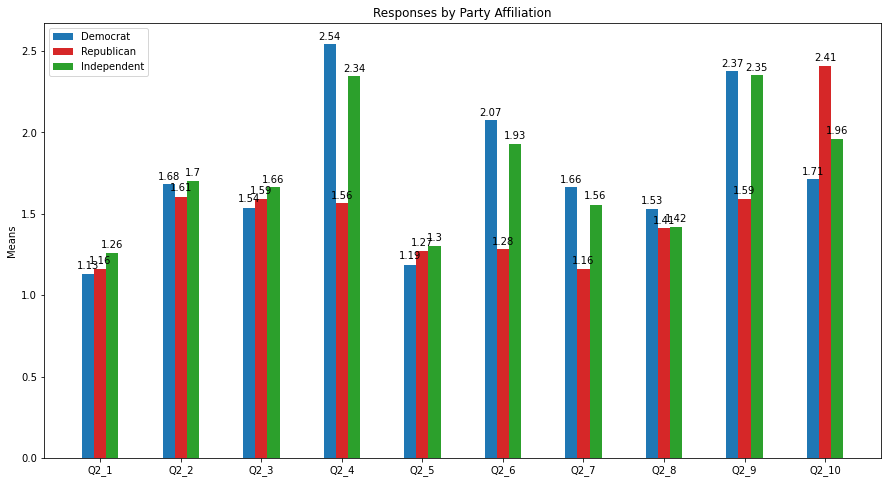

['Q2_1: f-stat = 62.8012,  p-value = 0.0', 'Q2_2: f-stat = 84.0104,  p-value = 0.0', 'Q2_3: f-stat = 110.4667,  p-value = 0.0', 'Q2_4: f-stat = 124.8828,  p-value = 0.0', 'Q2_5: f-stat = 113.9492,  p-value = 0.0', 'Q2_6: f-stat = 171.688,  p-value = 0.0', 'Q2_7: f-stat = 224.0689,  p-value = 0.0', 'Q2_8: f-stat = 17.9781,  p-value = 0.0', 'Q2_9: f-stat = 129.4379,  p-value = 0.0', 'Q2_10: f-stat = 10.1462,  p-value = 3.49e-08']


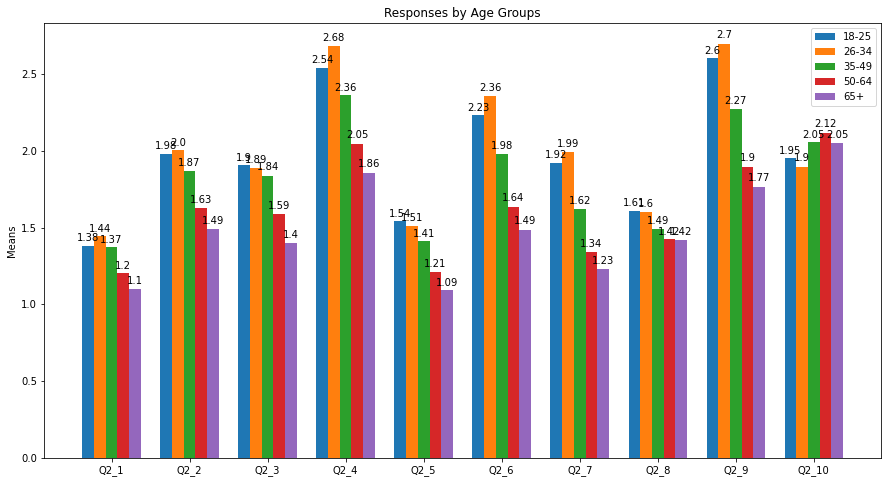

['Q2_1: t-stat = 1.373,  p-value = 0.1698014684', 'Q2_2: t-stat = -0.6031,  p-value = 0.5464703724', 'Q2_3: t-stat = 0.3085,  p-value = 0.7576992196', 'Q2_4: t-stat = 4.5342,  p-value = 5.8979e-06', 'Q2_5: t-stat = 1.8396,  p-value = 0.0658736779', 'Q2_6: t-stat = 7.5289,  p-value = 0.0', 'Q2_7: t-stat = 6.0211,  p-value = 1.8e-09', 'Q2_8: t-stat = 1.2734,  p-value = 0.2029188503', 'Q2_9: t-stat = 8.7325,  p-value = 0.0', 'Q2_10: t-stat = -5.8614,  p-value = 4.8e-09']


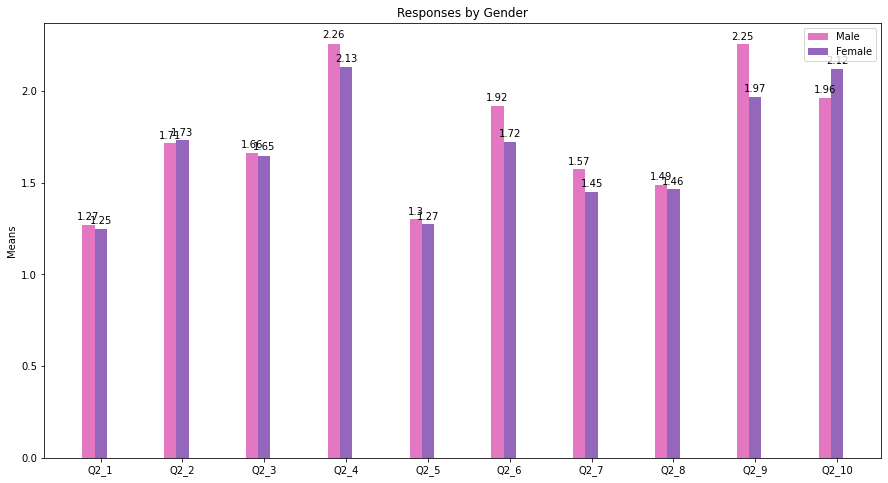

['Q2_1: f-stat = 50.9247,  p-value = 0.0', 'Q2_2: f-stat = 59.2699,  p-value = 0.0', 'Q2_3: f-stat = 10.4431,  p-value = 7.539e-07', 'Q2_4: f-stat = 28.0452,  p-value = 0.0', 'Q2_5: f-stat = 17.5523,  p-value = 0.0', 'Q2_6: f-stat = 8.7044,  p-value = 9.2794e-06', 'Q2_7: f-stat = 4.8924,  p-value = 0.0021316403', 'Q2_8: f-stat = 15.107,  p-value = 9e-10', 'Q2_9: f-stat = 83.2467,  p-value = 0.0', 'Q2_10: f-stat = 0.9168,  p-value = 0.4317970487']


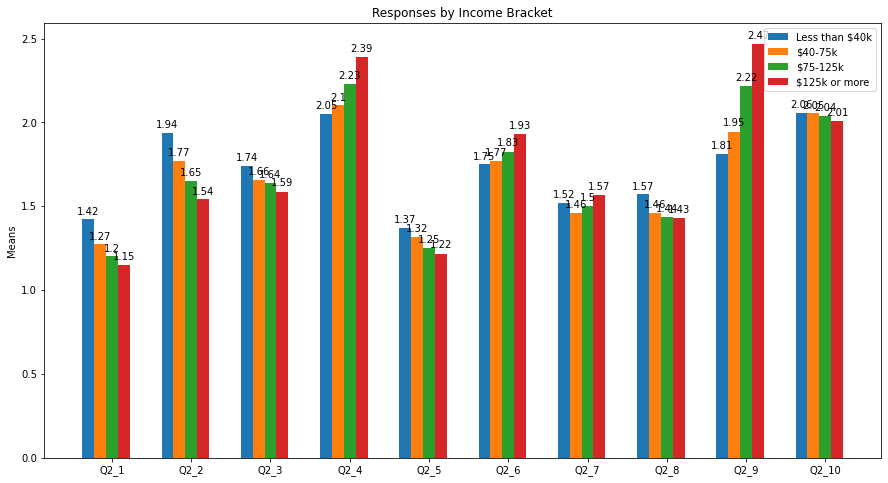

['Q2_1: f-stat = 614.2974,  p-value = 0.0', 'Q2_2: f-stat = 236.9535,  p-value = 0.0', 'Q2_3: f-stat = 227.9202,  p-value = 0.0', 'Q2_4: f-stat = 12.9589,  p-value = 2.4242e-06', 'Q2_5: f-stat = 174.15,  p-value = 0.0', 'Q2_6: f-stat = 43.4376,  p-value = 0.0', 'Q2_7: f-stat = 86.0399,  p-value = 0.0', 'Q2_8: f-stat = 17.0123,  p-value = 4.3e-08', 'Q2_9: f-stat = 5.9943,  p-value = 0.0025084296', 'Q2_10: f-stat = 20.5004,  p-value = 1.3e-09']


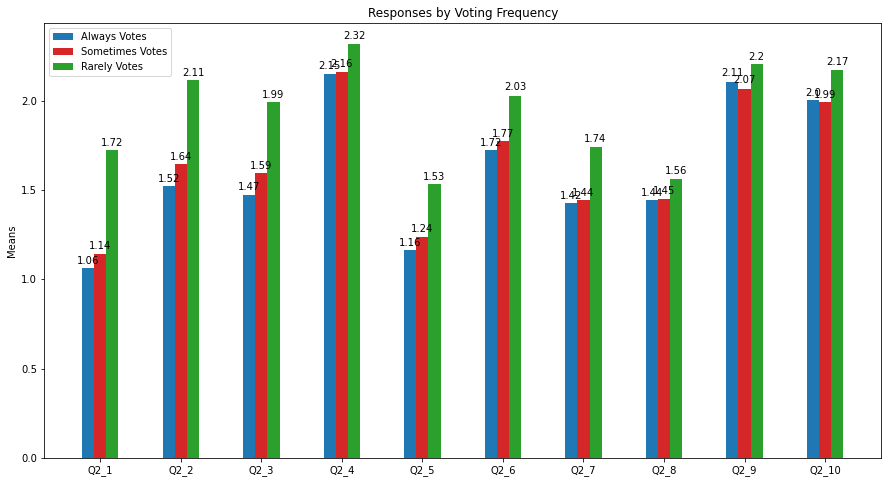

In [7]:
RDI_Analysis('Q2_',10,'mean')
Age_Analysis('Q2_',10,'mean')
Sex_Analysis('Q2_',10,'mean')
Inc_Analysis('Q2_',10,'mean')
Freq_Analysis('Q2_',10,'mean')

RDI:

Age:

Sex:

Income:

Voting Frequency:


['Q3_1: f-stat = 959.3899,  p-value = 0.0', 'Q3_2: f-stat = 1087.3366,  p-value = 0.0', 'Q3_3: f-stat = 571.5804,  p-value = 0.0', 'Q3_4: f-stat = 466.648,  p-value = 0.0', 'Q3_5: f-stat = 36.7427,  p-value = 0.0', 'Q3_6: f-stat = 434.3036,  p-value = 0.0']


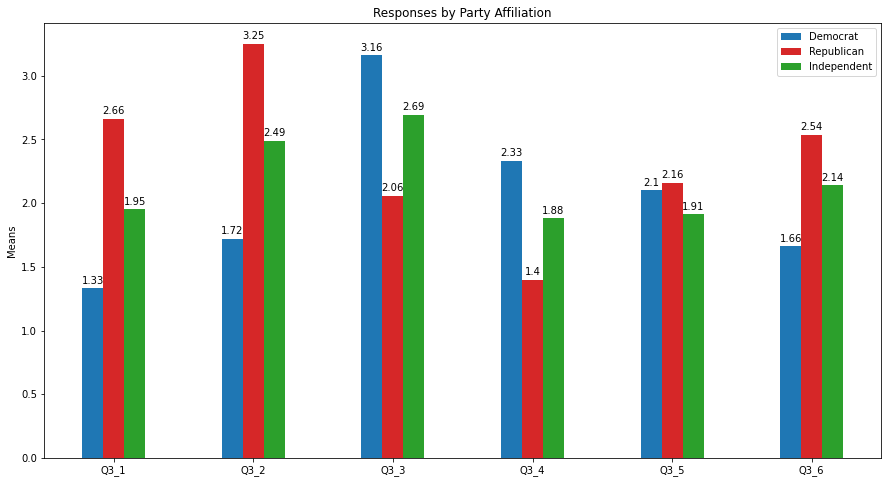

['Q3_1: f-stat = 14.7693,  p-value = 0.0', 'Q3_2: f-stat = 41.4136,  p-value = 0.0', 'Q3_3: f-stat = 13.5696,  p-value = 1e-10', 'Q3_4: f-stat = 33.8356,  p-value = 0.0', 'Q3_5: f-stat = 17.8667,  p-value = 0.0', 'Q3_6: f-stat = 12.1113,  p-value = 8e-10']


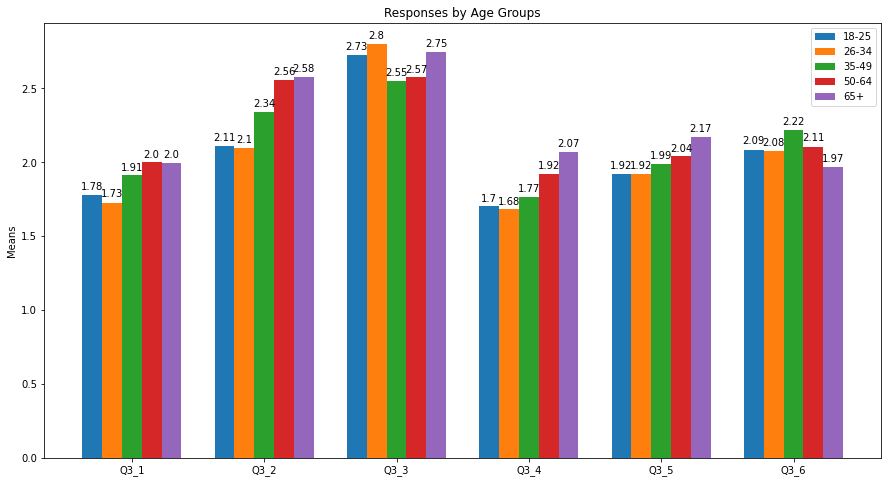

['Q3_1: t-stat = 6.3139,  p-value = 3e-10', 'Q3_2: t-stat = 5.162,  p-value = 2.525e-07', 'Q3_3: t-stat = -8.5716,  p-value = 0.0', 'Q3_4: t-stat = -1.3624,  p-value = 0.1731179983', 'Q3_5: t-stat = -3.7122,  p-value = 0.0002073869', 'Q3_6: t-stat = 9.3201,  p-value = 0.0']


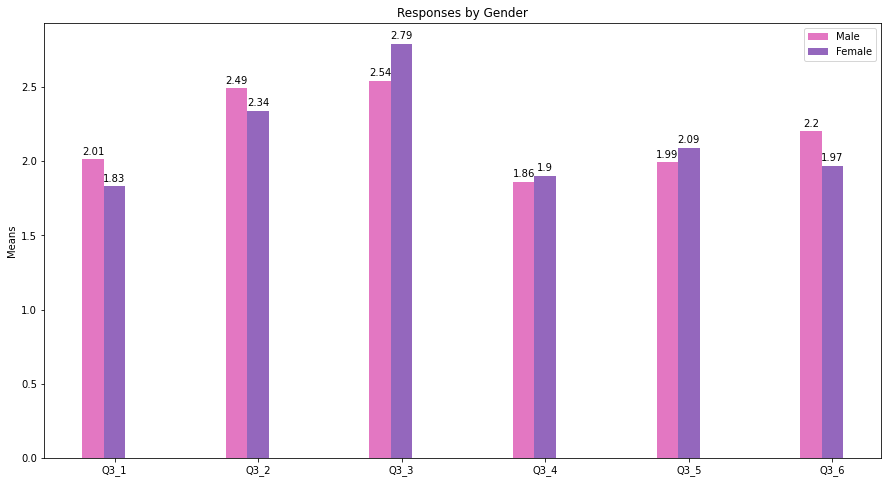

['Q3_1: f-stat = 1.4778,  p-value = 0.2184248469', 'Q3_2: f-stat = 4.6273,  p-value = 0.0030925699', 'Q3_3: f-stat = 10.6763,  p-value = 5.38e-07', 'Q3_4: f-stat = 7.566,  p-value = 4.76388e-05', 'Q3_5: f-stat = 20.4595,  p-value = 0.0', 'Q3_6: f-stat = 1.3718,  p-value = 0.2493703774']


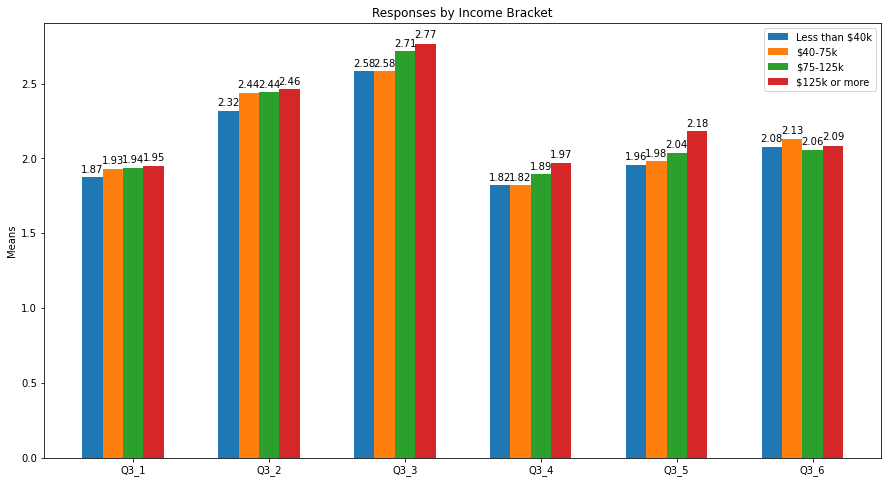

['Q3_1: f-stat = 1.6233,  p-value = 0.1973364046', 'Q3_2: f-stat = 8.3955,  p-value = 0.0002286416', 'Q3_3: f-stat = 11.1471,  p-value = 1.47292e-05', 'Q3_4: f-stat = 29.8337,  p-value = 0.0', 'Q3_5: f-stat = 19.8046,  p-value = 2.7e-09', 'Q3_6: f-stat = 2.6672,  p-value = 0.0695350589']


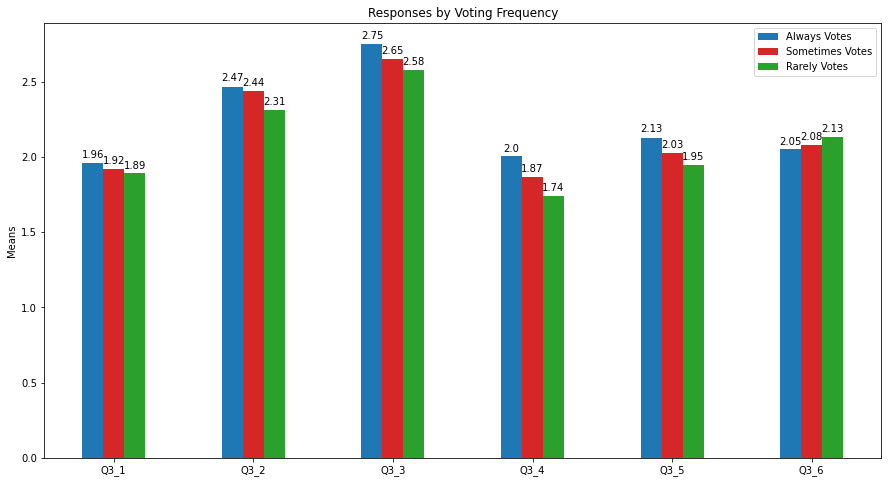

In [8]:
RDI_Analysis('Q3_',6,'mean')
Age_Analysis('Q3_',6,'mean')
Sex_Analysis('Q3_',6,'mean')
Inc_Analysis('Q3_',6,'mean')
Freq_Analysis('Q3_',6,'mean')

RDI:

Age:

Sex:

Income:

Voting Frequency:


['Q4_1: f-stat = 12.8233,  p-value = 2.787e-06', 'Q4_2: f-stat = 10.3053,  p-value = 3.41728e-05', 'Q4_3: f-stat = 30.5799,  p-value = 0.0', 'Q4_4: f-stat = 92.6192,  p-value = 0.0', 'Q4_5: f-stat = 18.198,  p-value = 1.33e-08', 'Q4_6: f-stat = 2.3101,  p-value = 0.09936072']


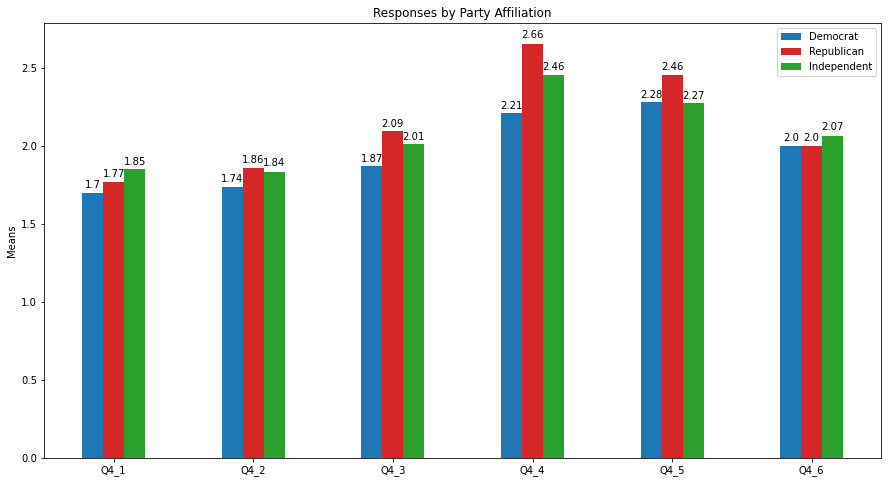

['Q4_1: f-stat = 58.8825,  p-value = 0.0', 'Q4_2: f-stat = 20.5816,  p-value = 0.0', 'Q4_3: f-stat = 12.1773,  p-value = 7e-10', 'Q4_4: f-stat = 30.5363,  p-value = 0.0', 'Q4_5: f-stat = 22.6175,  p-value = 0.0', 'Q4_6: f-stat = 31.8591,  p-value = 0.0']


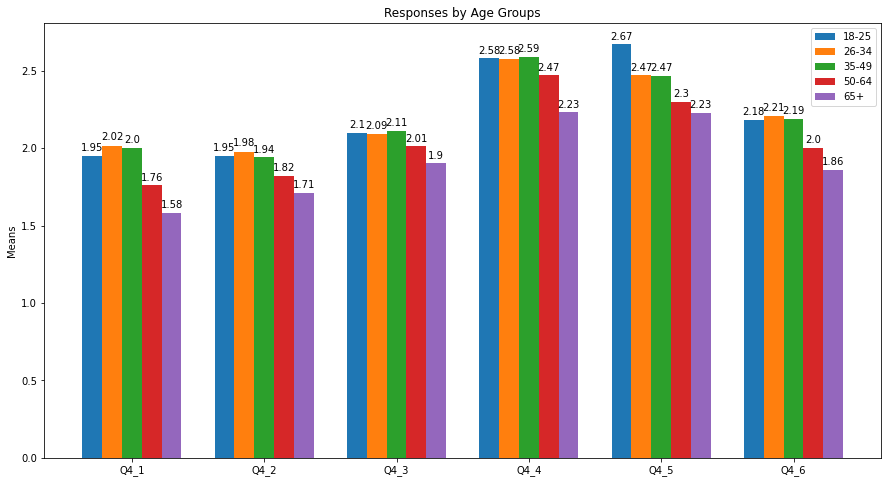

['Q4_1: t-stat = 2.4686,  p-value = 0.0135929956', 'Q4_2: t-stat = 2.5933,  p-value = 0.0095298129', 'Q4_3: t-stat = 3.0226,  p-value = 0.0025172127', 'Q4_4: t-stat = 2.6372,  p-value = 0.0083820145', 'Q4_5: t-stat = -5.6326,  p-value = 1.86e-08', 'Q4_6: t-stat = 4.2369,  p-value = 2.30144e-05']


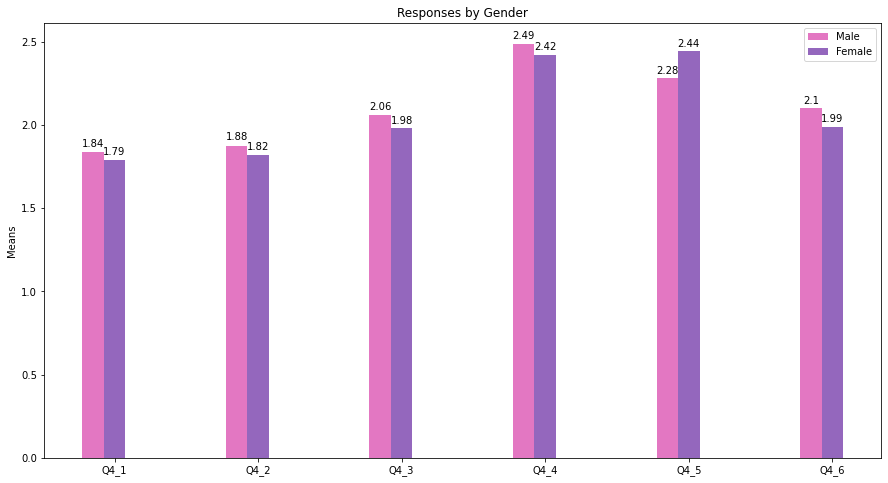

['Q4_1: f-stat = 4.7815,  p-value = 0.0024909361', 'Q4_2: f-stat = 18.7152,  p-value = 0.0', 'Q4_3: f-stat = 8.9729,  p-value = 6.3031e-06', 'Q4_4: f-stat = 0.3285,  p-value = 0.8047900025', 'Q4_5: f-stat = 48.6478,  p-value = 0.0', 'Q4_6: f-stat = 2.938,  p-value = 0.0319545133']


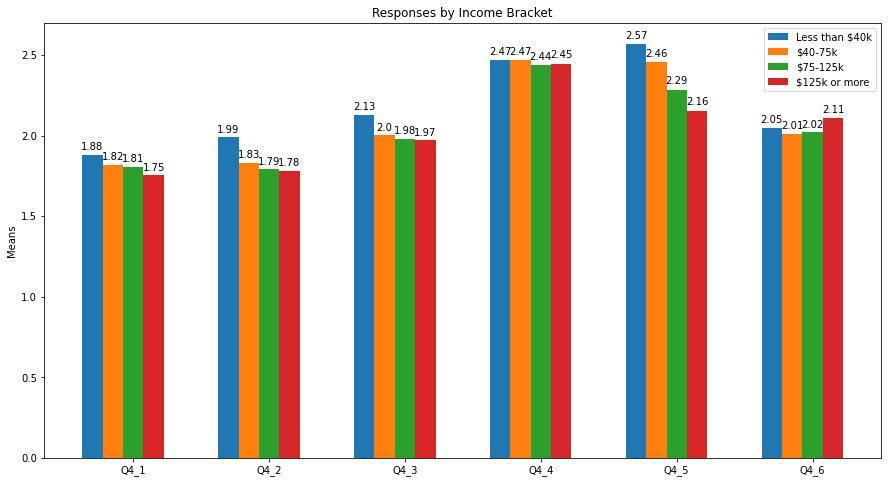

['Q4_1: f-stat = 78.5489,  p-value = 0.0', 'Q4_2: f-stat = 102.5327,  p-value = 0.0', 'Q4_3: f-stat = 66.6926,  p-value = 0.0', 'Q4_4: f-stat = 23.2551,  p-value = 1e-10', 'Q4_5: f-stat = 43.2339,  p-value = 0.0', 'Q4_6: f-stat = 28.9685,  p-value = 0.0']


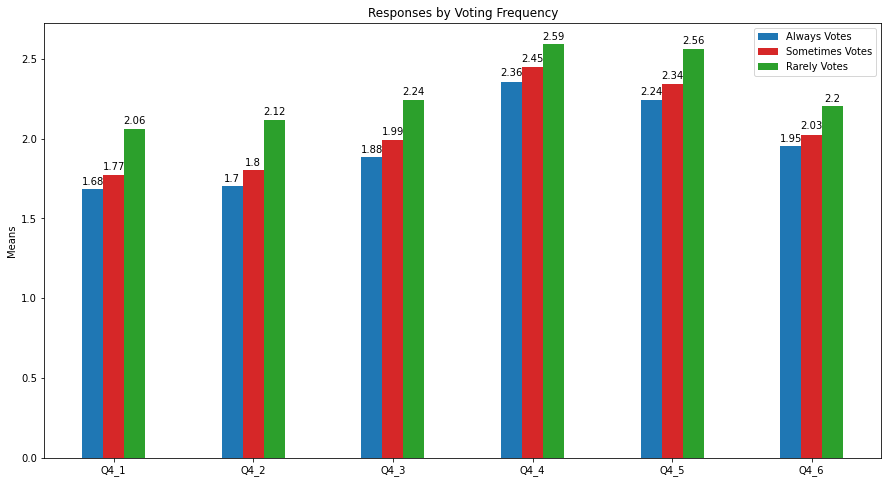

In [9]:
RDI_Analysis('Q4_',6,'mean')
Age_Analysis('Q4_',6,'mean')
Sex_Analysis('Q4_',6,'mean')
Inc_Analysis('Q4_',6,'mean')
Freq_Analysis('Q4_',6,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q5: f-stat = 54.5023,  p-value = 0.0']


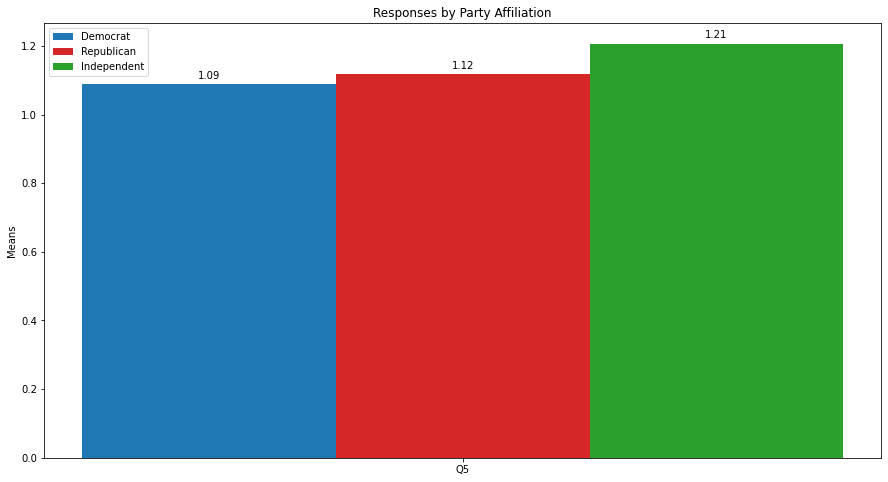

['Q5: f-stat = 54.5472,  p-value = 0.0']


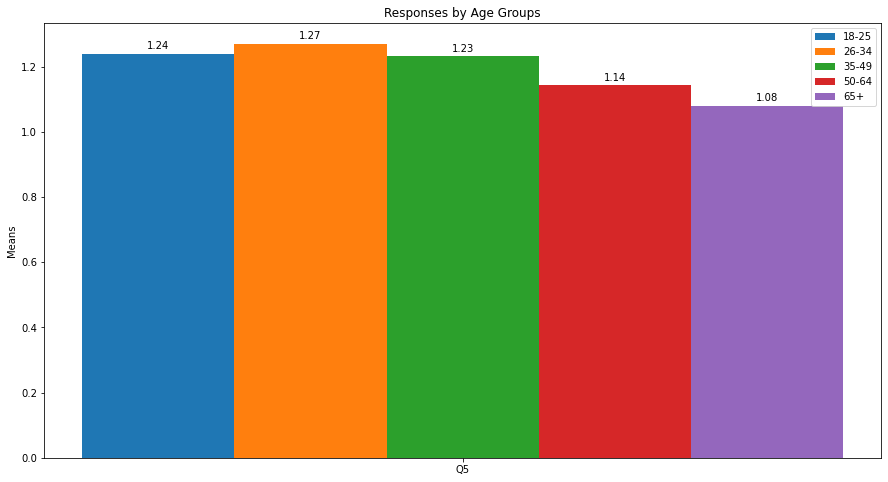

['Q5: t-stat = 2.292,  p-value = 0.0219428536']


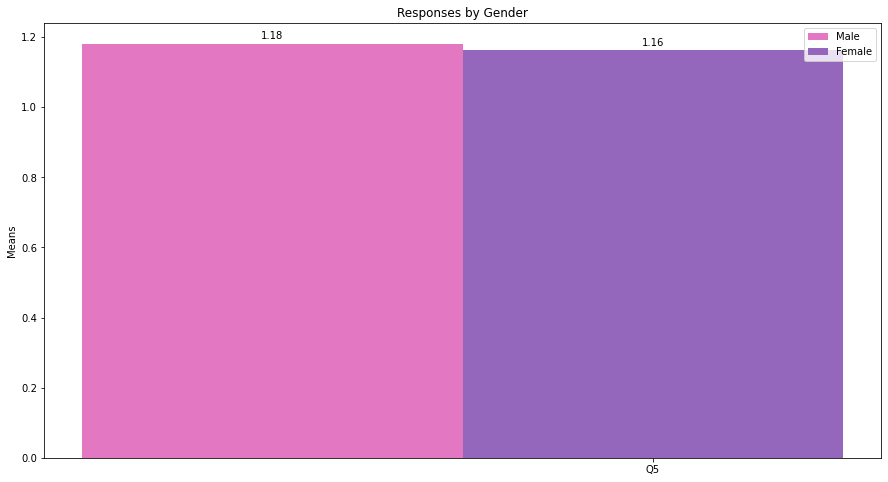

['Q5: f-stat = 16.8881,  p-value = 1e-10']


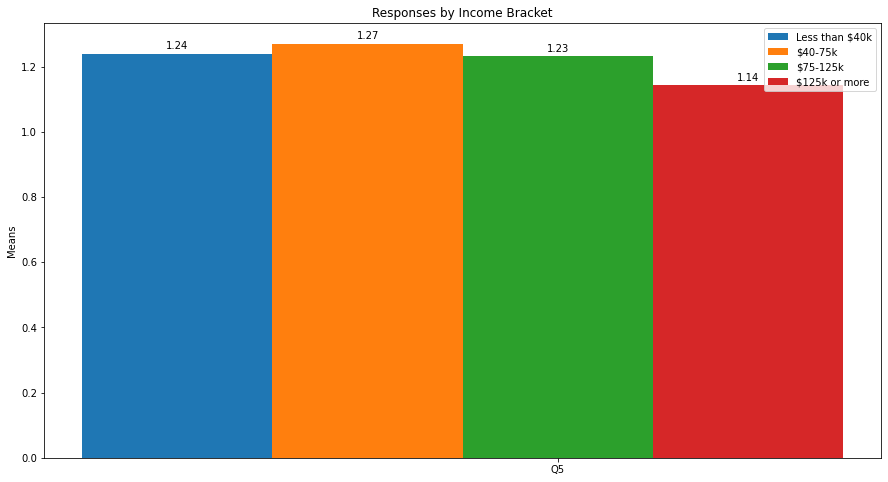

['Q5: f-stat = 189.7876,  p-value = 0.0']


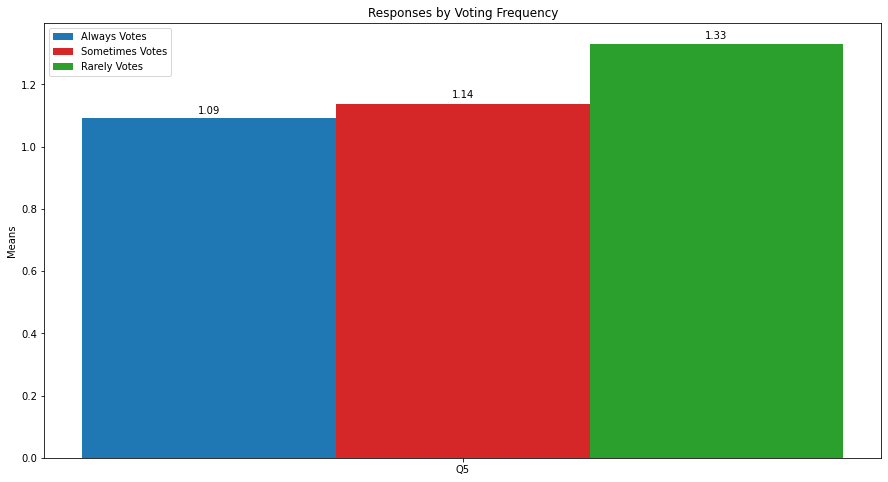

In [10]:
RDI_Analysis('Q5',0,'mean')
Age_Analysis('Q5',0,'mean')
Sex_Analysis('Q5',0,'mean')
Inc_Analysis('Q5',0,'mean')
Freq_Analysis('Q5',0,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q6: f-stat = 42.4898,  p-value = 0.0']


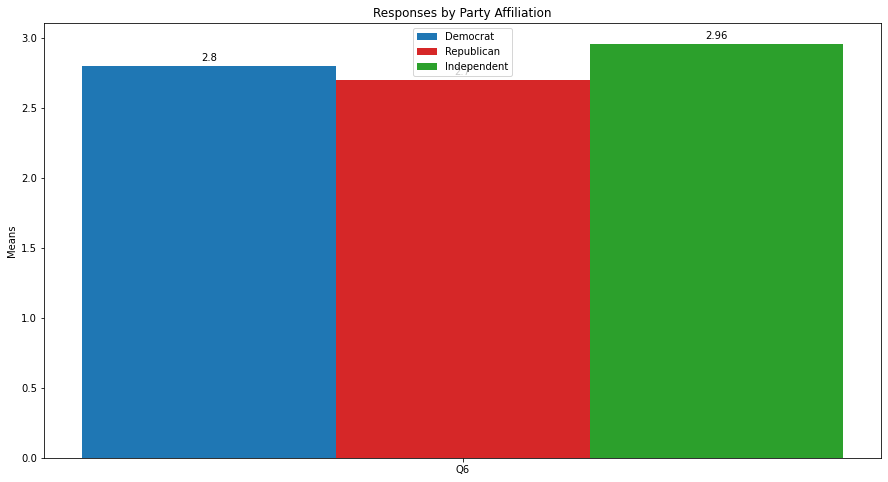

['Q6: f-stat = 50.7096,  p-value = 0.0']


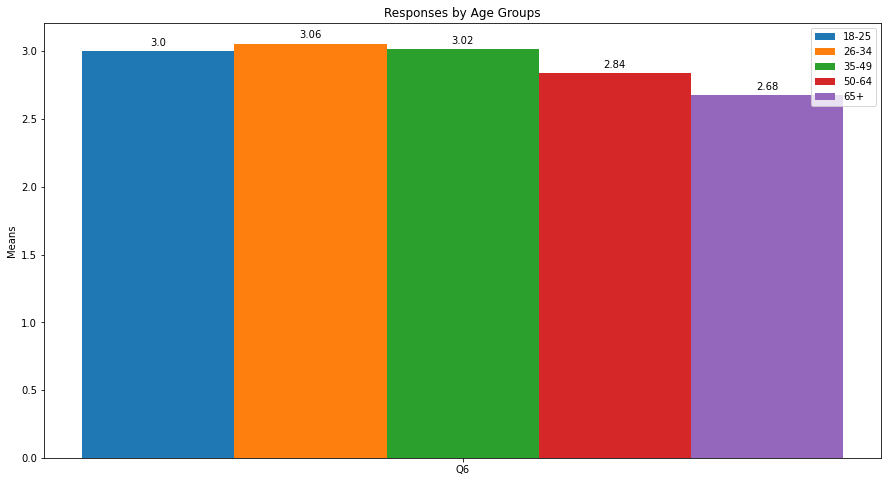

['Q6: t-stat = 0.4023,  p-value = 0.6875020705']


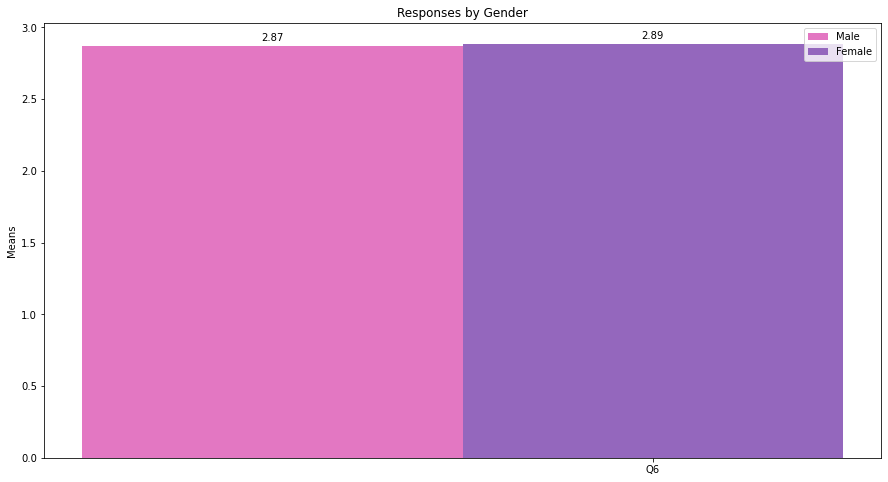

['Q6: f-stat = 40.7271,  p-value = 0.0']


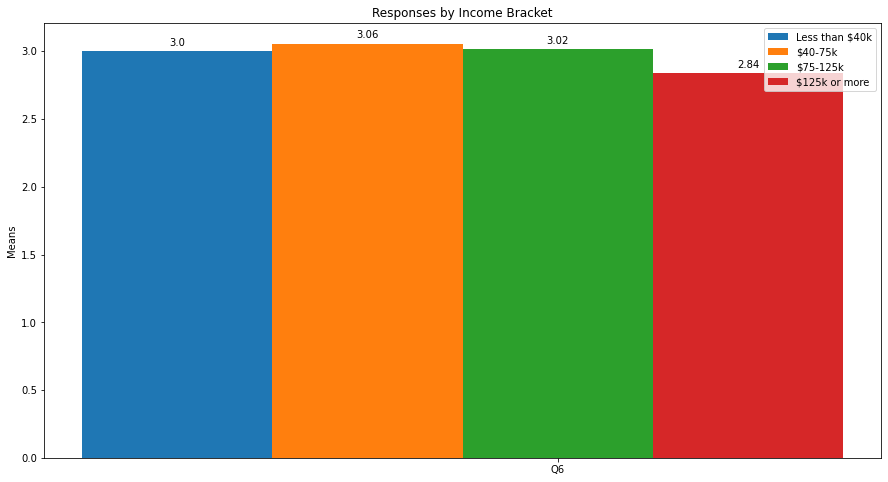

['Q6: f-stat = 124.5793,  p-value = 0.0']


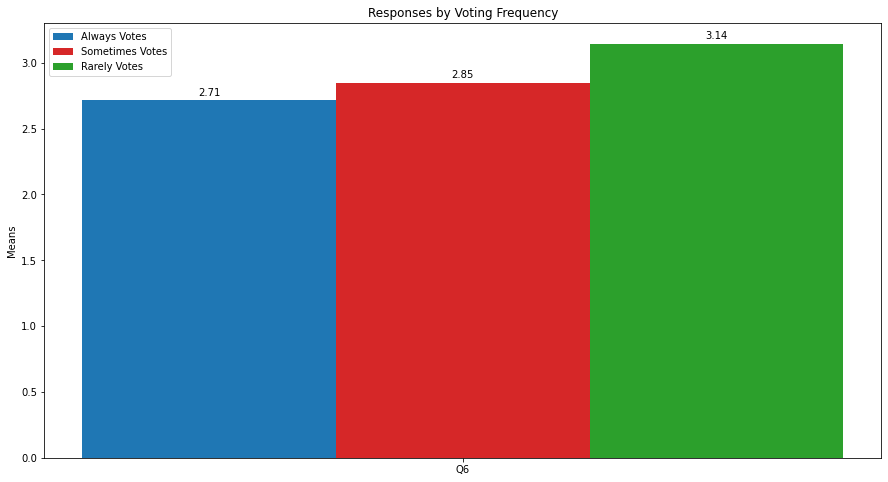

In [11]:
RDI_Analysis('Q6',0,'mean')
Age_Analysis('Q6',0,'mean')
Sex_Analysis('Q6',0,'mean')
Inc_Analysis('Q6',0,'mean')
Freq_Analysis('Q6',0,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q7: f-stat = 256.8272,  p-value = 0.0']


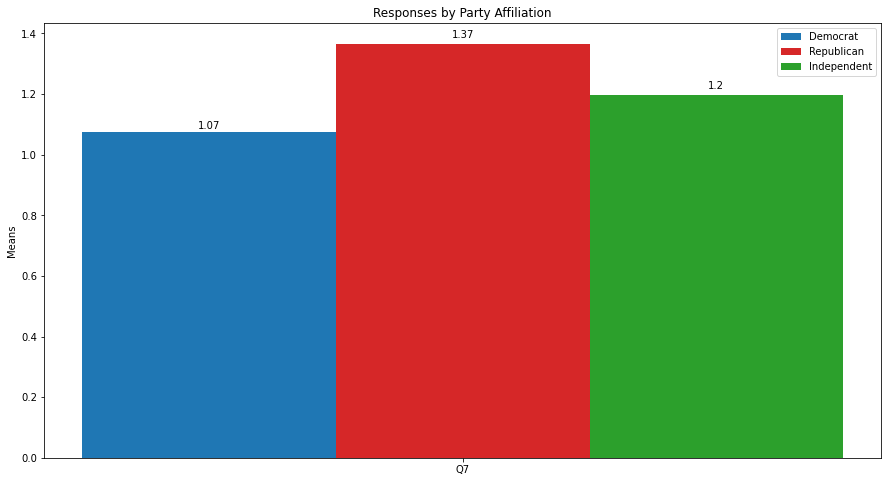

['Q7: f-stat = 15.0576,  p-value = 0.0']


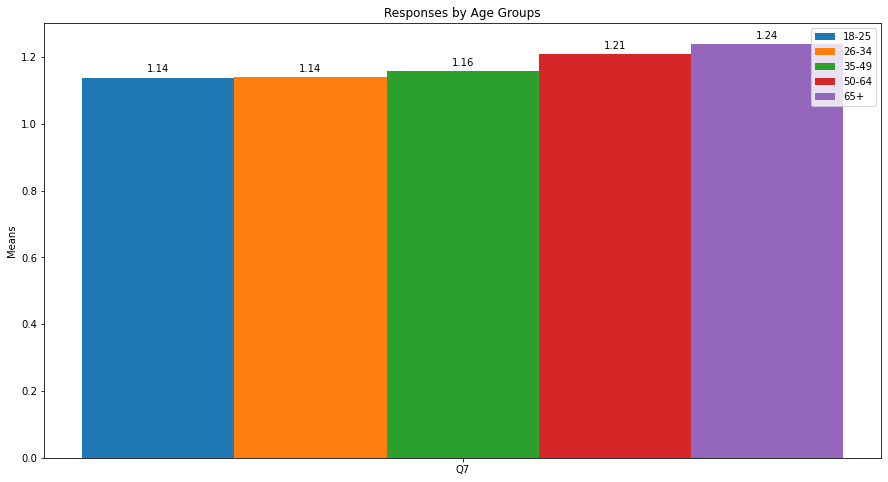

['Q7: t-stat = 4.8783,  p-value = 1.0989e-06']


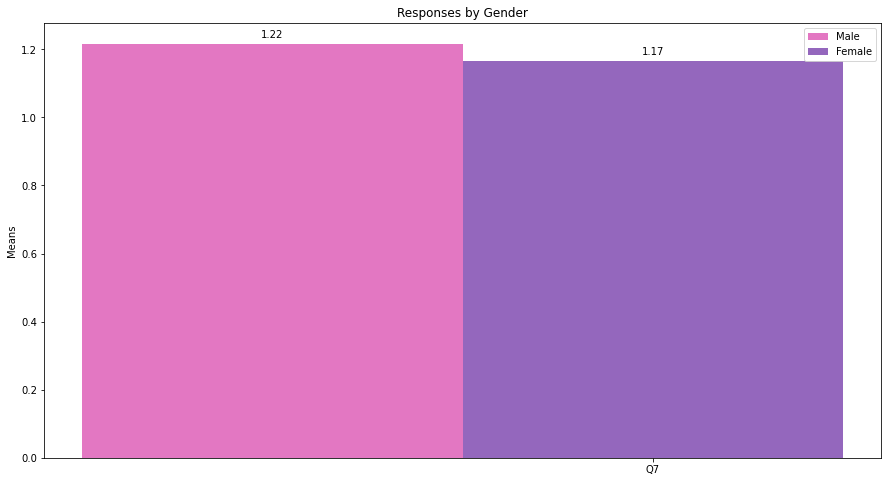

['Q7: f-stat = 26.1575,  p-value = 0.0']


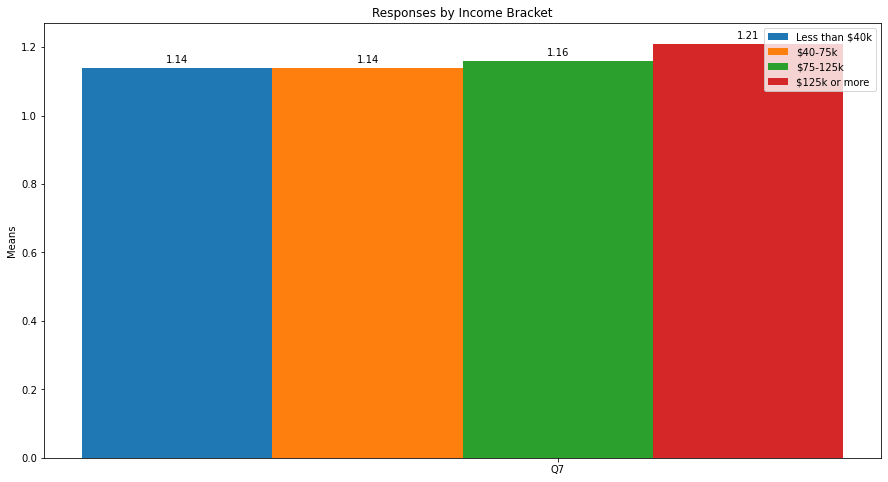

['Q7: f-stat = 34.8716,  p-value = 0.0']


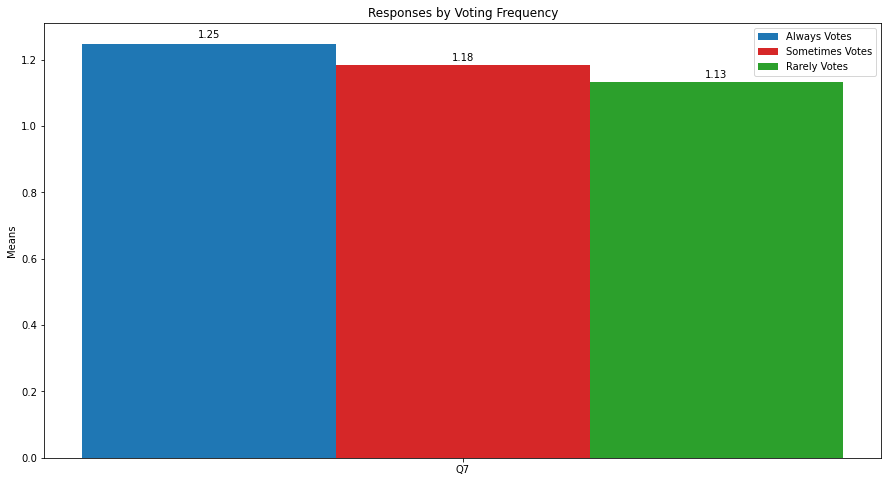

In [12]:
RDI_Analysis('Q7',0,'mean')
Age_Analysis('Q7',0,'mean')
Sex_Analysis('Q7',0,'mean')
Inc_Analysis('Q7',0,'mean')
Freq_Analysis('Q7',0,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q8_1: f-stat = 1311.9793,  p-value = 0.0', 'Q8_2: f-stat = 72.558,  p-value = 0.0', 'Q8_3: f-stat = 23.0576,  p-value = 1e-10', 'Q8_4: f-stat = 155.5976,  p-value = 0.0', 'Q8_5: f-stat = 20.6121,  p-value = 1.2e-09', 'Q8_6: f-stat = 14.2053,  p-value = 7.049e-07', 'Q8_7: f-stat = 775.7647,  p-value = 0.0', 'Q8_8: f-stat = 463.1704,  p-value = 0.0', 'Q8_9: f-stat = 60.9077,  p-value = 0.0']


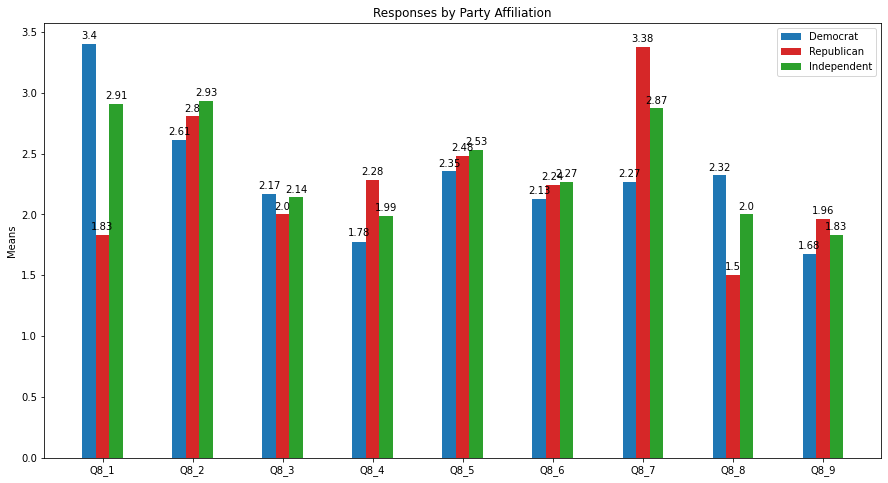

['Q8_1: f-stat = 23.0152,  p-value = 0.0', 'Q8_2: f-stat = 3.4746,  p-value = 0.0076738528', 'Q8_3: f-stat = 28.4948,  p-value = 0.0', 'Q8_4: f-stat = 7.7895,  p-value = 2.9484e-06', 'Q8_5: f-stat = 23.7372,  p-value = 0.0', 'Q8_6: f-stat = 18.6098,  p-value = 0.0', 'Q8_7: f-stat = 22.7126,  p-value = 0.0', 'Q8_8: f-stat = 121.7665,  p-value = 0.0', 'Q8_9: f-stat = 7.6418,  p-value = 3.8861e-06']


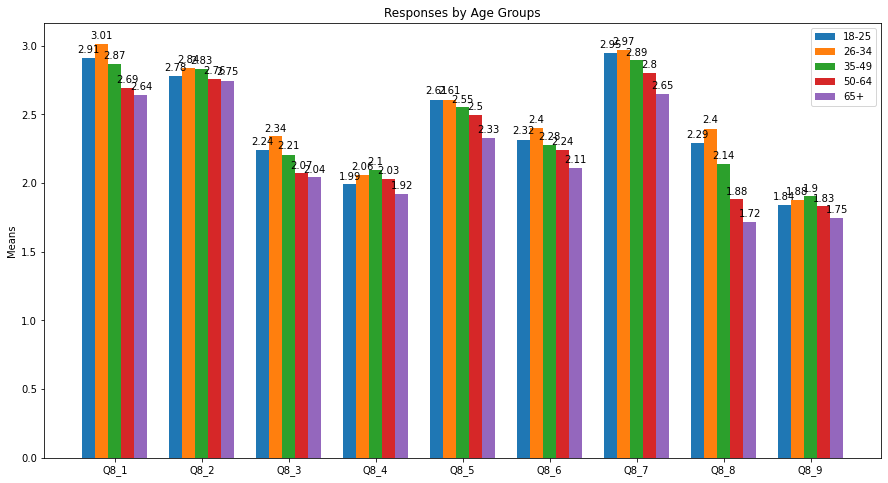

['Q8_1: t-stat = 1.0171,  p-value = 0.3091372759', 'Q8_2: t-stat = 7.8094,  p-value = 0.0', 'Q8_3: t-stat = 0.0392,  p-value = 0.9687241972', 'Q8_4: t-stat = 1.9804,  p-value = 0.0477101679', 'Q8_5: t-stat = 1.0704,  p-value = 0.28446244', 'Q8_6: t-stat = 3.529,  p-value = 0.0004203519', 'Q8_7: t-stat = 3.7342,  p-value = 0.0001901348', 'Q8_8: t-stat = 3.4343,  p-value = 0.0005982804', 'Q8_9: t-stat = 0.1846,  p-value = 0.8535190257']


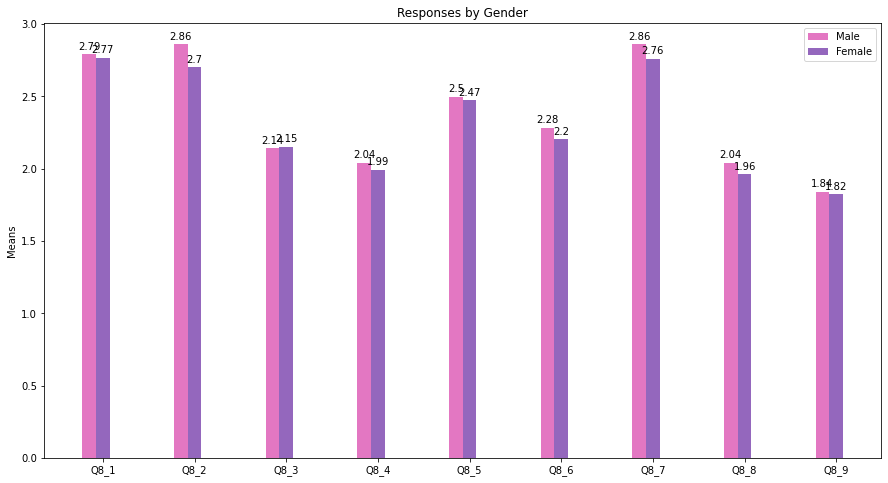

['Q8_1: f-stat = 2.9879,  p-value = 0.0298607291', 'Q8_2: f-stat = 0.3956,  p-value = 0.7561554854', 'Q8_3: f-stat = 35.4962,  p-value = 0.0', 'Q8_4: f-stat = 7.0138,  p-value = 0.0001050243', 'Q8_5: f-stat = 21.5267,  p-value = 0.0', 'Q8_6: f-stat = 26.7787,  p-value = 0.0', 'Q8_7: f-stat = 1.8663,  p-value = 0.1329723948', 'Q8_8: f-stat = 15.2909,  p-value = 7e-10', 'Q8_9: f-stat = 2.3475,  p-value = 0.0706707349']


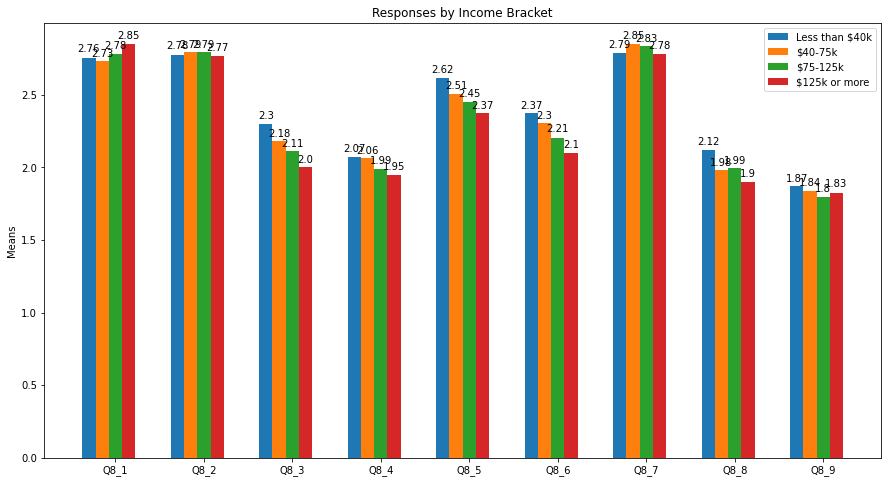

['Q8_1: f-stat = 5.7667,  p-value = 0.0031481812', 'Q8_2: f-stat = 3.3305,  p-value = 0.0358424897', 'Q8_3: f-stat = 48.0664,  p-value = 0.0', 'Q8_4: f-stat = 12.6537,  p-value = 3.2849e-06', 'Q8_5: f-stat = 80.2861,  p-value = 0.0', 'Q8_6: f-stat = 37.2533,  p-value = 0.0', 'Q8_7: f-stat = 12.6646,  p-value = 3.2495e-06', 'Q8_8: f-stat = 65.7851,  p-value = 0.0', 'Q8_9: f-stat = 19.4221,  p-value = 3.9e-09']


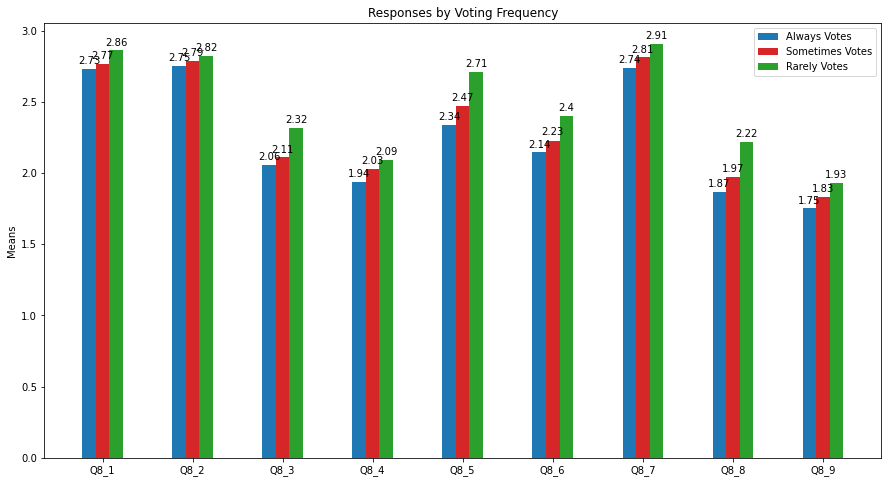

In [13]:
RDI_Analysis('Q8_',9,'mean')
Age_Analysis('Q8_',9,'mean')
Sex_Analysis('Q8_',9,'mean')
Inc_Analysis('Q8_',9,'mean')
Freq_Analysis('Q8_',9,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q9_1: f-stat = 2.8499,  p-value = 0.0579433604', 'Q9_2: f-stat = 200.8093,  p-value = 0.0', 'Q9_3: f-stat = 104.7923,  p-value = 0.0', 'Q9_4: f-stat = 41.1992,  p-value = 0.0']


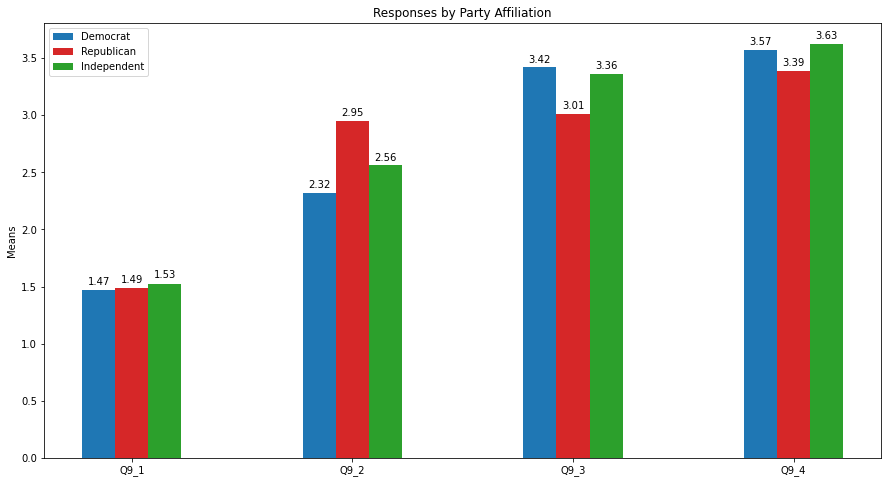

['Q9_1: f-stat = 54.1999,  p-value = 0.0', 'Q9_2: f-stat = 61.6141,  p-value = 0.0', 'Q9_3: f-stat = 3.9618,  p-value = 0.0032584269', 'Q9_4: f-stat = 20.1962,  p-value = 0.0']


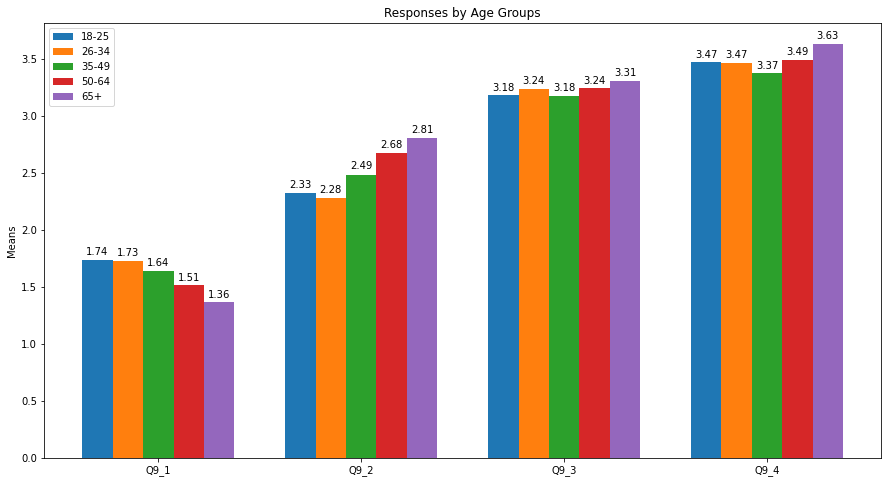

['Q9_1: t-stat = -2.854,  p-value = 0.0043324823', 'Q9_2: t-stat = 3.2959,  p-value = 0.0009871494', 'Q9_3: t-stat = 5.4716,  p-value = 4.65e-08', 'Q9_4: t-stat = 9.7579,  p-value = 0.0']


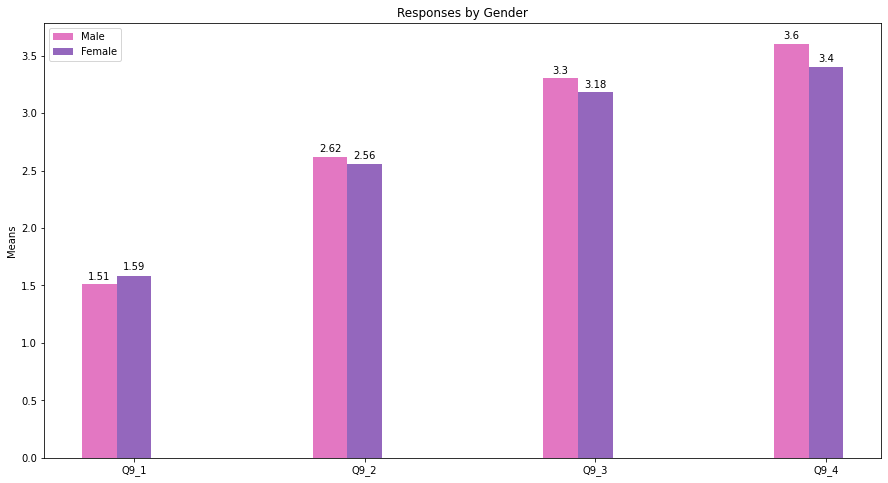

['Q9_1: f-stat = 38.2279,  p-value = 0.0', 'Q9_2: f-stat = 1.9246,  p-value = 0.1232779525', 'Q9_3: f-stat = 54.0592,  p-value = 0.0', 'Q9_4: f-stat = 57.221,  p-value = 0.0']


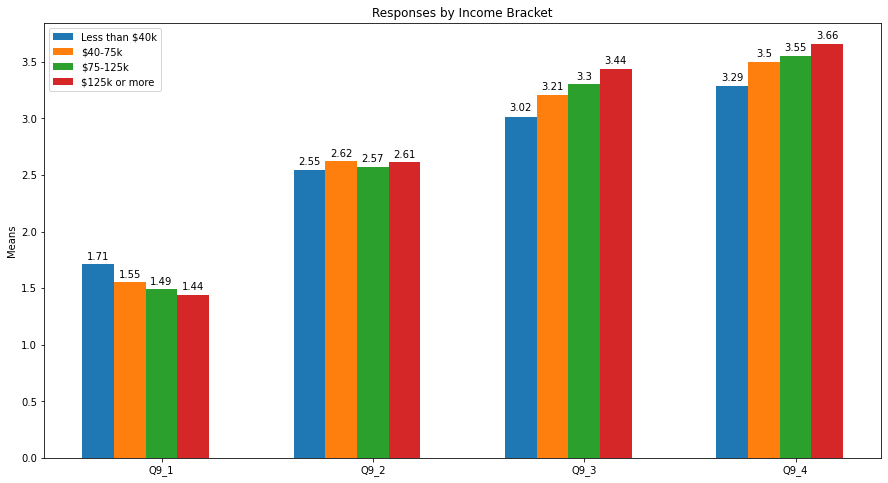

['Q9_1: f-stat = 164.7958,  p-value = 0.0', 'Q9_2: f-stat = 33.5858,  p-value = 0.0', 'Q9_3: f-stat = 72.2722,  p-value = 0.0', 'Q9_4: f-stat = 90.2849,  p-value = 0.0']


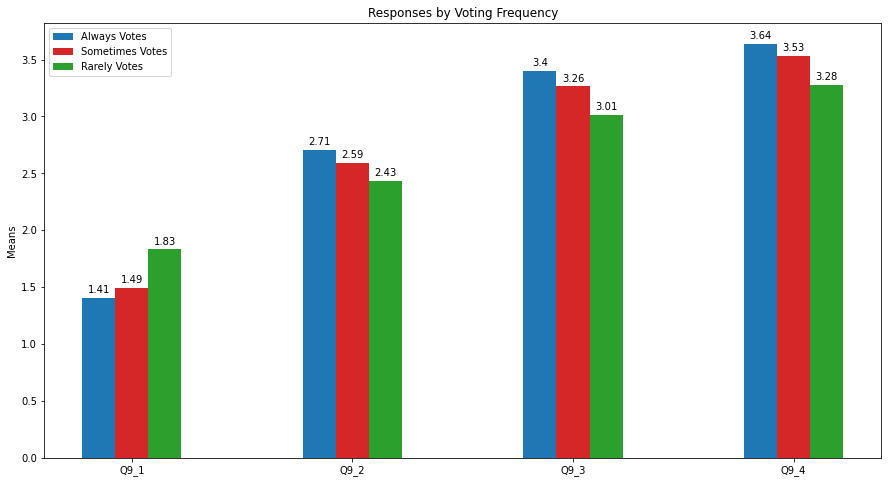

In [14]:
RDI_Analysis('Q9_',4,'mean')
Age_Analysis('Q9_',4,'mean')
Sex_Analysis('Q9_',4,'mean')
Inc_Analysis('Q9_',4,'mean')
Freq_Analysis('Q9_',4,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q10_1: f-stat = 5.296,  p-value = 0.0050399535', 'Q10_2: f-stat = 3.1086,  p-value = 0.0447498774', 'Q10_3: f-stat = 3.4101,  p-value = 0.0331142095', 'Q10_4: f-stat = 0.139,  p-value = 0.8702625403']


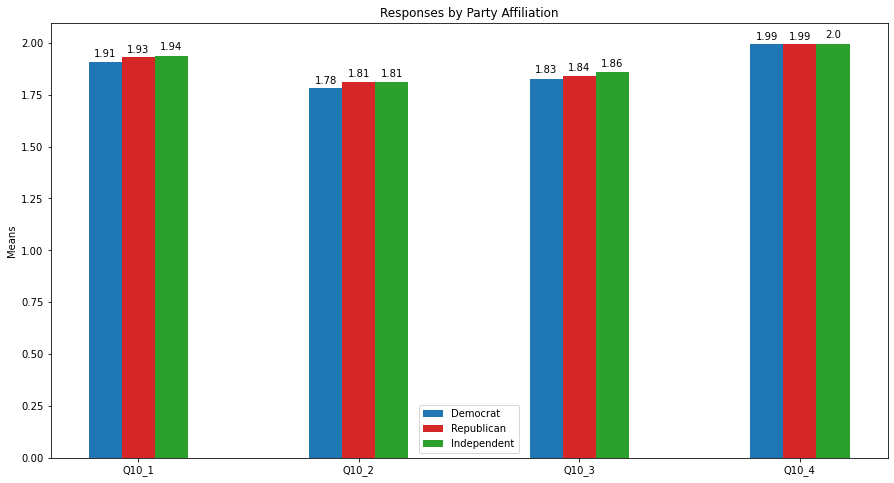

['Q10_1: f-stat = 20.663,  p-value = 0.0', 'Q10_2: f-stat = 37.576,  p-value = 0.0', 'Q10_3: f-stat = 11.5114,  p-value = 2.6e-09', 'Q10_4: f-stat = 4.9319,  p-value = 0.0005728857']


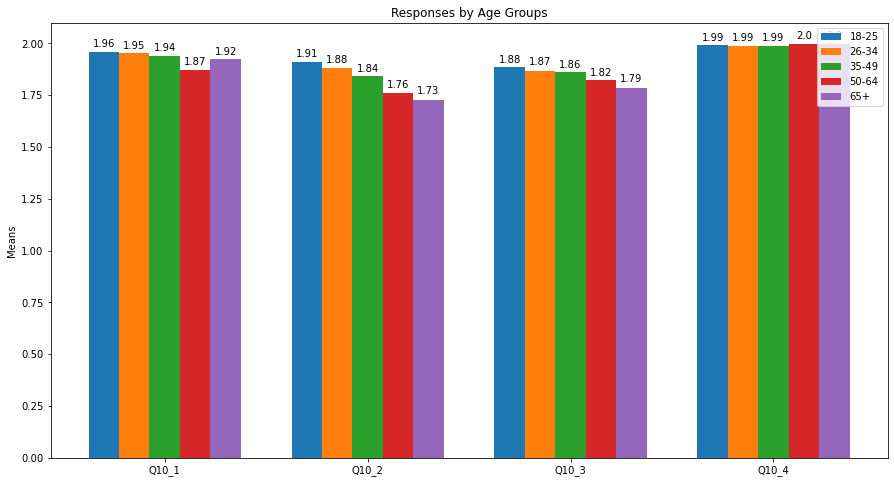

['Q10_1: t-stat = -1.52,  p-value = 0.128576788', 'Q10_2: t-stat = 3.0774,  p-value = 0.0020979904', 'Q10_3: t-stat = 3.8718,  p-value = 0.000109222', 'Q10_4: t-stat = 1.1918,  p-value = 0.2333819989']


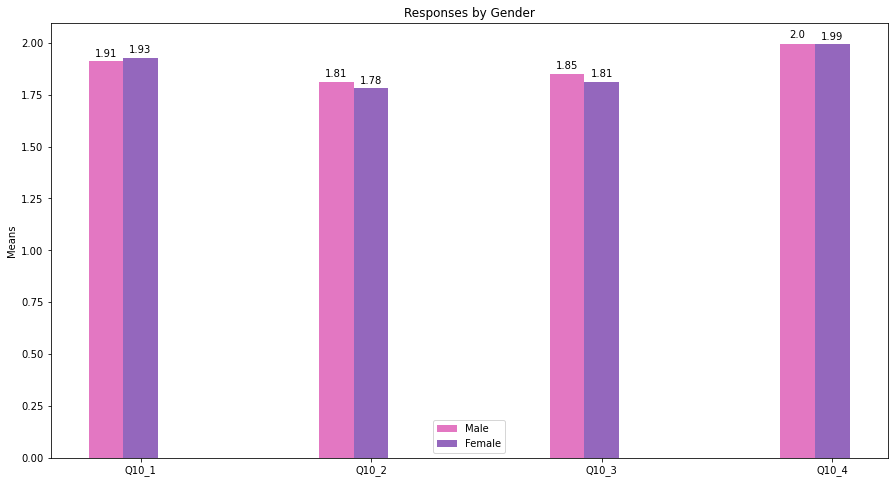

['Q10_1: f-stat = 122.2961,  p-value = 0.0', 'Q10_2: f-stat = 51.423,  p-value = 0.0', 'Q10_3: f-stat = 124.6764,  p-value = 0.0', 'Q10_4: f-stat = 17.2953,  p-value = 0.0']


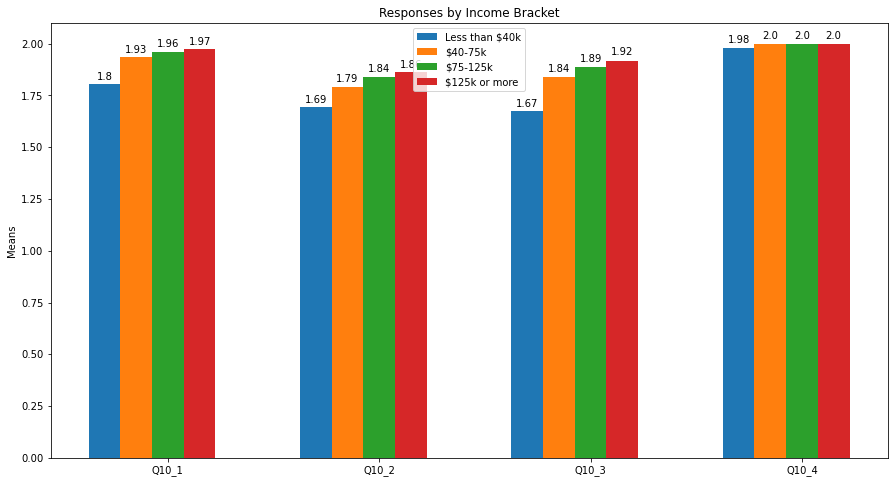

['Q10_1: f-stat = 25.2091,  p-value = 0.0', 'Q10_2: f-stat = 0.8652,  p-value = 0.4210389172', 'Q10_3: f-stat = 9.9524,  p-value = 4.84312e-05', 'Q10_4: f-stat = 8.2817,  p-value = 0.0002561099']


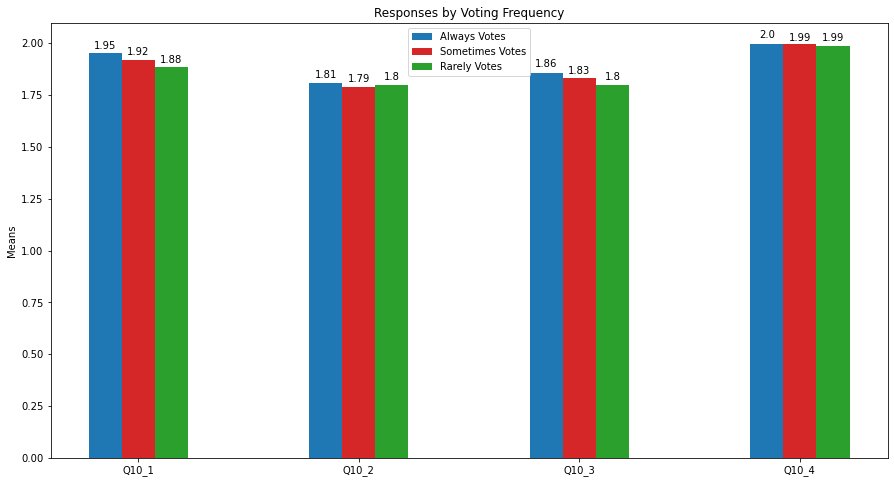

In [15]:
RDI_Analysis('Q10_',4,'mean')
Age_Analysis('Q10_',4,'mean')
Sex_Analysis('Q10_',4,'mean')
Inc_Analysis('Q10_',4,'mean')
Freq_Analysis('Q10_',4,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q11_1: f-stat = 2.858,  p-value = 0.057475482', 'Q11_2: f-stat = 1.5755,  p-value = 0.2070134603', 'Q11_3: f-stat = 18.5901,  p-value = 9e-09', 'Q11_4: f-stat = 39.815,  p-value = 0.0', 'Q11_5: f-stat = 12.3505,  p-value = 4.4611e-06', 'Q11_6: f-stat = 3.4079,  p-value = 0.0331874746']


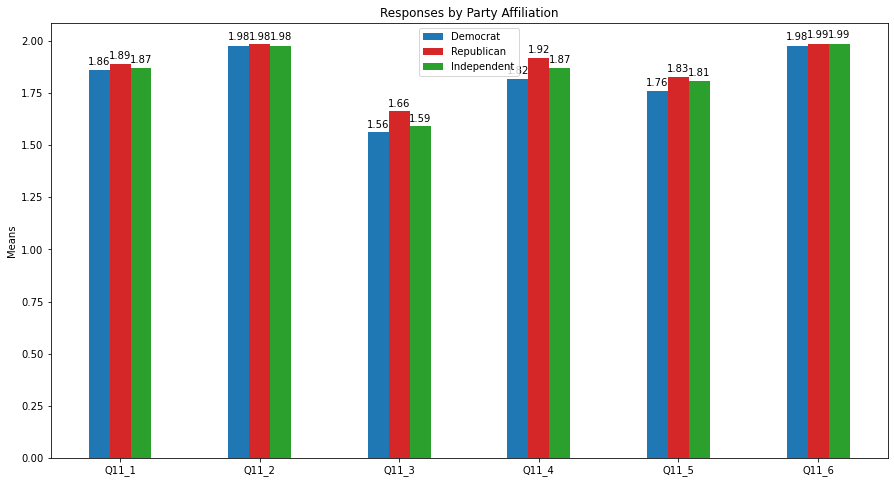

['Q11_1: f-stat = 23.3595,  p-value = 0.0', 'Q11_2: f-stat = 1.7981,  p-value = 0.1262250896', 'Q11_3: f-stat = 7.3436,  p-value = 6.7766e-06', 'Q11_4: f-stat = 4.3698,  p-value = 0.0015757048', 'Q11_5: f-stat = 45.0587,  p-value = 0.0', 'Q11_6: f-stat = 10.7187,  p-value = 1.18e-08']


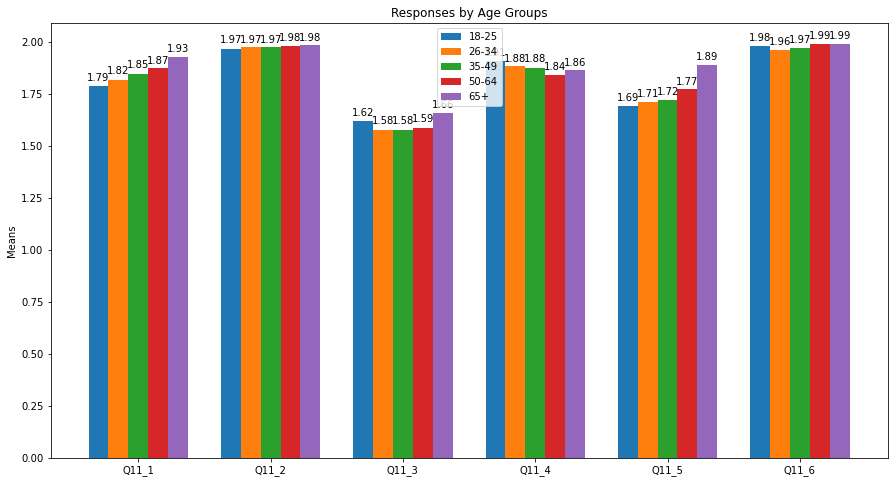

['Q11_1: t-stat = 1.0863,  p-value = 0.2773731443', 'Q11_2: t-stat = 0.9077,  p-value = 0.3640931002', 'Q11_3: t-stat = 2.4324,  p-value = 0.0150287848', 'Q11_4: t-stat = 1.8505,  p-value = 0.0642966857', 'Q11_5: t-stat = 4.5107,  p-value = 6.5892e-06', 'Q11_6: t-stat = 2.9523,  p-value = 0.0031664866']


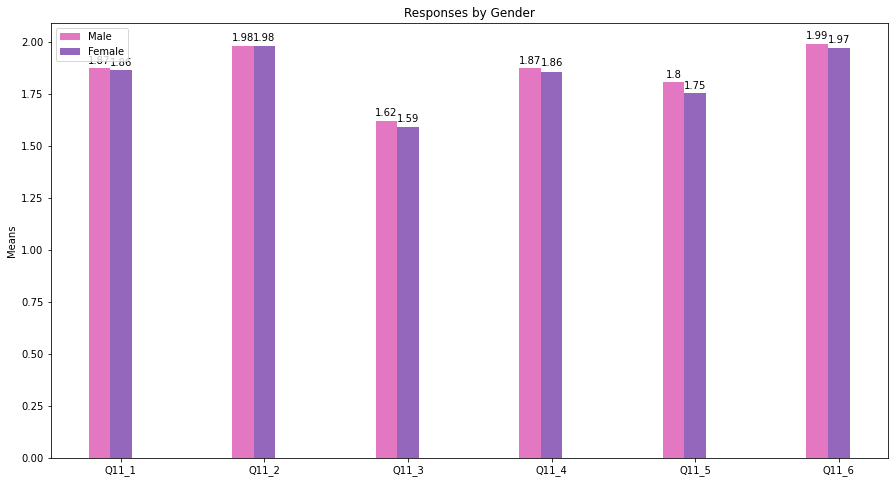

['Q11_1: f-stat = 17.777,  p-value = 0.0', 'Q11_2: f-stat = 1.5918,  p-value = 0.1891239628', 'Q11_3: f-stat = 9.5635,  p-value = 2.6883e-06', 'Q11_4: f-stat = 0.9902,  p-value = 0.3962386013', 'Q11_5: f-stat = 149.3403,  p-value = 0.0', 'Q11_6: f-stat = 12.174,  p-value = 6.13e-08']


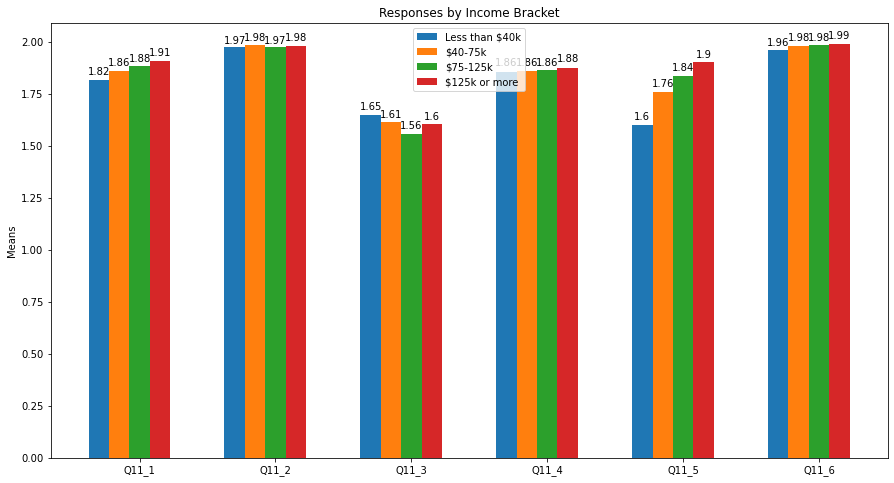

['Q11_1: f-stat = 22.4525,  p-value = 2e-10', 'Q11_2: f-stat = 0.7083,  p-value = 0.4925178546', 'Q11_3: f-stat = 1.7327,  p-value = 0.1768917022', 'Q11_4: f-stat = 1.4298,  p-value = 0.2394502013', 'Q11_5: f-stat = 72.3273,  p-value = 0.0', 'Q11_6: f-stat = 13.8466,  p-value = 1.0018e-06']


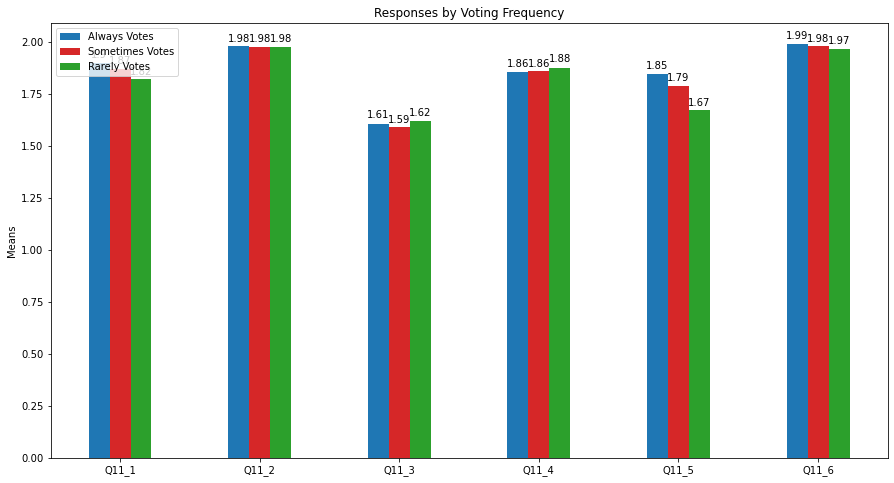

In [16]:
RDI_Analysis('Q11_',6,'mean')
Age_Analysis('Q11_',6,'mean')
Sex_Analysis('Q11_',6,'mean')
Inc_Analysis('Q11_',6,'mean')
Freq_Analysis('Q11_',6,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


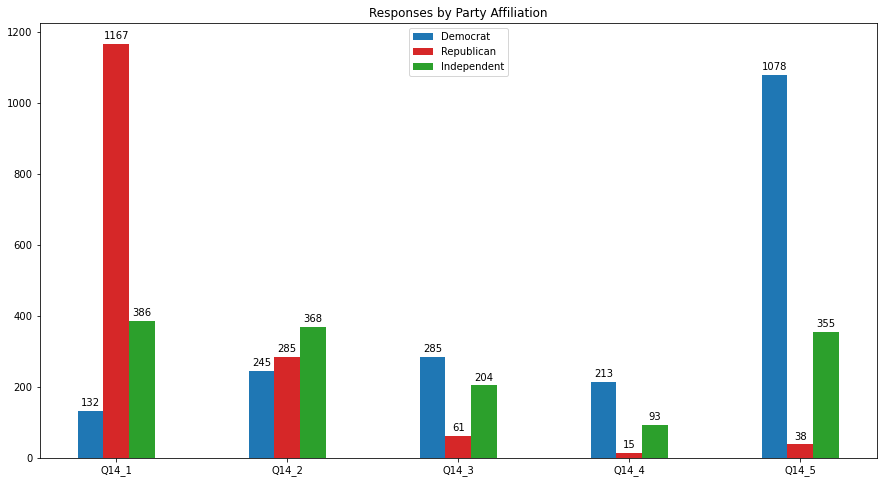

[]


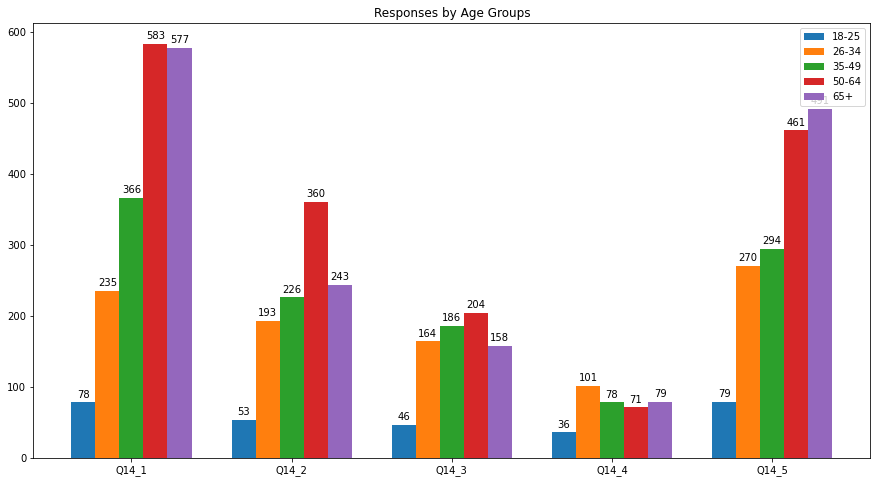

[]


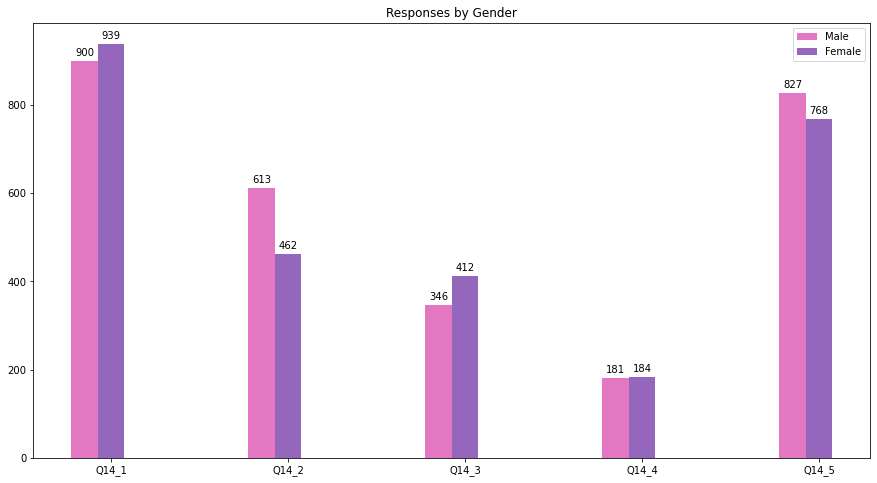

[]


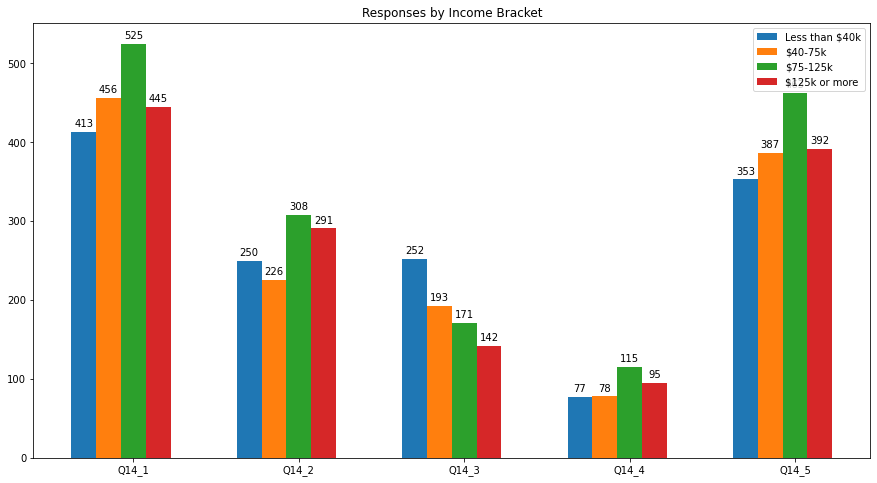

[]


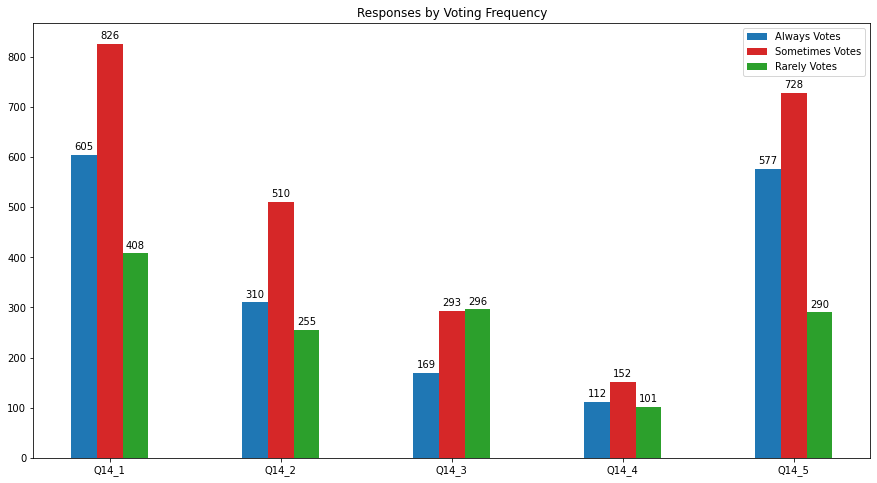

In [17]:
RDI_Analysis('Q14',5,'range')
Age_Analysis('Q14',5,'range')
Sex_Analysis('Q14',5,'range')
Inc_Analysis('Q14',5,'range')
Freq_Analysis('Q14',5,'range')

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


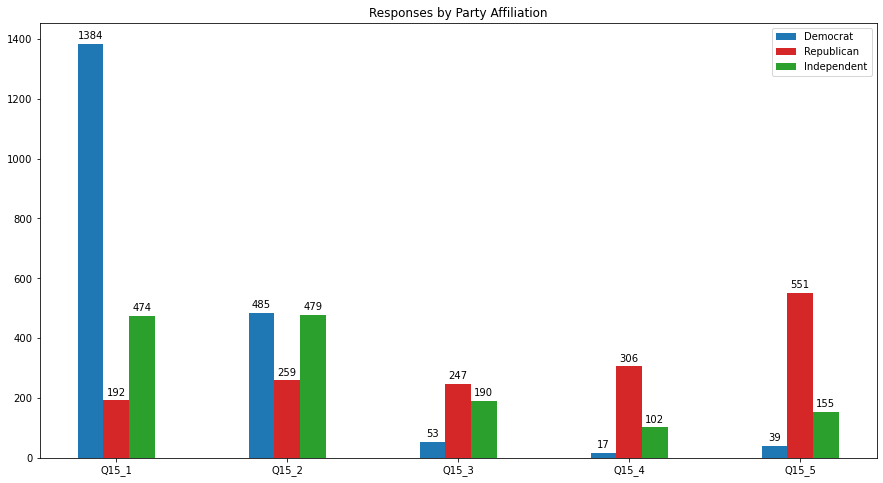

[]


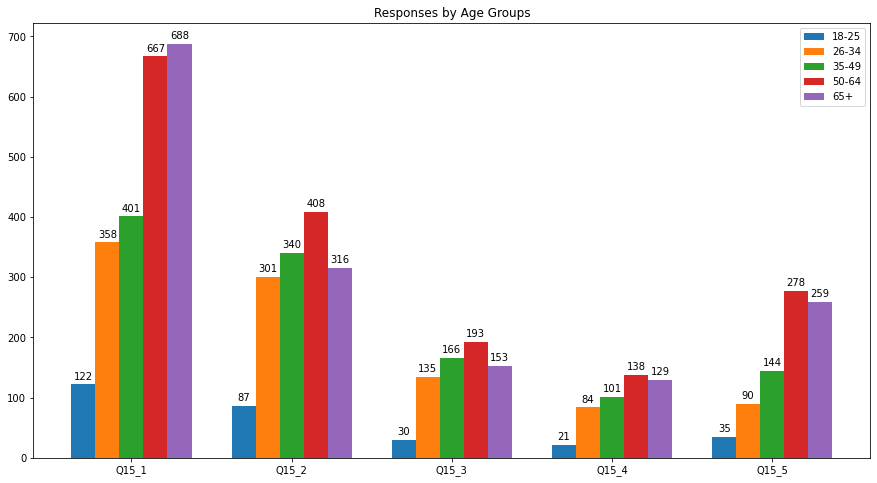

[]


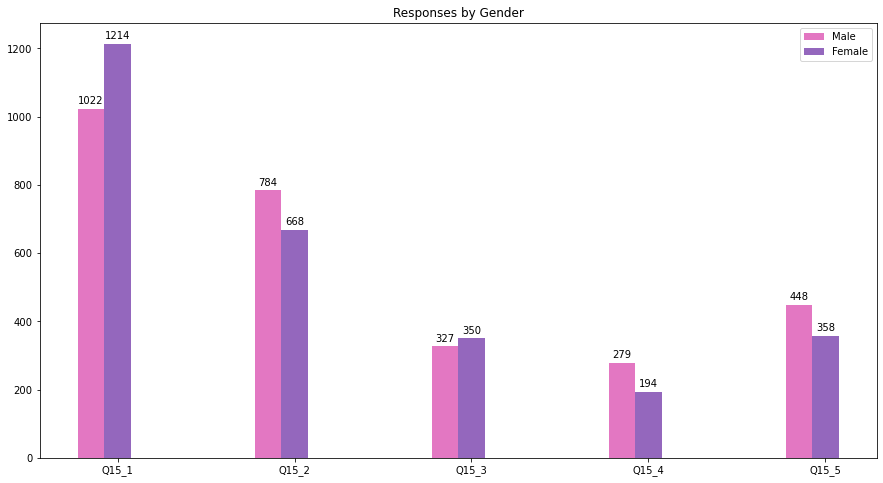

[]


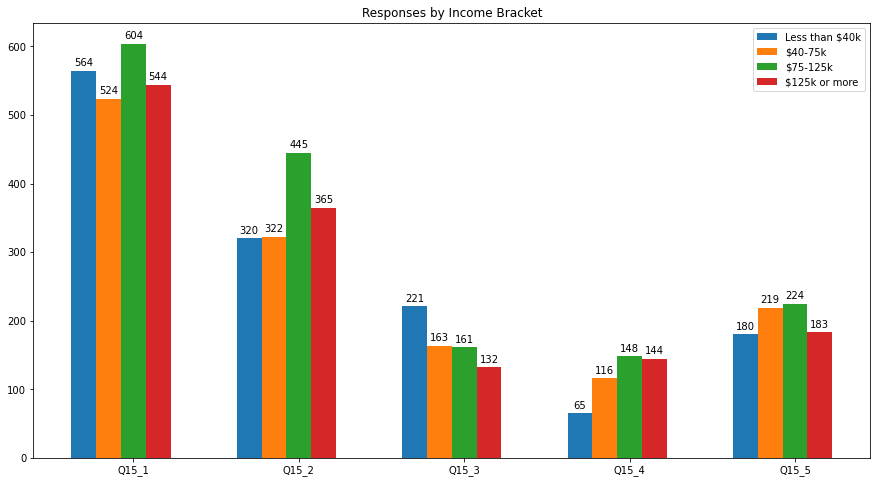

[]


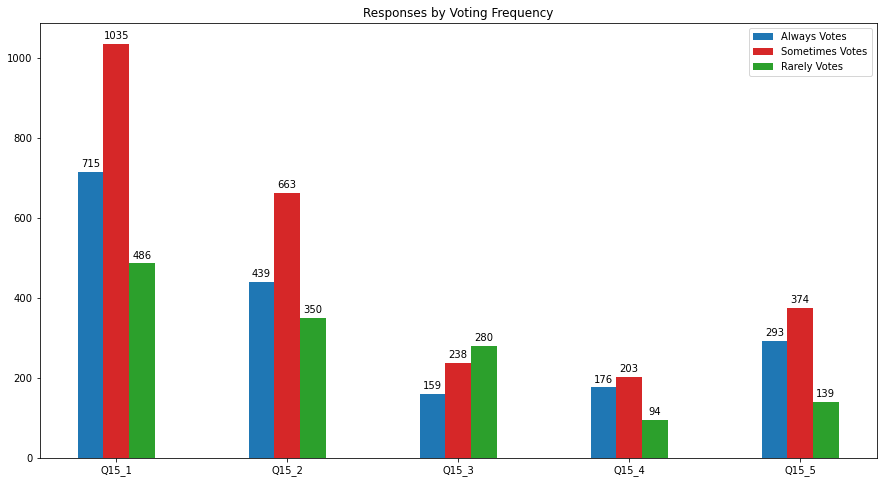

In [34]:
RDI_Analysis('Q15',5,'range')
Age_Analysis('Q15',5,'range')
Sex_Analysis('Q15',5,'range')
Inc_Analysis('Q15',5,'range')
Freq_Analysis('Q15',5,'range')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q16: f-stat = 190.1608,  p-value = 0.0']


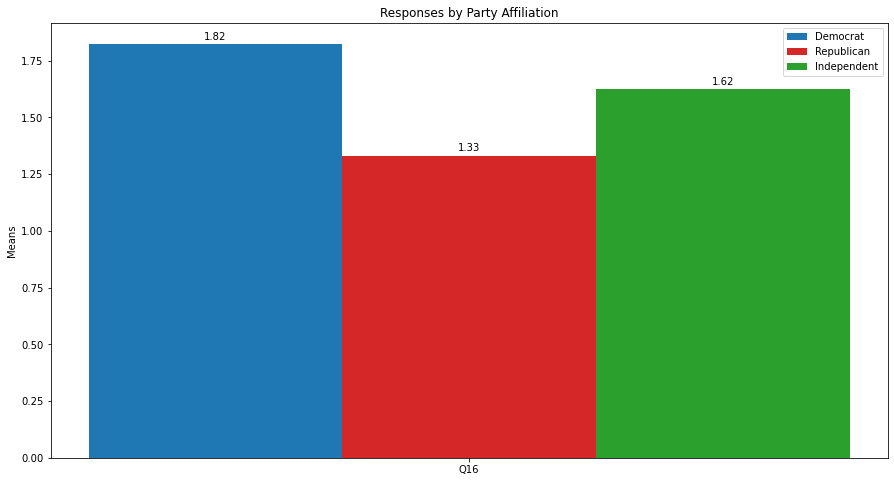

['Q16: f-stat = 58.3267,  p-value = 0.0']


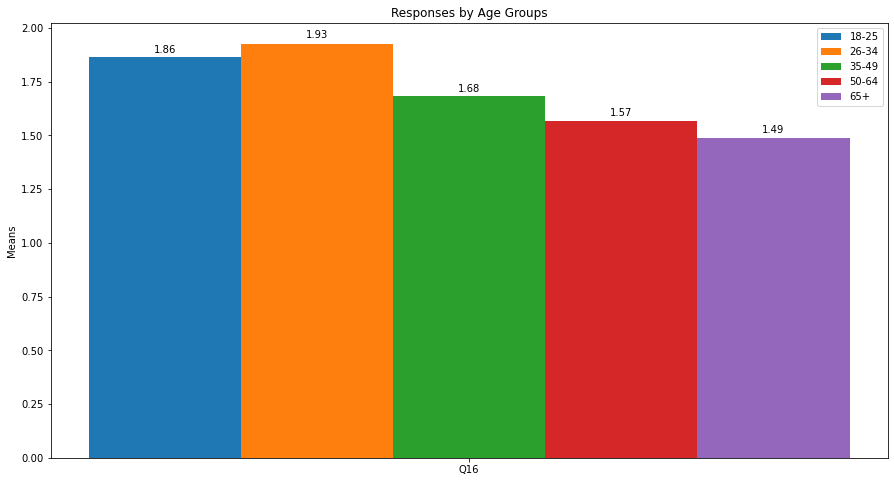

['Q16: t-stat = -3.8413,  p-value = 0.0001237121']


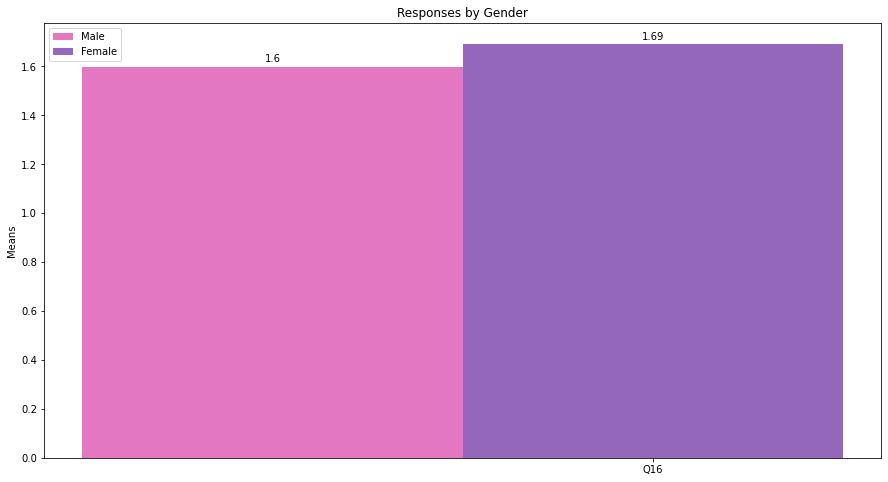

['Q16: f-stat = 24.9154,  p-value = 0.0']


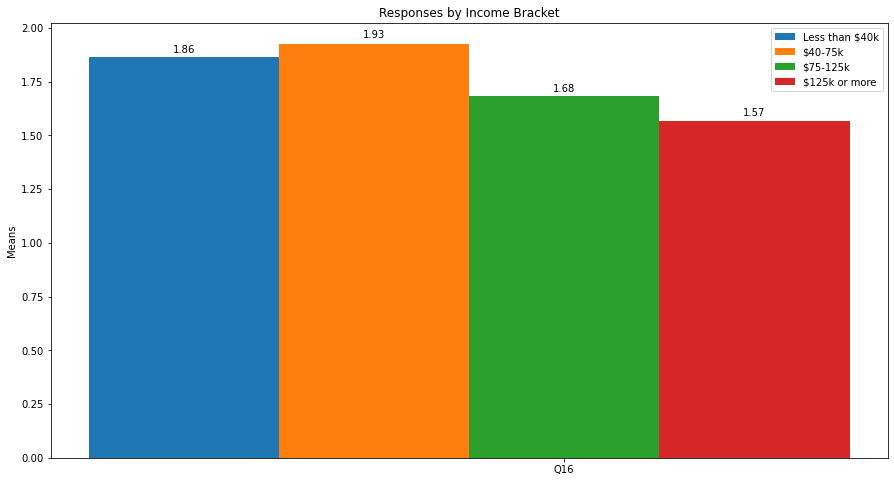

['Q16: f-stat = 129.1466,  p-value = 0.0']


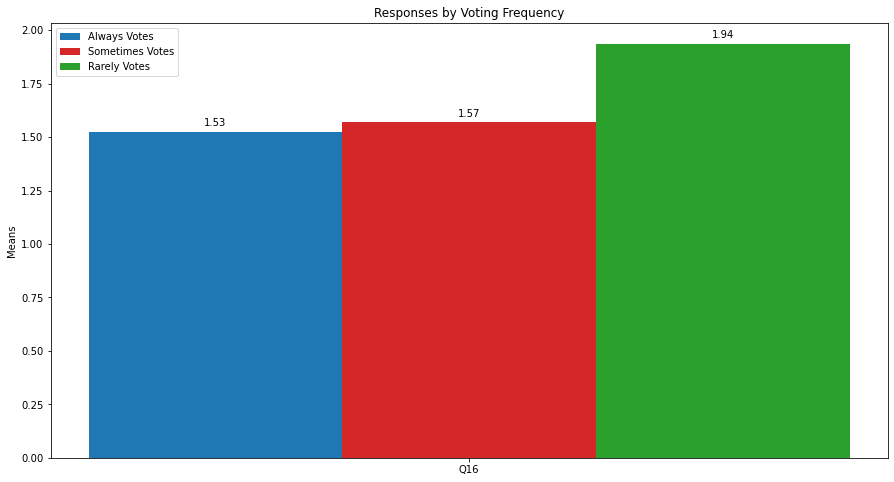

In [19]:
RDI_Analysis('Q16',0,'mean')
Age_Analysis('Q16',0,'mean')
Sex_Analysis('Q16',0,'mean')
Inc_Analysis('Q16',0,'mean')
Freq_Analysis('Q16',0,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q17_1: f-stat = 18.9923,  p-value = 6.1e-09', 'Q17_2: f-stat = 10.8356,  p-value = 2.01531e-05', 'Q17_3: f-stat = 444.7204,  p-value = 0.0', 'Q17_4: f-stat = 175.8776,  p-value = 0.0']


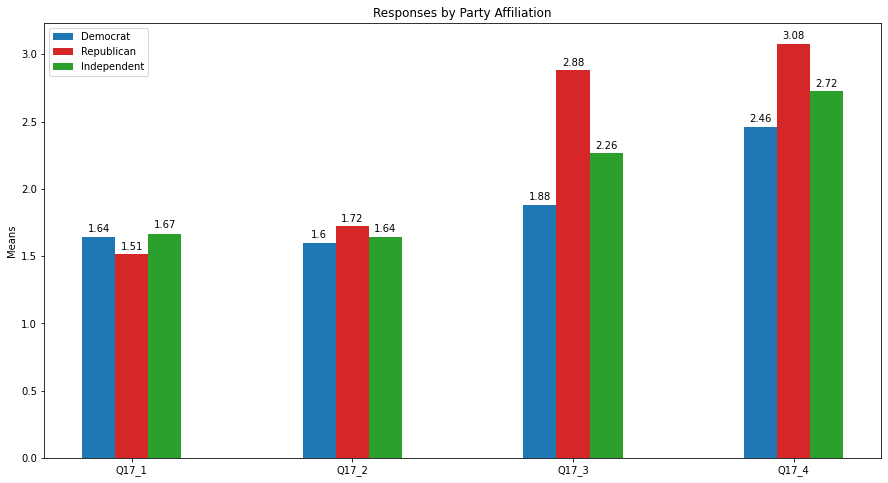

['Q17_1: f-stat = 64.8996,  p-value = 0.0', 'Q17_2: f-stat = 27.0271,  p-value = 0.0', 'Q17_3: f-stat = 7.9031,  p-value = 2.3844e-06', 'Q17_4: f-stat = 0.2193,  p-value = 0.9277789233']


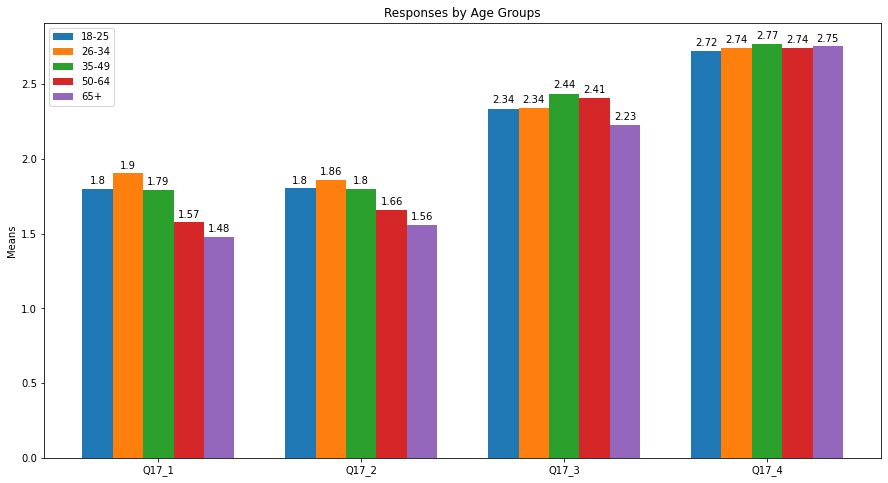

['Q17_1: t-stat = -0.7633,  p-value = 0.4452909309', 'Q17_2: t-stat = -4.4995,  p-value = 6.946e-06', 'Q17_3: t-stat = -2.3329,  p-value = 0.0196853309', 'Q17_4: t-stat = 1.0962,  p-value = 0.2730586485']


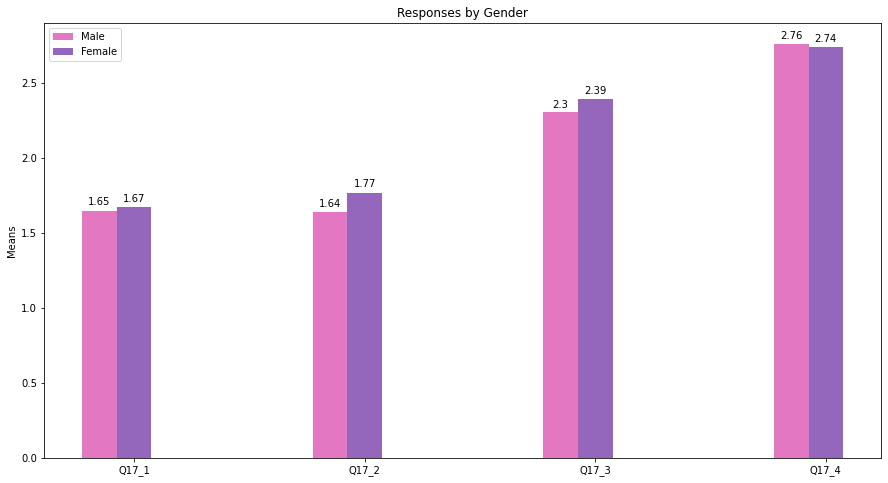

['Q17_1: f-stat = 22.1507,  p-value = 0.0', 'Q17_2: f-stat = 36.7091,  p-value = 0.0', 'Q17_3: f-stat = 18.5181,  p-value = 0.0', 'Q17_4: f-stat = 3.5535,  p-value = 0.0137668536']


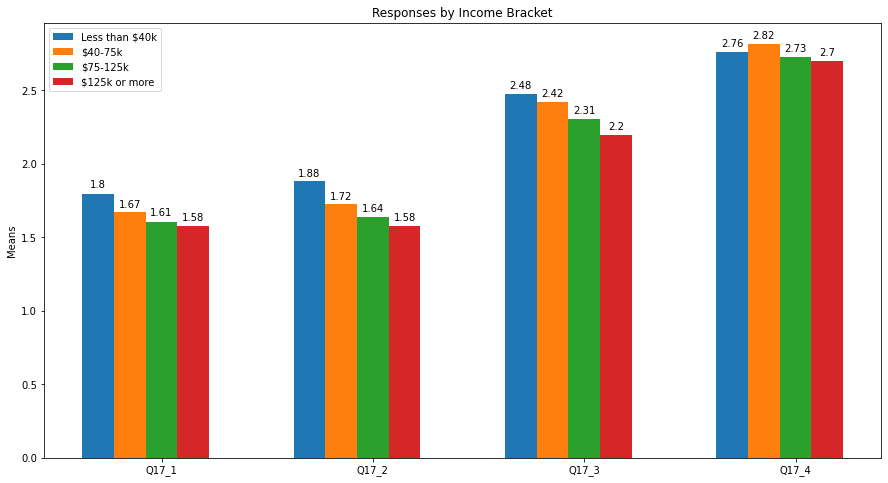

['Q17_1: f-stat = 105.0806,  p-value = 0.0', 'Q17_2: f-stat = 99.7066,  p-value = 0.0', 'Q17_3: f-stat = 34.1499,  p-value = 0.0', 'Q17_4: f-stat = 1.7875,  p-value = 0.1674771466']


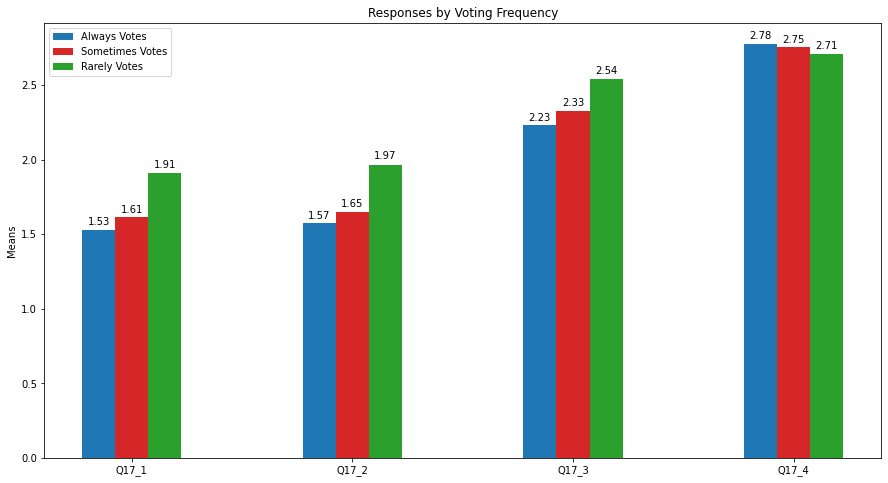

In [20]:
RDI_Analysis('Q17_',4,'mean')
Age_Analysis('Q17_',4,'mean')
Sex_Analysis('Q17_',4,'mean')
Inc_Analysis('Q17_',4,'mean')
Freq_Analysis('Q17_',4,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


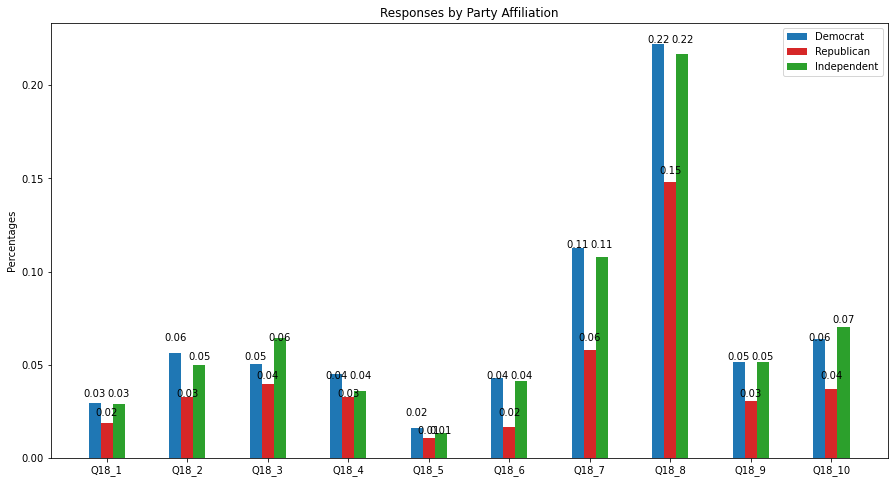

[]


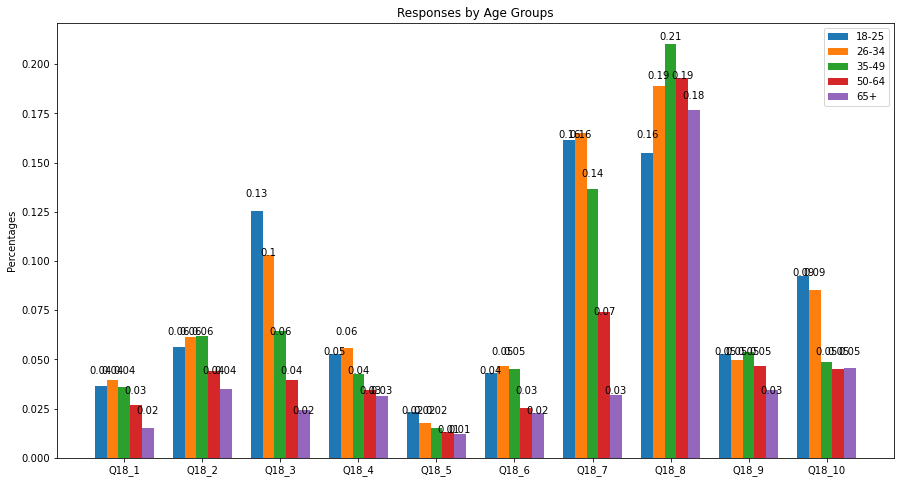

[]


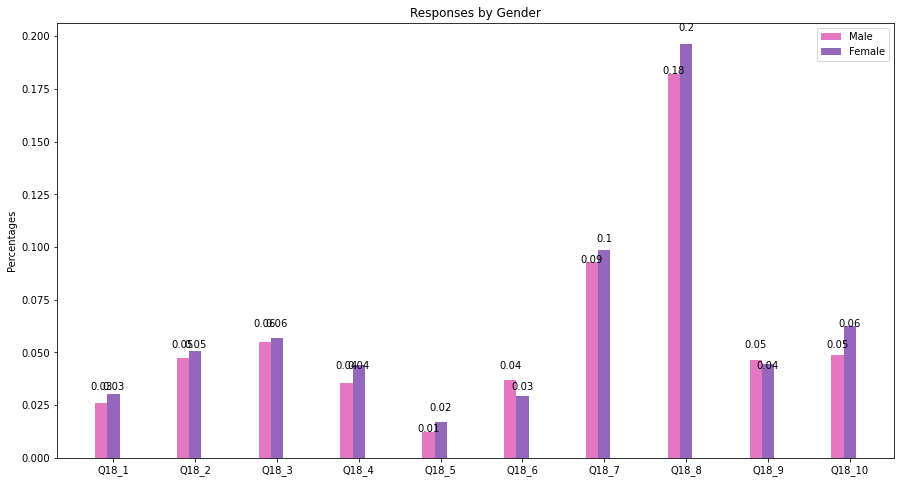

[]


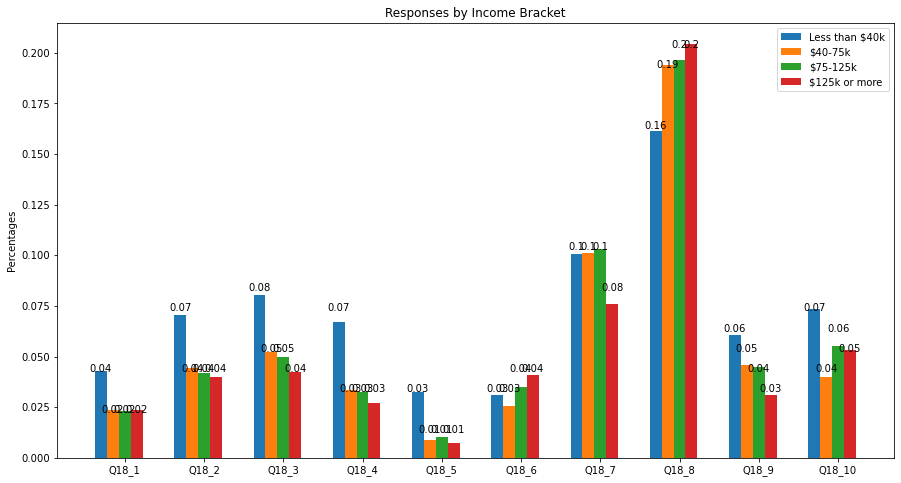

[]


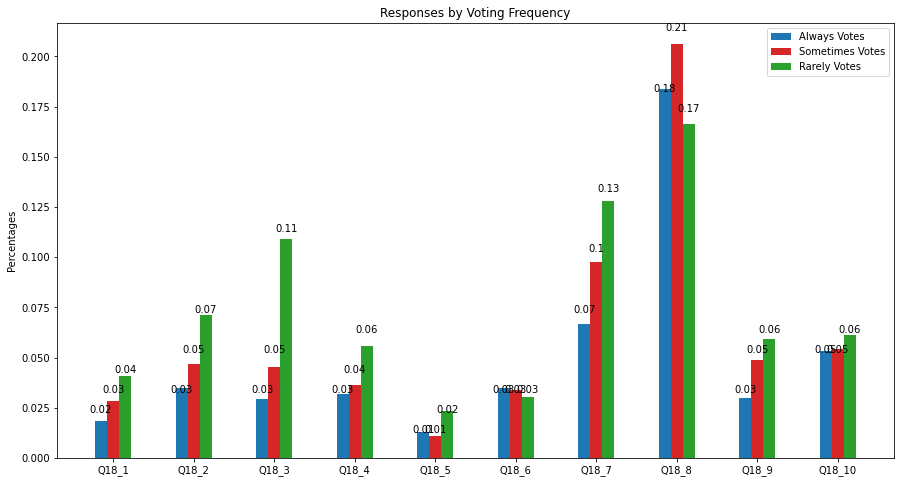

In [37]:
RDI_Analysis('Q18_',10,True)
Age_Analysis('Q18_',10,True)
Sex_Analysis('Q18_',10,True)
Inc_Analysis('Q18_',10,True)
Freq_Analysis('Q18_',10,True)

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


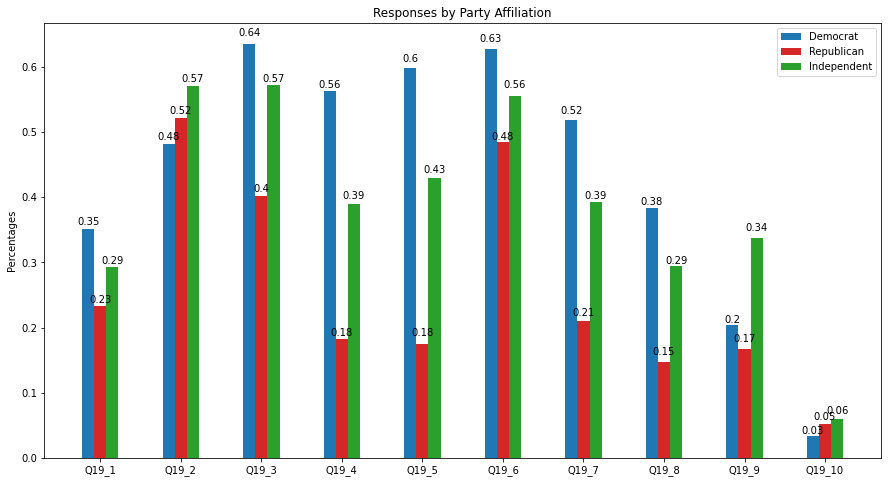

[]


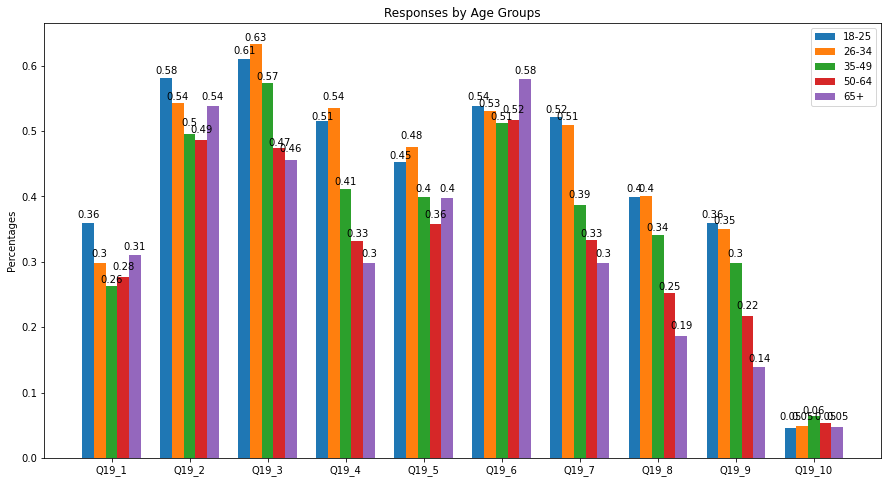

[]


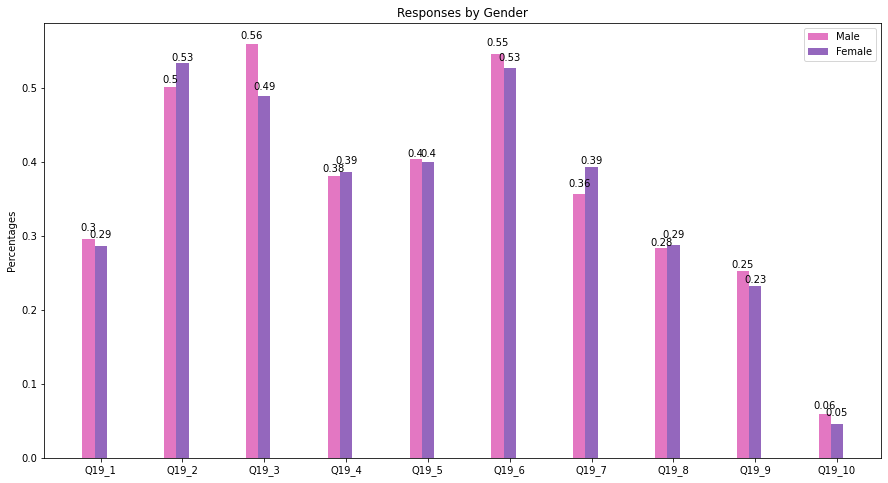

[]


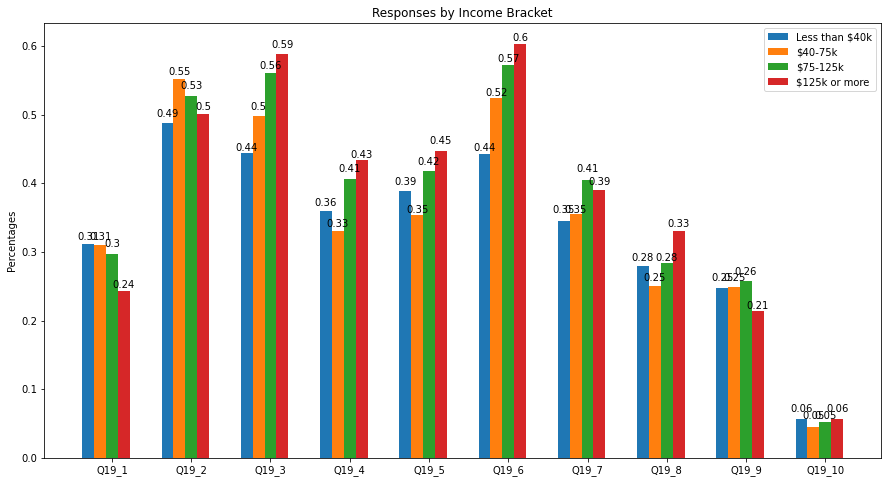

[]


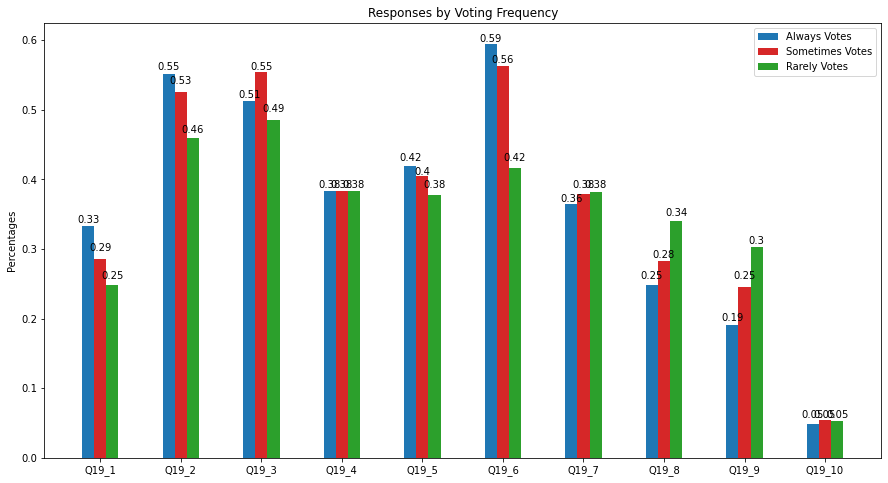

In [22]:
RDI_Analysis('Q19_',10,True)
Age_Analysis('Q19_',10,True)
Sex_Analysis('Q19_',10,True)
Inc_Analysis('Q19_',10,True)
Freq_Analysis('Q19_',10,True)

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q20: f-stat = 8.6042,  p-value = 0.0001860655']


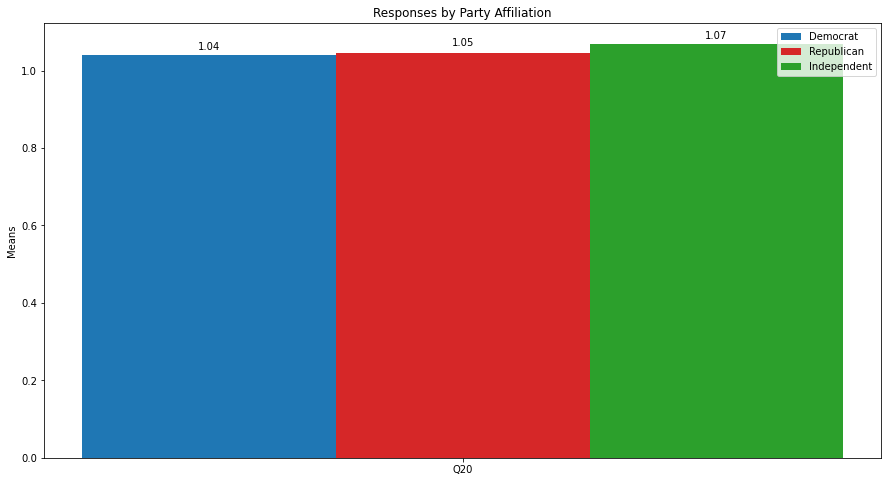

['Q20: f-stat = 29.8764,  p-value = 0.0']


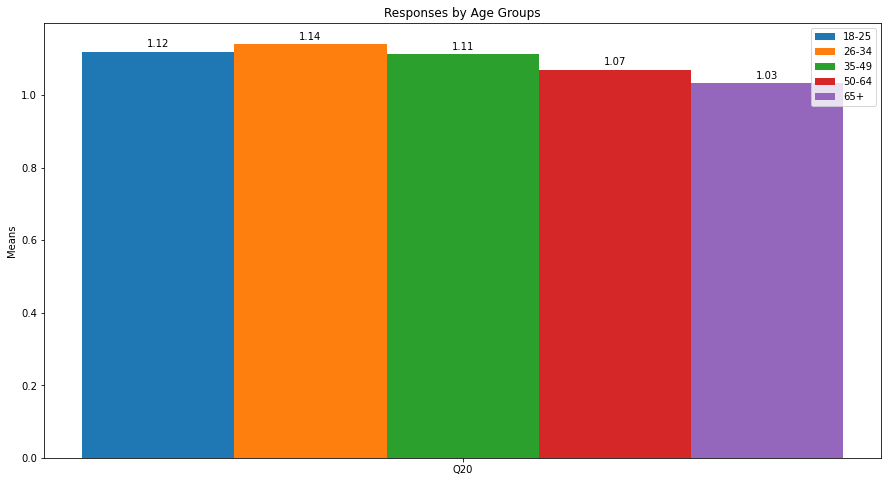

['Q20: t-stat = 0.8387,  p-value = 0.4016666795']


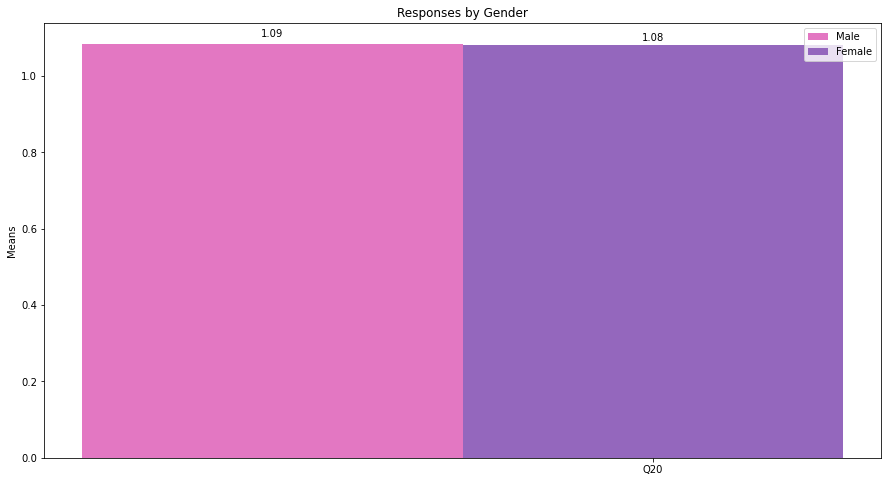

['Q20: f-stat = 66.8676,  p-value = 0.0']


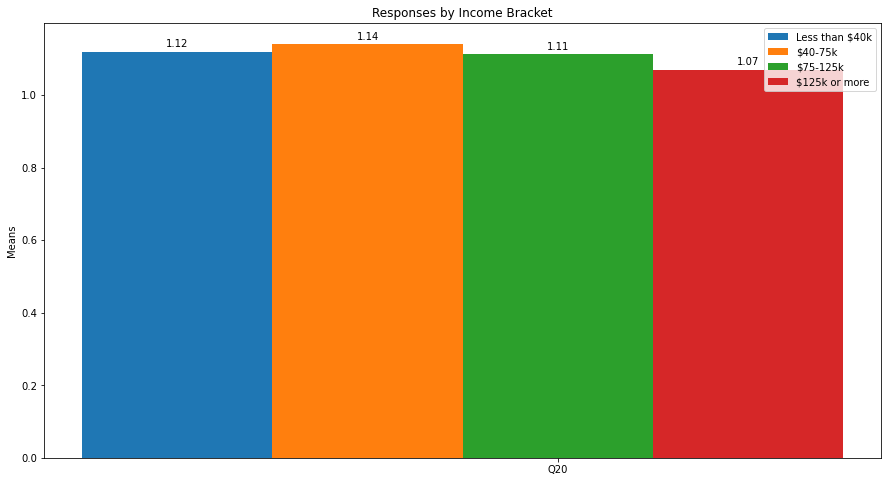

['Q20: f-stat = 932.393,  p-value = 0.0']


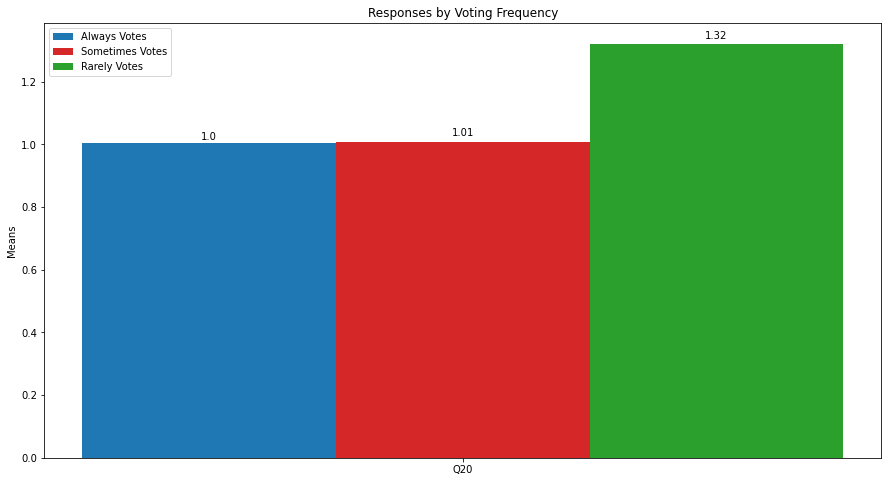

In [23]:
RDI_Analysis('Q20',0,'mean')
Age_Analysis('Q20',0,'mean')
Sex_Analysis('Q20',0,'mean')
Inc_Analysis('Q20',0,'mean')
Freq_Analysis('Q20',0,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


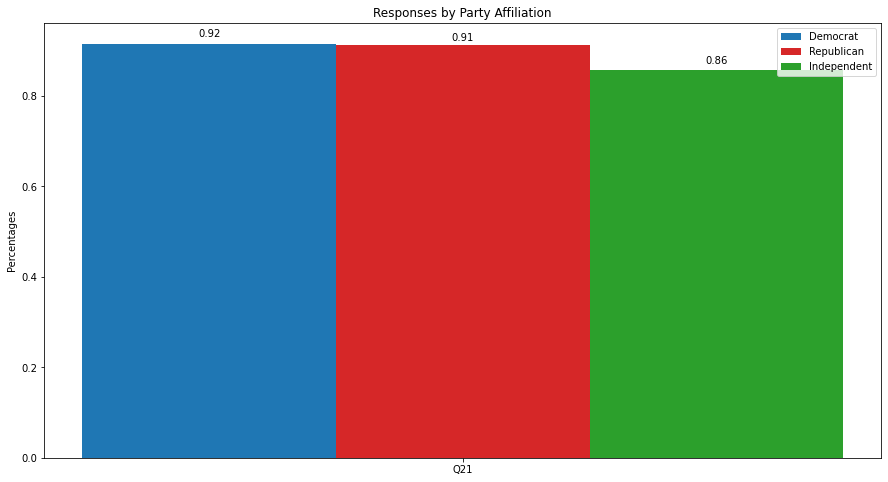

[]


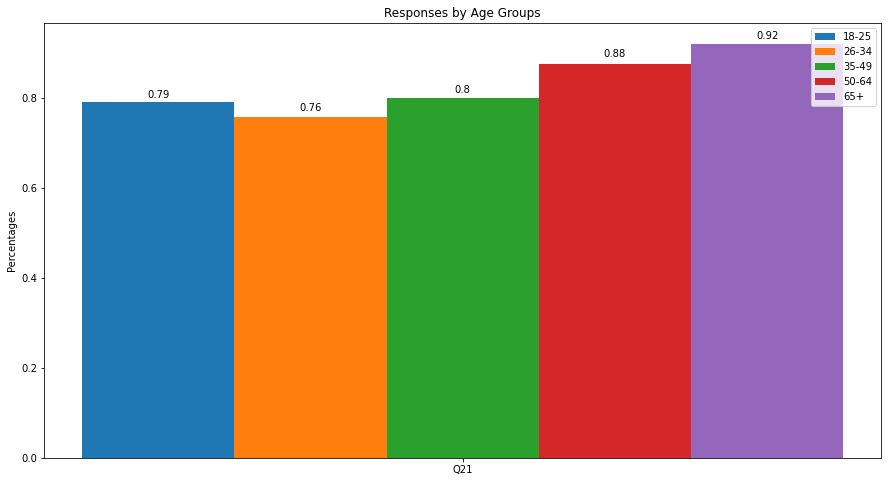

[]


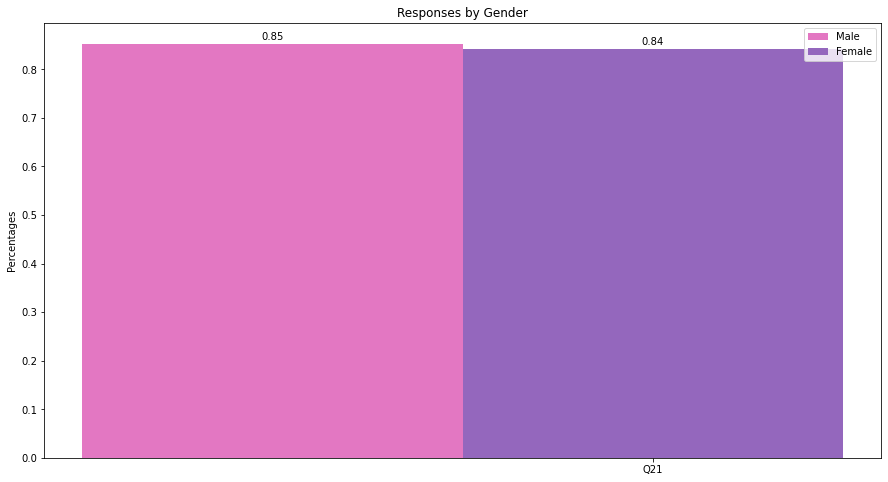

[]


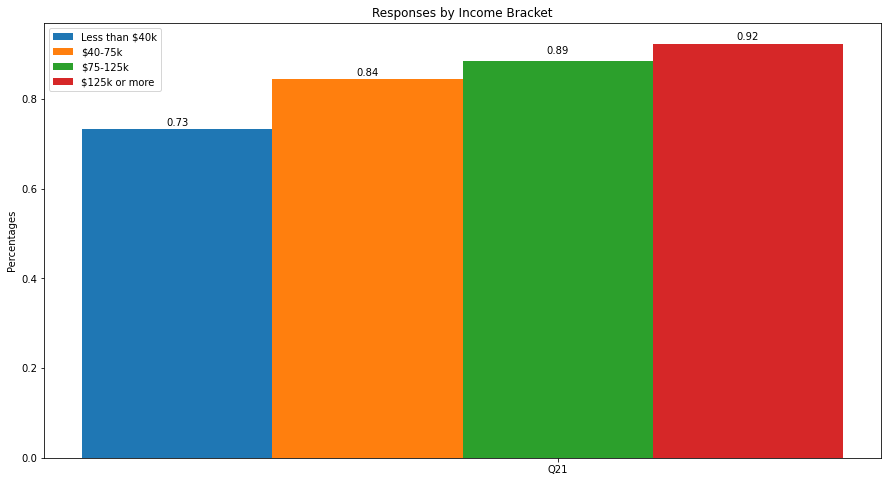

[]


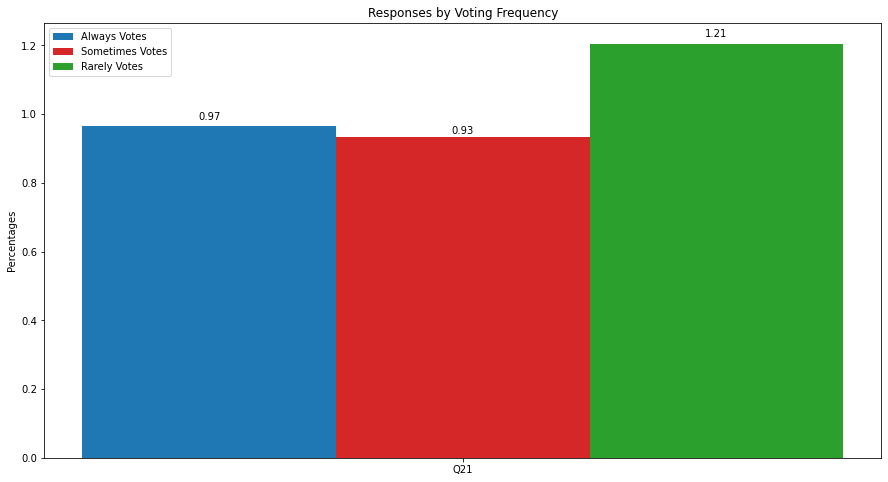

In [24]:
RDI_Analysis('Q21',0,True)
Age_Analysis('Q21',0,True)
Sex_Analysis('Q21',0,True)
Inc_Analysis('Q21',0,True)
Freq_Analysis('Q21',0,True)

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


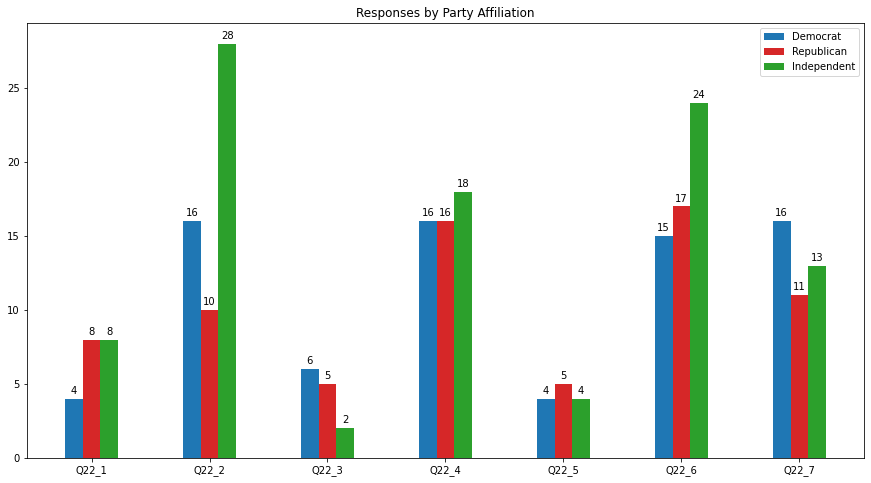

[]


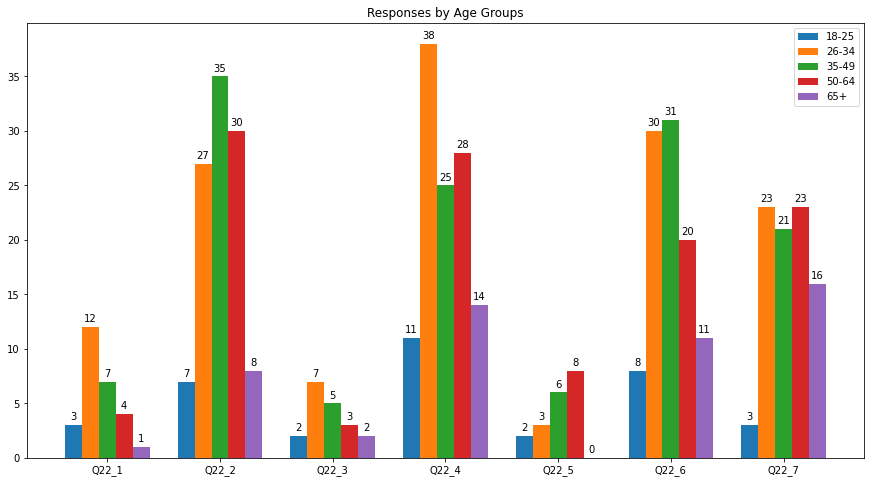

[]


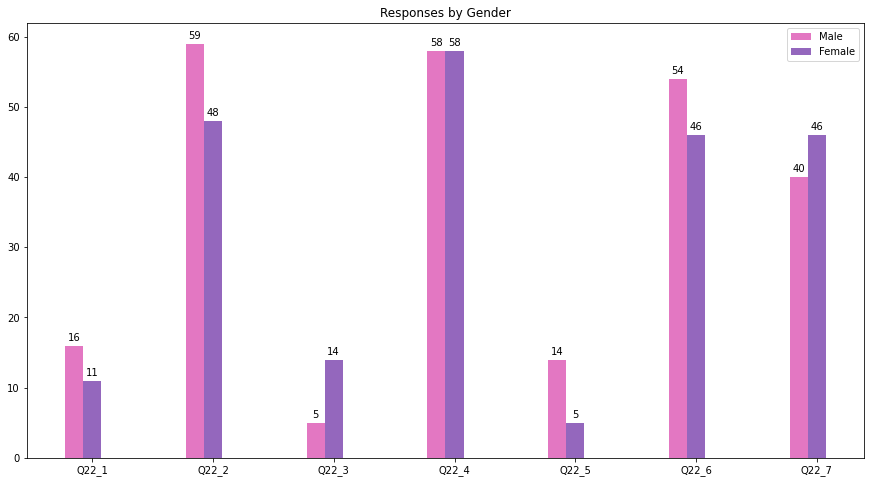

[]


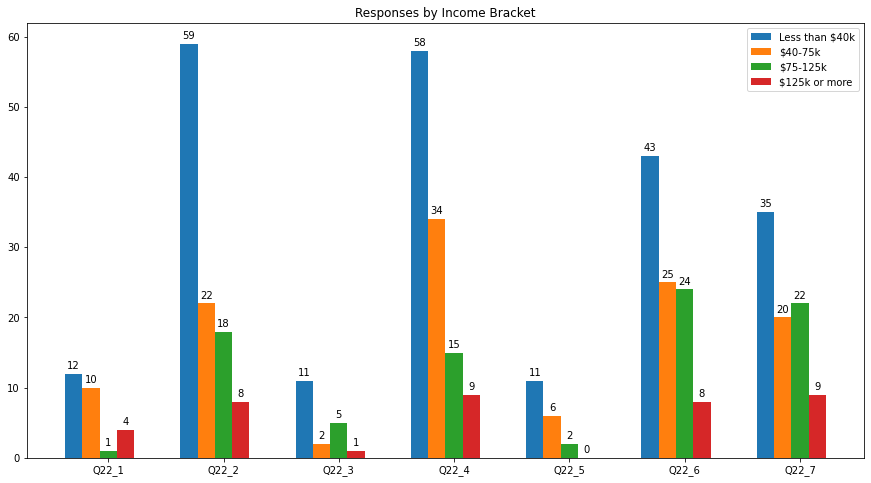

[]


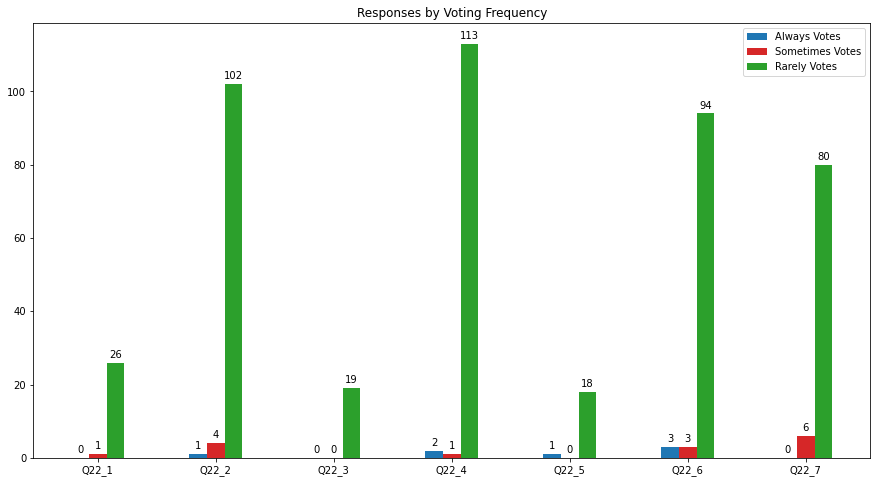

In [25]:
RDI_Analysis('Q22',7,'range')
Age_Analysis('Q22',7,'range')
Sex_Analysis('Q22',7,'range')
Inc_Analysis('Q22',7,'range')
Freq_Analysis('Q22',7,'range')

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


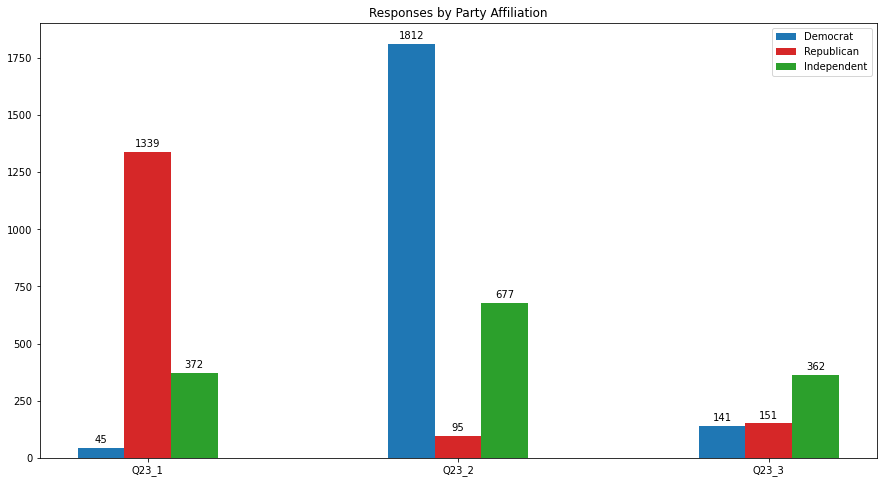

[]


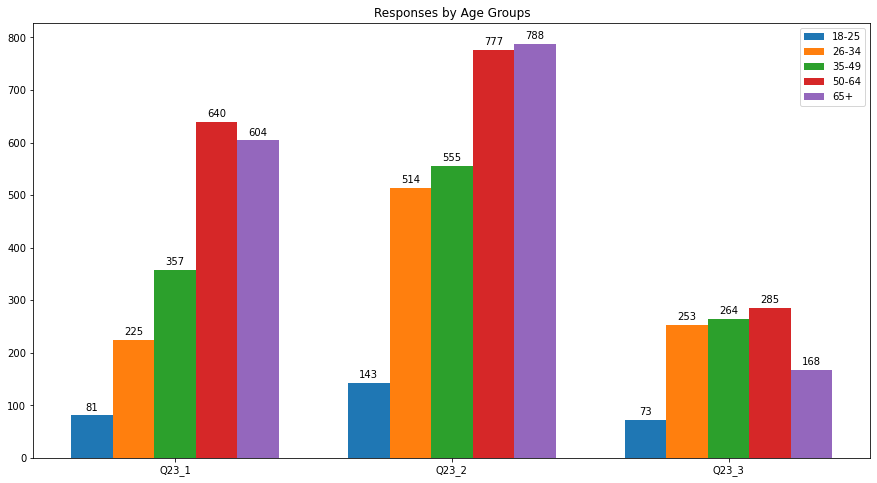

[]


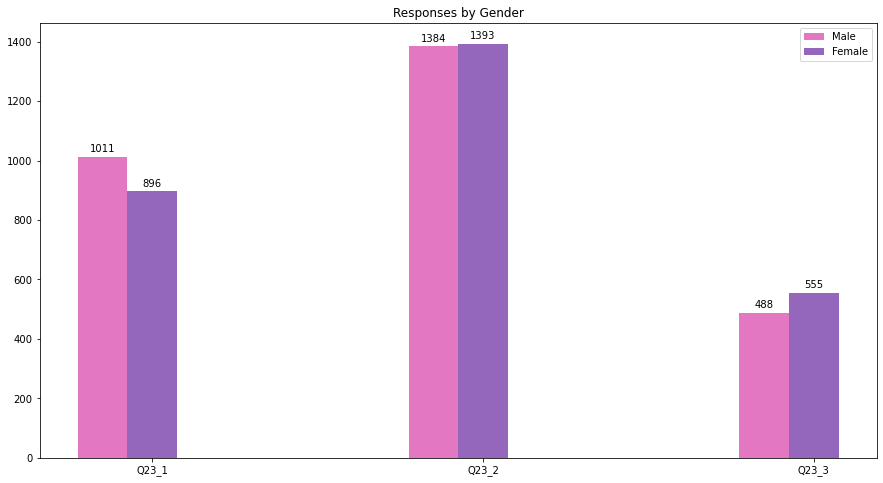

[]


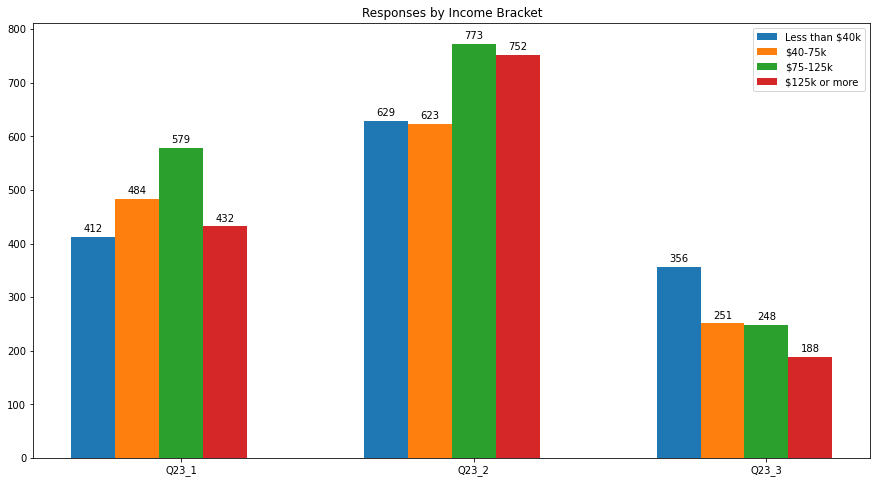

[]


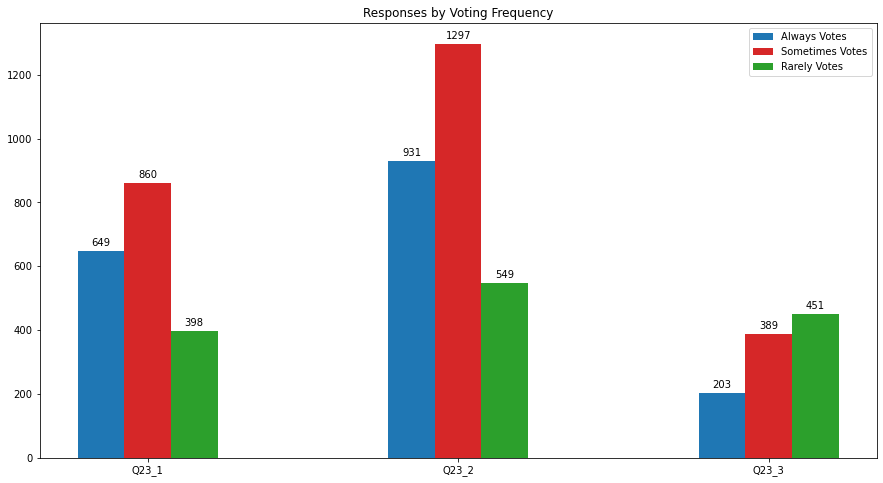

In [26]:
RDI_Analysis('Q23',3,'range')
Age_Analysis('Q23',3,'range')
Sex_Analysis('Q23',3,'range')
Inc_Analysis('Q23',3,'range')
Freq_Analysis('Q23',3,'range')

RDI:
Age:
Sex:
Income:
Voting Frequency:
    #More sometime voters are willing to vote for Biden.

[]


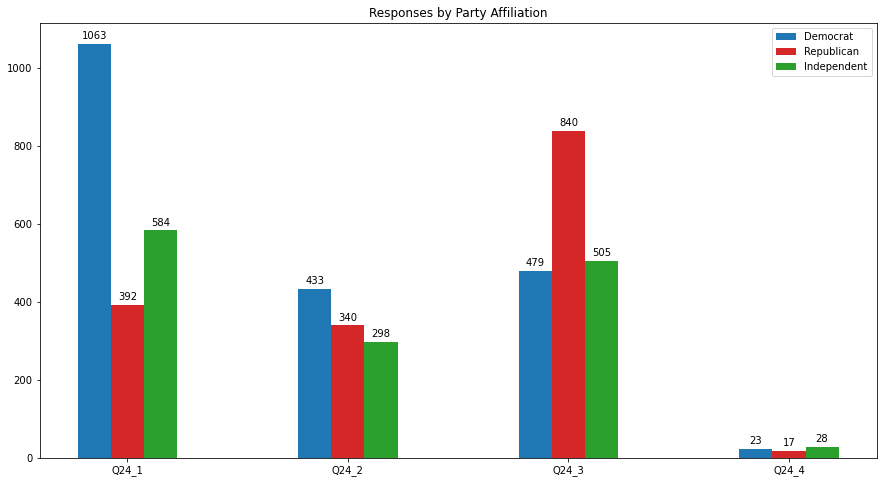

[]


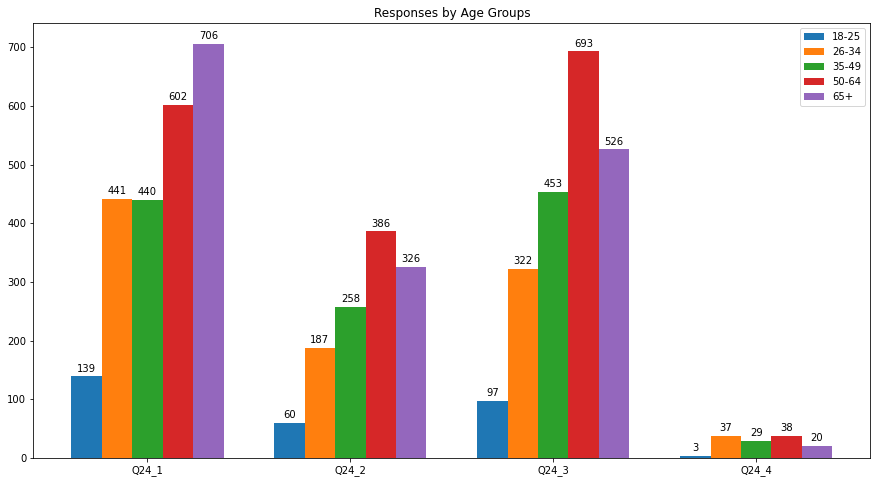

[]


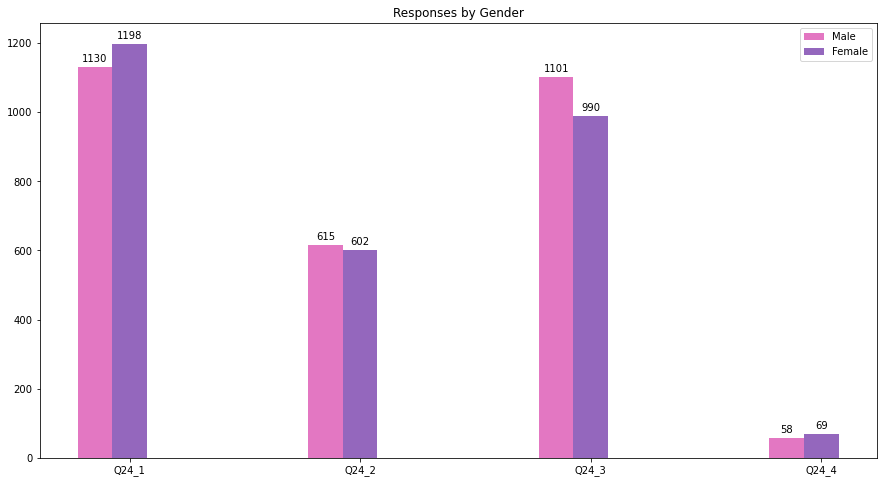

[]


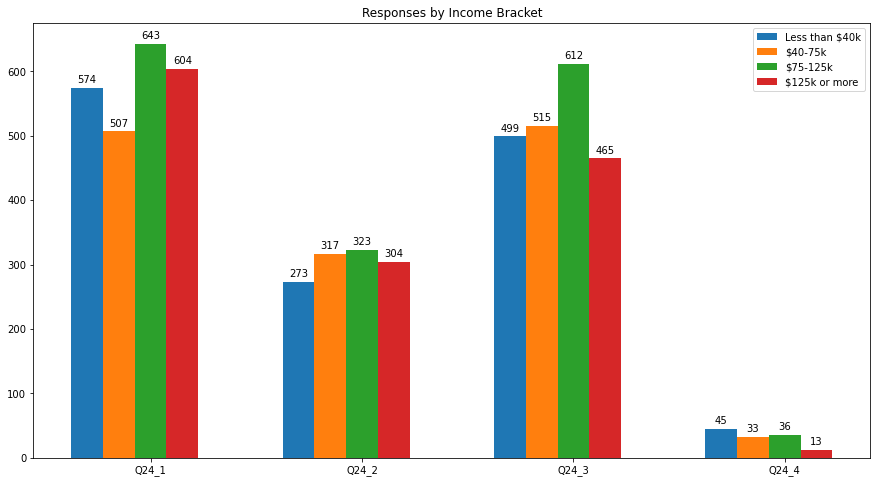

[]


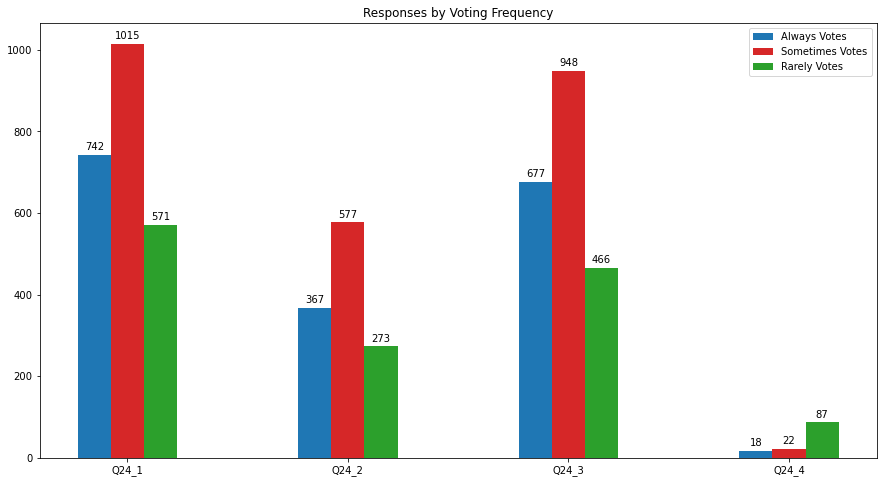

In [27]:
RDI_Analysis('Q24',4,'range')
Age_Analysis('Q24',4,'range')
Sex_Analysis('Q24',4,'range')
Inc_Analysis('Q24',4,'range')
Freq_Analysis('Q24',4,'range')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q25: f-stat = 25.237,  p-value = 0.0']


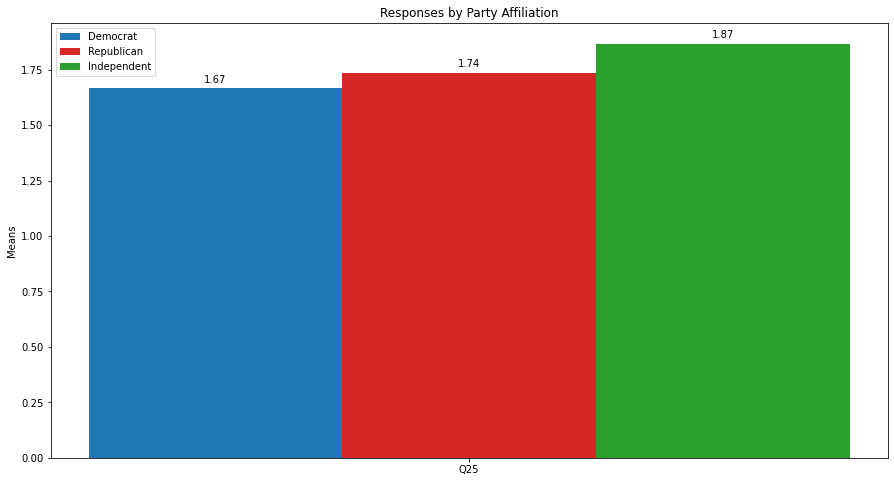

['Q25: f-stat = 129.38,  p-value = 0.0']


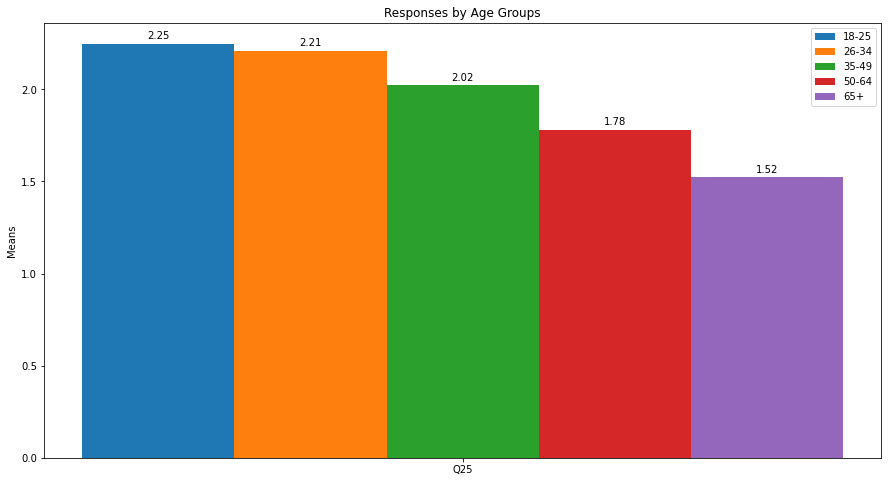

['Q25: t-stat = -6.6504,  p-value = 0.0']


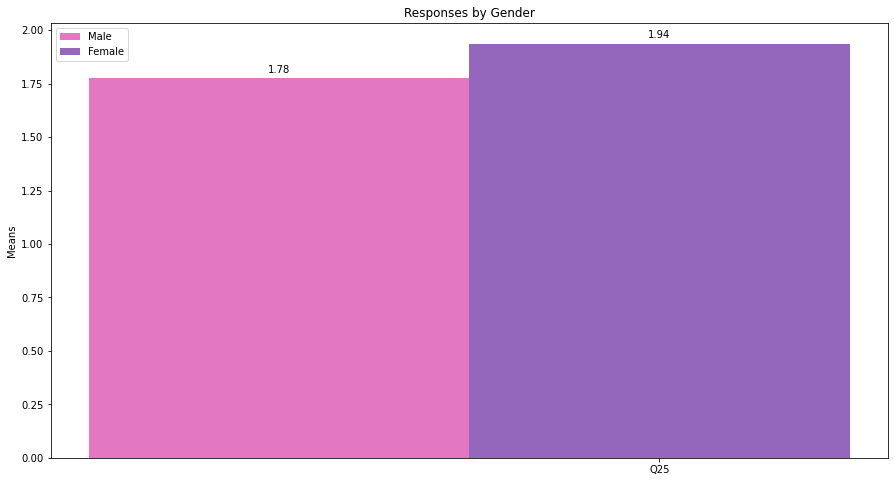

['Q25: f-stat = 50.9965,  p-value = 0.0']


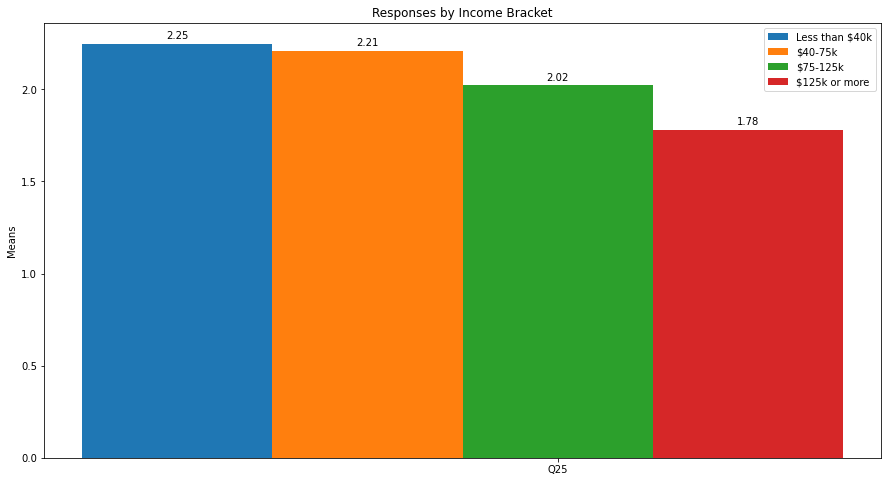

['Q25: f-stat = 361.9023,  p-value = 0.0']


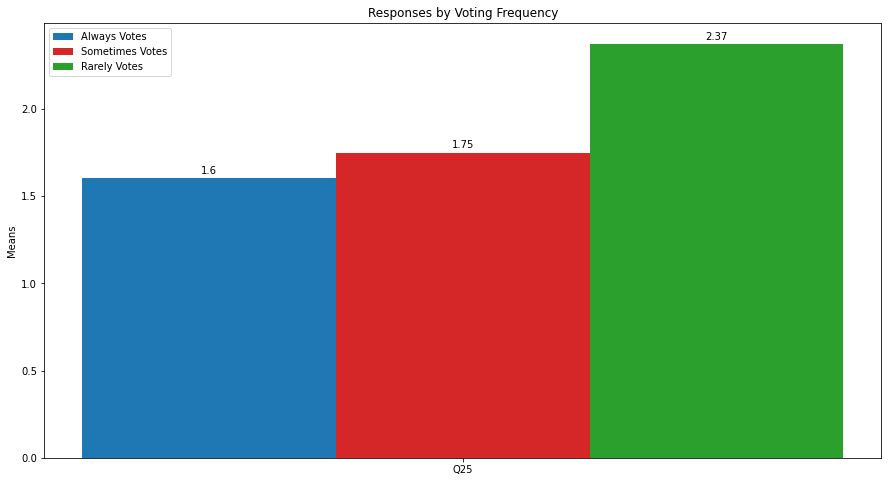

In [28]:
RDI_Analysis('Q25',0,'mean')
Age_Analysis('Q25',0,'mean')
Sex_Analysis('Q25',0,'mean')
Inc_Analysis('Q25',0,'mean')
Freq_Analysis('Q25',0,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

['Q26: f-stat = 20.6787,  p-value = 1.1e-09']


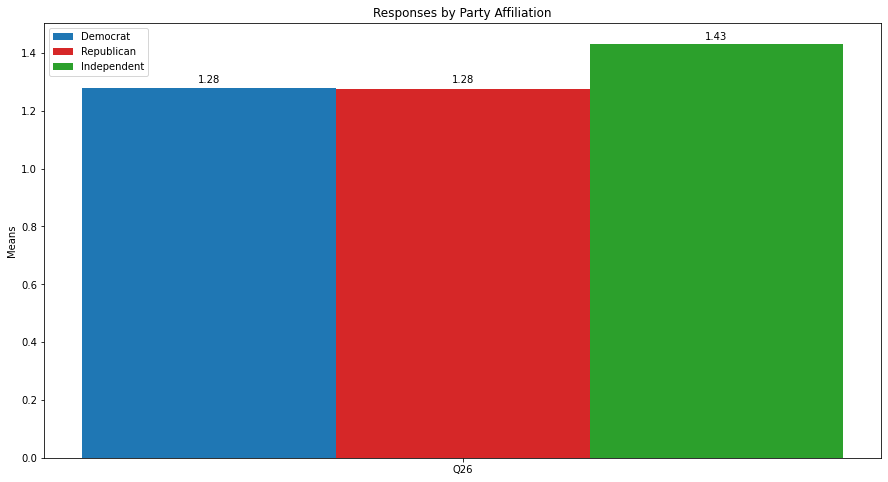

['Q26: f-stat = 99.0717,  p-value = 0.0']


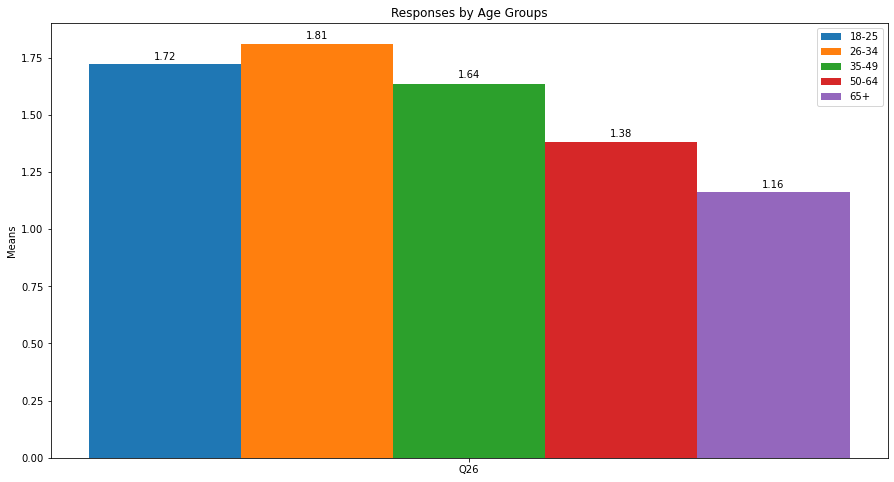

['Q26: t-stat = -0.9401,  p-value = 0.3471905478']


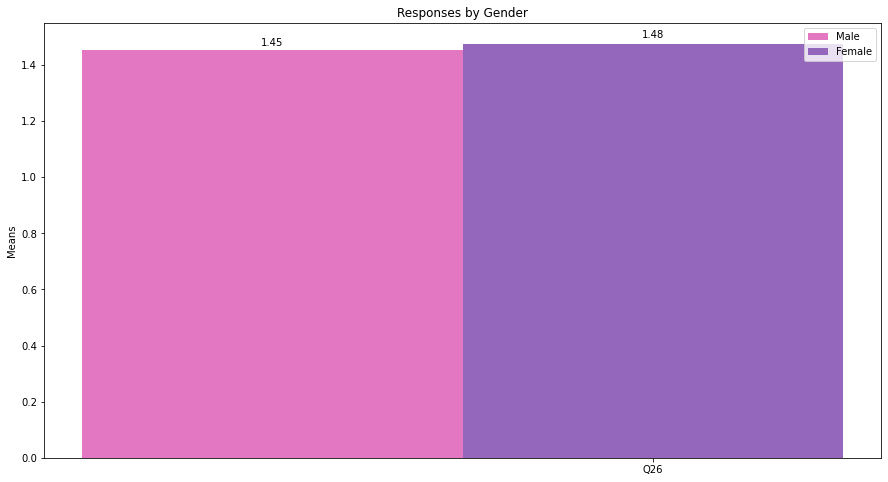

['Q26: f-stat = 120.5007,  p-value = 0.0']


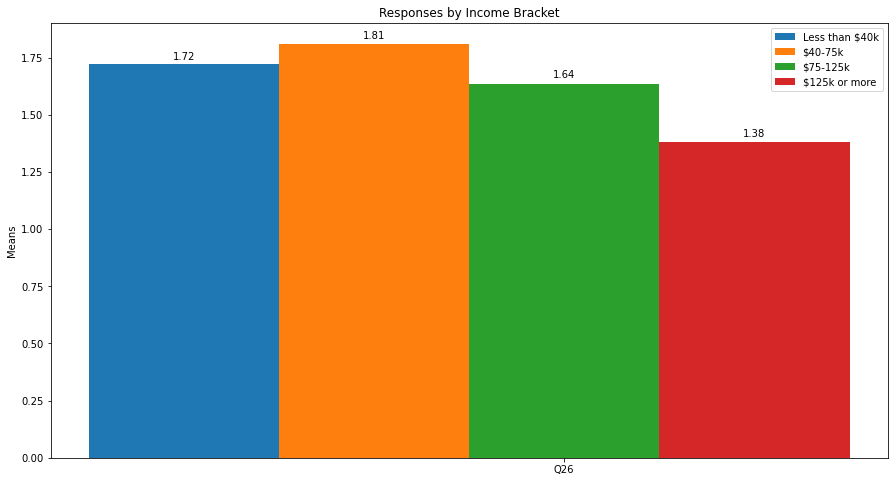

['Q26: f-stat = 2376.9341,  p-value = 0.0']


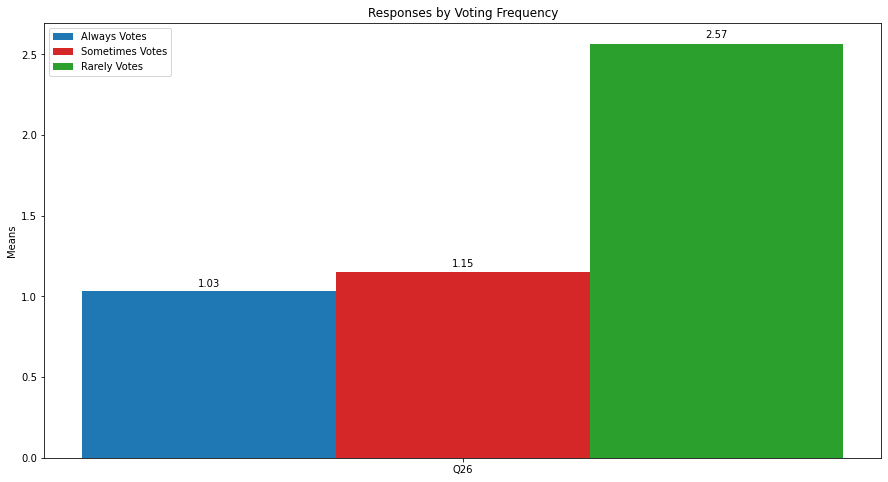

In [29]:
RDI_Analysis('Q26',0,'mean')
Age_Analysis('Q26',0,'mean')
Sex_Analysis('Q26',0,'mean')
Inc_Analysis('Q26',0,'mean')
Freq_Analysis('Q26',0,'mean')

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


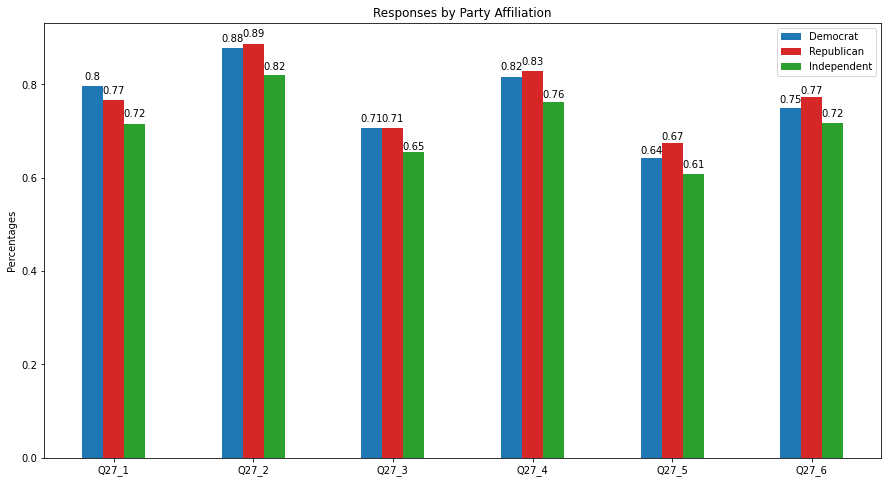

[]


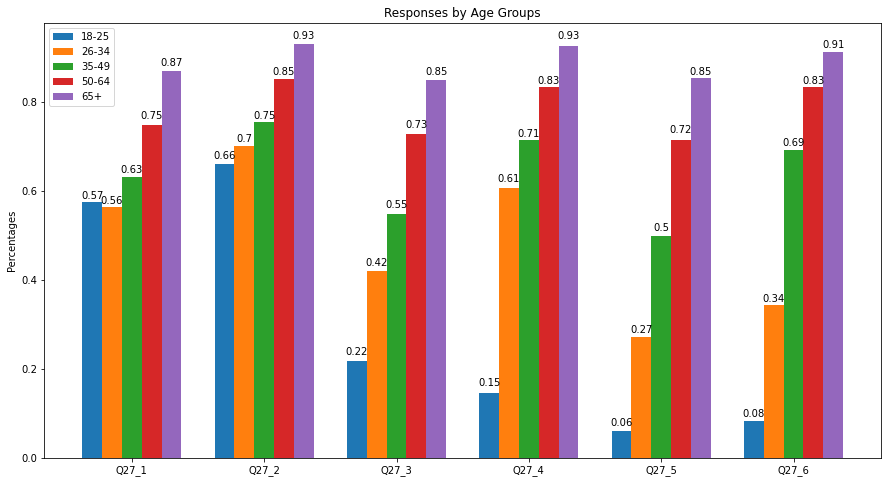

[]


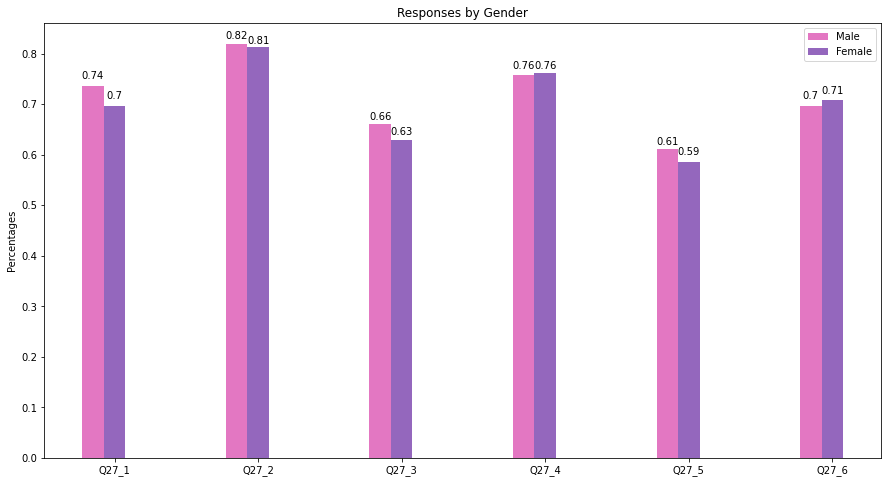

[]


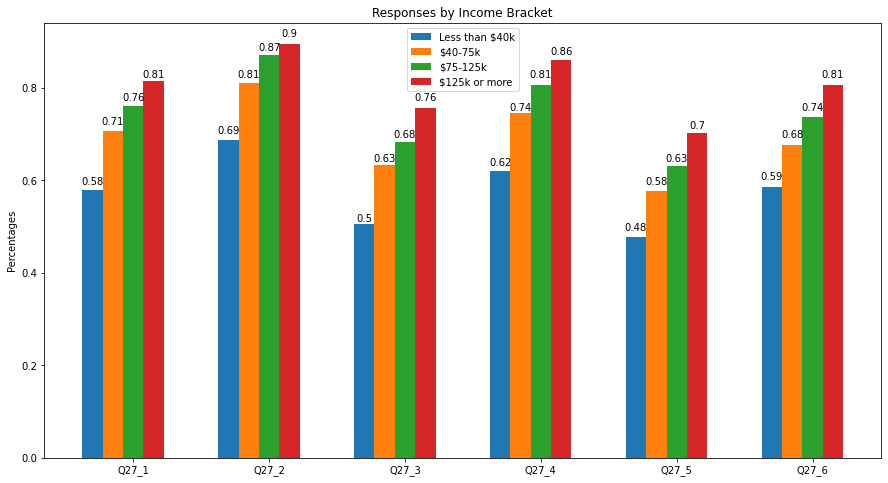

[]


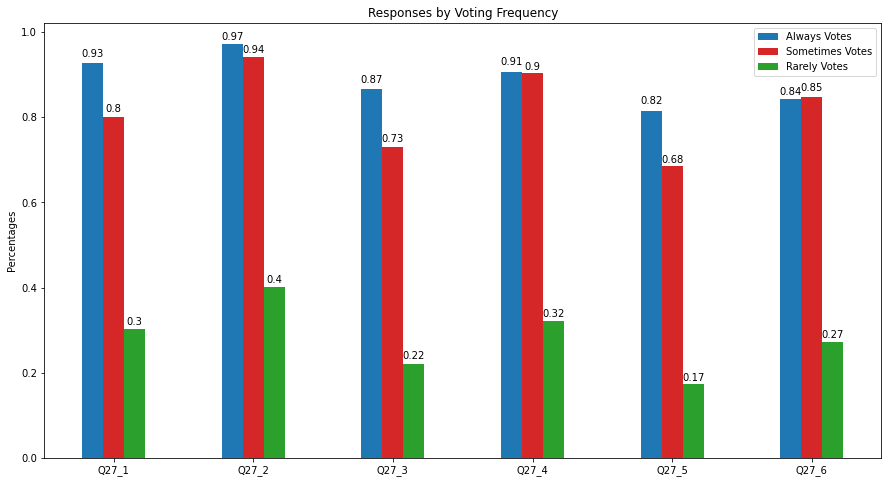

In [39]:
RDI_Analysis('Q27_',6,True)
Age_Analysis('Q27_',6,True)
Sex_Analysis('Q27_',6,True)
Inc_Analysis('Q27_',6,True)
Freq_Analysis('Q27_',6,True)

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


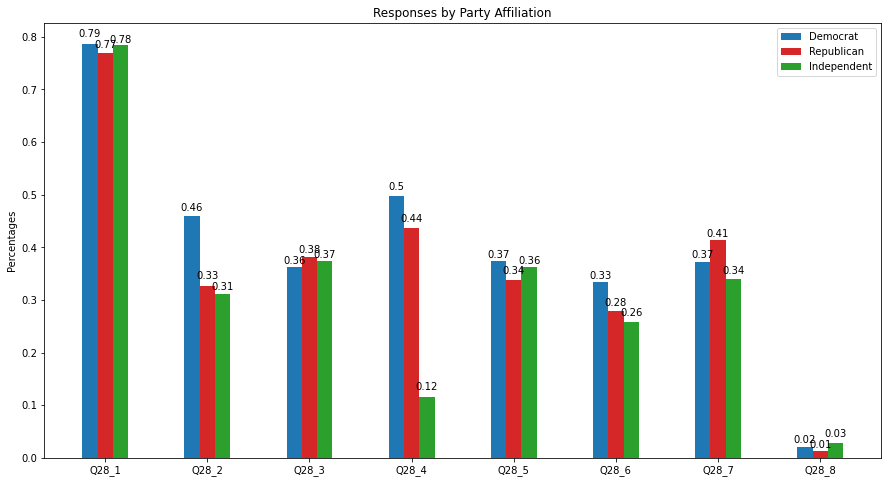

[]


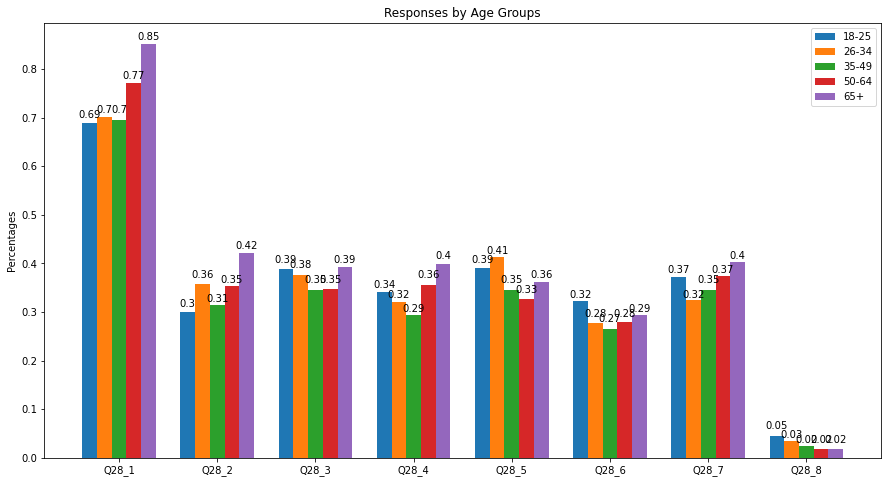

[]


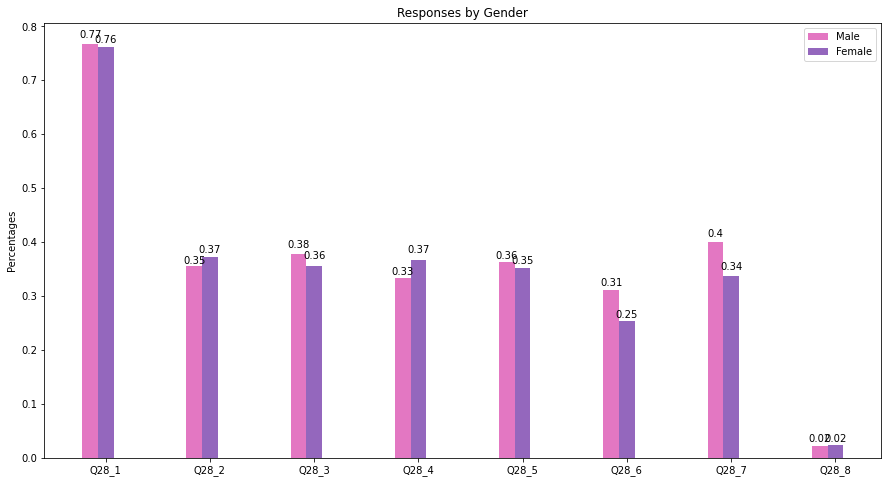

[]


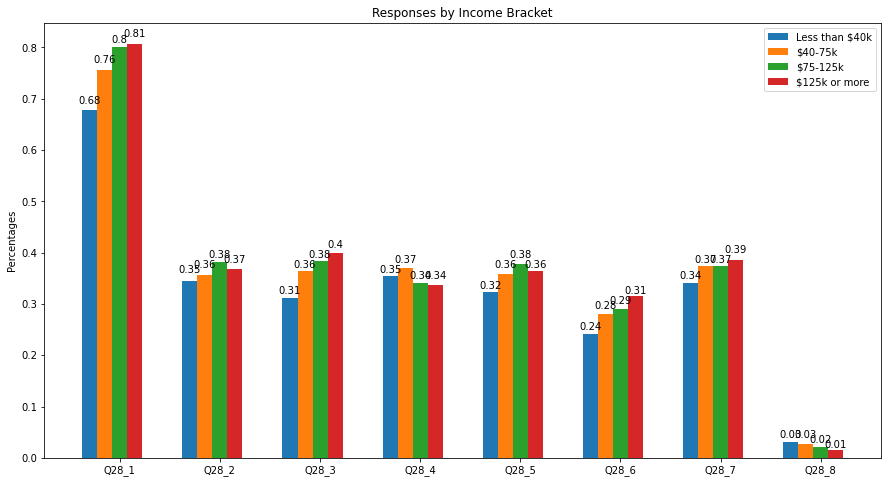

[]


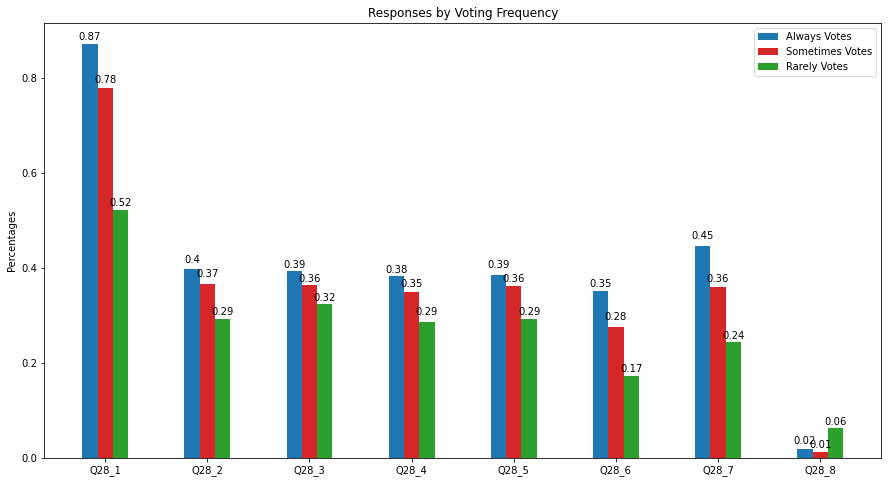

In [31]:
RDI_Analysis('Q28_',8,True)
Age_Analysis('Q28_',8,True)
Sex_Analysis('Q28_',8,True)
Inc_Analysis('Q28_',8,True)
Freq_Analysis('Q28_',8,True)

RDI:
Age:
Sex:
Income:
Voting Frequency:

[]


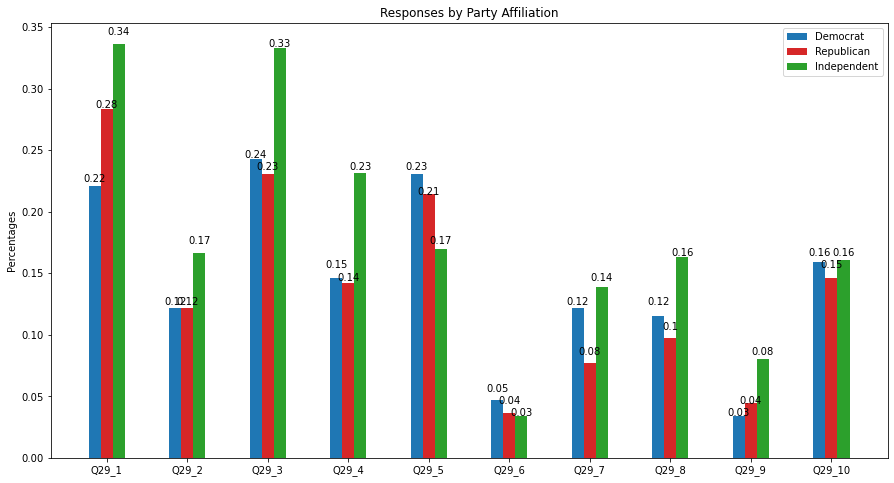

[]


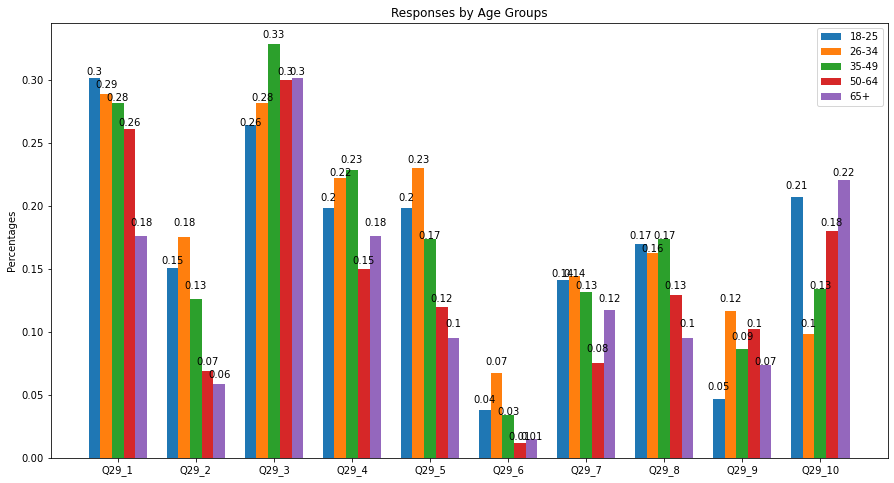

[]


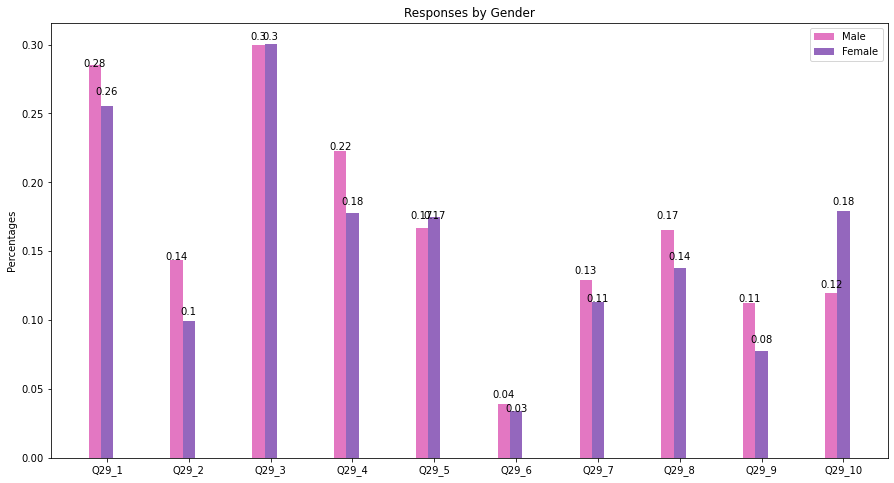

[]


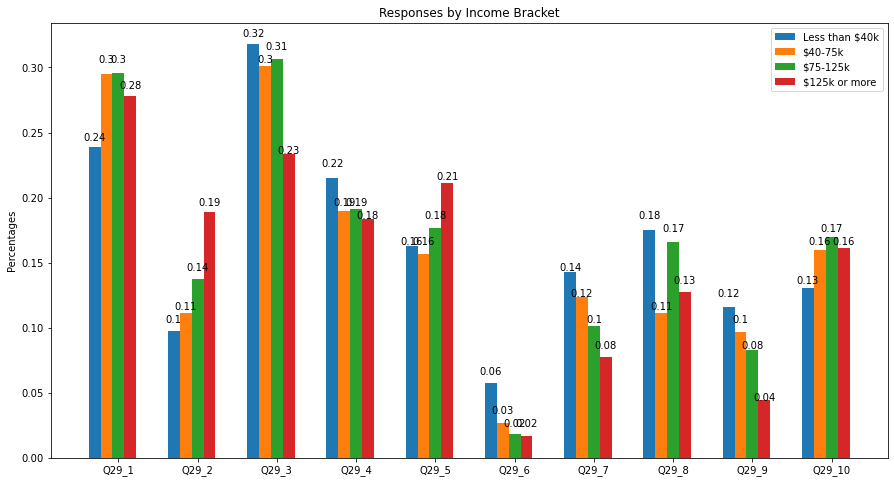

[]


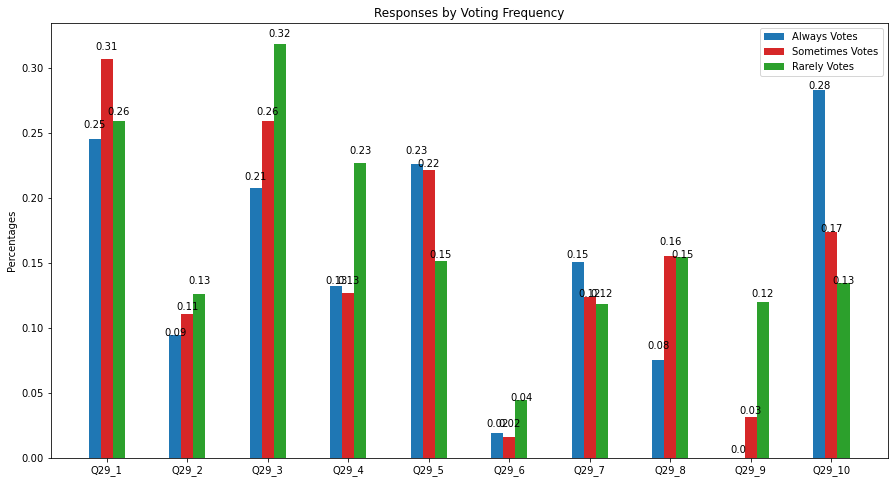

In [32]:
RDI_Analysis('Q29_',10,True)
Age_Analysis('Q29_',10,True)
Sex_Analysis('Q29_',10,True)
Inc_Analysis('Q29_',10,True)
Freq_Analysis('Q29_',10,True)

RDI:
Age:
Sex:
Income:
Voting Frequency: